In [1]:
import awkward as ak
import pathlib
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, MultipleLocator, ScalarFormatter, AutoMinorLocator
from scipy.optimize import curve_fit
from scipy import stats
import random
import atlas_mpl_style as ampl
ampl.use_atlas_style()
plt.style.use('seaborn-v0_8-colorblind')
#from codes.plotting import plot_prettier 
#plot_prettier()

Using paramiko to connect to remote server and secure transfer all files takes 11 mins, with new packet window size takes 11 mins, and with FastSSHClient takes 11 mins. If desperate can mount ssh using sshfs: https://phoenixnap.com/kb/sshfs

In [2]:
# import paramiko
# class FastSSHClient(paramiko.SSHClient):
#     def _transport(self, sock):
#         transport = paramiko.Transport(sock)
#         transport.window_size = 2147483647
#         transport.packetizer.REKEY_BYTES = pow(2, 40)
#         transport.packetizer.REKEY_PACKETS = pow(2, 40)
#         return transport

In [3]:
# # SSH connection details
# ssh_host = 'login.snowmass21.io'
# ssh_port = 22  # Default SSH port
# ssh_username = 'lrozanov'
# ssh_password = 'League_Of_Legends'

# # Directory path on the remote machine
# remote_directory = '/work/lrozanov/mucolstudies/'

# ssh_client = FastSSHClient()
# ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
# ssh_client.connect(hostname = ssh_host, port = ssh_port, username=ssh_username, password=ssh_password)
# sftp = ssh_client.open_sftp()

# # Load each file individually
# bib_0_50 = ak.from_json(sftp.open(remote_directory + 'v0_BIB_0_50.json'))
# bib_50_250 = ak.from_json(sftp.open(remote_directory + 'v0_BIB_50_250.json'))
# bib_250_1000 = ak.from_json(sftp.open(remote_directory + 'v0_BIB_250_1000.json'))
# # pt_0_50 = ak.from_json(sftp.open(remote_directory + 'v0_noBIB_0-50.json'))
# # pt_50_250 = ak.from_json(sftp.open(remote_directory + 'v0_noBIB_50-250.json'))
# # pt_250_1000_dr = ak.from_json(sftp.open(remote_directory + 'v0_noBIB_250-1000_dr_0.1.json'))
# # pt_250_1000 = ak.from_json(sftp.open(remote_directory + 'v0_noBIB_250-1000.json'))
# pt_all = ak.from_json(sftp.open(remote_directory + 'v0_noBIB_all.json'))
# bib_all = ak.from_json(sftp.open(remote_directory + 'v0_BIB_all.json'))
# merged = ak.from_json(sftp.open(remote_directory + 'v0_noBIB_merged.json'))
# # legacy = ak.from_json(sftp.open(remote_directory + 'makeMuonPlots.json'))

# # Close the SFTP session
# sftp.close()

# # Close the SSH connection
# ssh_client.close()


In [4]:
bib_0_50 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_BIB_0_50.json"))
bib_50_250 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_BIB_50_250.json"))
bib_250_1000 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_BIB_250_1000.json"))
pt_0_50 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_0-50.json"))
pt_50_250 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_50-250.json"))
pt_250_1000_dr = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_250-1000_dr_0.1.json"))
pt_250_1000 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_250-1000.json"))
pt_all = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_all.json"))
pt_all_5TeV = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_all_5TeV.json"))
bib_all = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_BIB_all.json"))
bib_all_5TeV = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_BIB_all_5TeV.json"))
bib_5TeV = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_BIB_5TeV.json"))
merged = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\v0_noBIB_merged.json"))
legacy = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\10TeV_data\makeMuonPlots.json"))

In [5]:
mcp_pt = pt_all_5TeV['mcp_pt']
mcp_eta = pt_all_5TeV['mcp_eta']
mcp_phi = pt_all_5TeV['mcp_phi'] 
mcp_mu_pt = pt_all_5TeV['mcp_mu_pt']
mcp_mu_eta = pt_all_5TeV['mcp_mu_eta']
mcp_mu_phi = pt_all_5TeV['mcp_mu_phi']
# pfo_pt = pt_all_5TeV['pfo_pt']
# pfo_eta = pt_all_5TeV['pfo_eta']
# pfo_phi = pt_all_5TeV['pfo_phi']
# pfo_mu_pt = pt_all_5TeV['pfo_mu_pt']
# pfo_mu_eta = pt_all_5TeV['pfo_mu_eta']
# pfo_mu_phi = pt_all_5TeV['pfo_mu_phi']
# mcp_mu_match_pt = pt_all_5TeV['mcp_mu_match_pt']
# mcp_mu_match_eta = pt_all_5TeV['mcp_mu_match_eta']
# mcp_mu_match_phi = pt_all_5TeV['mcp_mu_match_phi']
# d_mu_dpt = pt_all_5TeV['d_mu_dpt']
# d_mu_drelpt = pt_all_5TeV['d_mu_drelpt']
# d_mu_dphi = pt_all_5TeV['d_mu_dphi']
# d_mu_deta = pt_all_5TeV['d_mu_deta']
# pt_res_vs_eta = pt_all_5TeV['pt_res_vs_eta']
# pt_res_vs_pt = pt_all_5TeV['pt_res_vs_pt']
# d0_res_vs_pt = pt_all_5TeV['d0_res_vs_pt']
# d0_res_vs_eta = pt_all_5TeV['d0_res_vs_eta']
# z0_res_vs_pt = pt_all_5TeV['z0_res_vs_pt']
# z0_res_vs_eta = pt_all_5TeV['z0_res_vs_eta']
# h2d_relpt = pt_all_5TeV['h_2d_relpt']
nhits = pt_all_5TeV['nhits']
pixel_nhits = pt_all_5TeV['pixel_nhits']
pt_res_hits = pt_all_5TeV['pt_res_hits']
d0_res = pt_all_5TeV['d0_res']
z0_res = pt_all_5TeV['z0_res']
track_pt = pt_all_5TeV['track_pt']
pt_res = pt_all_5TeV['pt_res'] 
pt_match = pt_all_5TeV['pt_match'] #THIS IS TRUTH PT
eta_match = pt_all_5TeV['eta_match'] #Truth eta
track_eta = pt_all_5TeV['track_eta'] #Track eta
theta_match = pt_all_5TeV['theta_match']
phi_match = pt_all_5TeV['phi_match'] #Track phi
d0_res_match = pt_all_5TeV['d0_res_match']
z0_res_match = pt_all_5TeV['z0_res_match']
ndf = pt_all_5TeV['ndf']
chi2 = pt_all_5TeV['chi2']

LC_nhits = pt_all_5TeV['LC_nhits']
LC_pixel_nhits = pt_all_5TeV['LC_pixel_nhits']
LC_d0 = pt_all_5TeV['LC_d0']
LC_z0 = pt_all_5TeV['LC_z0']
LC_track_pt = pt_all_5TeV['LC_track_pt']
LC_track_theta = np.degrees(pt_all_5TeV['LC_track_theta'])
LC_track_eta = pt_all_5TeV['LC_track_eta']
LC_pt_res = pt_all_5TeV['LC_pt_res']
LC_pt_match = pt_all_5TeV['LC_pt_match']
LC_eta_match = pt_all_5TeV['LC_eta_match']
LC_phi_match = pt_all_5TeV['LC_phi_match']
LC_ndf = pt_all_5TeV['LC_ndf']
LC_chi2 = pt_all_5TeV['LC_chi2']
LC_dr = pt_all_5TeV['LC_dr']

fake_pt = pt_all_5TeV['fake_pt']
fake_theta = pt_all_5TeV['fake_theta']
fake_eta = pt_all_5TeV['fake_eta']
fake_phi = pt_all_5TeV['fake_phi']
fake_d0 = pt_all_5TeV ['fake_d0']
fake_z0 = pt_all_5TeV['fake_z0']
fake_ndf = pt_all_5TeV['fake_ndf']
fake_chi2 = pt_all_5TeV['fake_chi2']
fake_nhits = pt_all_5TeV['fake_nhits']
fake_pixel_nhits = pt_all_5TeV ['fake_pixel_nhits']


BIB Hits per event

In [6]:
print(len(bib_0_50['fake_pt'][0])) # num tracks for 1 event
print(np.mean(bib_0_50['fake_nhits'])) # avg number of hits
print(1356*(3.6019933705240263)) # 1 event number of hits

1356
3.6019933705240263
4884.30301043058


In [7]:
# pt_res = ak.concatenate([pt_250_1000['pt_res'],pt_50_250['pt_res'],pt_0_50['pt_res']],axis=0) 
# pt_match = ak.concatenate([pt_250_1000['pt_match'],pt_50_250['pt_match'],pt_0_50['pt_match']],axis=0)
# eta_match = ak.concatenate([pt_250_1000['eta_match'],pt_50_250['eta_match'],pt_0_50['eta_match']],axis=0)
# ndf = ak.concatenate([pt_250_1000['ndf'],pt_50_250['ndf'],pt_0_50['ndf']],axis=0)
# chi2 = ak.concatenate([pt_250_1000['chi2'],pt_50_250['chi2'],pt_0_50['chi2']],axis=0)
# d0_res_match = ak.concatenate([pt_250_1000['d0_res_match'],pt_50_250['d0_res_match'],pt_0_50['d0_res_match']],axis=0)
# z0_res_match = ak.concatenate([pt_250_1000['z0_res_match'],pt_50_250['z0_res_match'],pt_0_50['z0_res_match']],axis=0)
print((len(pt_250_1000['pt_res'][(np.abs(np.ravel(pt_250_1000['pt_res']))<1)])/len((pt_250_1000['pt_res']))))
print(len(merged['LC_pt_match'])/len(merged['mcp_mu_pt']))
print(pt_0_50.fields)
print(bib_all.fields)
print(len(pt_all['fake_ndf']))
print(len(merged['LC_d0']), len(merged['LC_track_pt']))
print(len((LC_d0)))
#print(len(bib_track_pt)/len(bib_truth_pt))
print(ak.flatten(bib_all_5TeV['LC_track_pt'][bib_all_5TeV['LC_track_pt']>1000]))

0.9575952764358562
0.8979171670727104
['mcp_pt', 'mcp_eta', 'mcp_phi', 'pfo_pt', 'pfo_eta', 'pfo_phi', 'pfo_mu_pt', 'pfo_mu_eta', 'pfo_mu_phi', 'mcp_mu_pt', 'mcp_mu_eta', 'mcp_mu_phi', 'mcp_mu_match_pt', 'mcp_mu_match_eta', 'mcp_mu_match_phi', 'd_mu_dpt', 'd_mu_drelpt', 'd_mu_dphi', 'd_mu_deta', 'd0_res', 'z0_res', 'nhits', 'pixel_nhits', 'pt_res_hits', 'd0_res_vs_pt', 'd0_res_vs_eta', 'z0_res_vs_pt', 'z0_res_vs_eta', 'pt_res_vs_eta', 'pt_res_vs_pt', 'pt_res', 'pt_match', 'track_pt', 'track_eta', 'eta_match', 'theta_match', 'phi_match', 'ndf', 'chi2', 'd0_res_match', 'z0_res_match', 'h_2d_relpt']
['mcp_pt', 'mcp_eta', 'mcp_phi', 'mcp_mu_pt', 'mcp_mu_eta', 'mcp_mu_phi', 'd0_res', 'z0_res', 'nhits', 'pixel_nhits', 'inner_nhits', 'outer_nhits', 'pt_res_hits', 'd0_res_vs_pt', 'd0_res_vs_eta', 'z0_res_vs_pt', 'z0_res_vs_eta', 'pt_res_vs_eta', 'pt_res_vs_pt', 'pt_res', 'pt_match', 'track_pt', 'track_eta', 'eta_match', 'theta_match', 'phi_match', 'ndf', 'chi2', 'd0_res_match', 'z0_res_match',

In [8]:
theta_match = 2 * np.arctan(np.exp(-eta_match))
print(eta_match)
print(theta_match)
theta_match = np.degrees(theta_match)
print(theta_match)

LC_theta_match = np.degrees(2 * np.arctan(np.exp(-LC_eta_match)))
mcp_mu_theta = np.degrees(2 * np.arctan(np.exp(-mcp_mu_eta)))

theta_0_50 = np.degrees(2*np.arctan(np.exp(-pt_0_50['eta_match'])))
print(theta_0_50)
theta_50_250 = np.degrees(2*np.arctan(np.exp(-pt_50_250['eta_match'])))
print(theta_50_250)
theta_250_1000 = np.degrees(2*np.arctan(np.exp(-pt_250_1000['eta_match'])))
print(theta_250_1000)

bib_0_50_theta = np.degrees(2*np.arctan(np.exp(-bib_0_50['LC_eta_match'])))
bib_50_250_theta = np.degrees(2*np.arctan(np.exp(-bib_50_250['LC_eta_match'])))
bib_250_1000_theta = np.degrees(2*np.arctan(np.exp(-bib_250_1000['LC_eta_match'])))

bib_0_50_truth_theta = np.degrees(2*np.arctan(np.exp(-bib_0_50['mcp_mu_eta'])))
bib_50_250_truth_theta = np.degrees(2*np.arctan(np.exp(-bib_50_250['mcp_mu_eta'])))
bib_250_1000_truth_theta = np.degrees(2*np.arctan(np.exp(-bib_250_1000['mcp_mu_eta'])))

bib_track_theta = np.degrees(2*np.arctan(np.exp(-bib_all['LC_eta_match'])))
bib_truth_theta = np.degrees(2*np.arctan(np.exp(-bib_all['mcp_mu_eta'])))



[[1.84], [-0.507], [-1.27], [0.483], ..., [-0.00794], [1.57], [-0.229], [1]]
[[0.316], [2.06], [2.59], [1.11], [1.56], ..., [1.58], [0.409], [1.8], [0.703]]
[[18.1], [118], [149], [63.4], [89.6], ..., [18], [90.5], [23.4], [103], [40.3]]
[[148], [131], [93.1], [82.4], [89.3], ..., [150], [134], [129], [27.3], [100]]
[[70.7], [110], [54.4], [164], [86.8], ..., [91.2], [46], [159], [57.3], [151]]
[[63.3], [86.7], [92.1], [94.2], [146], ..., [113], [99.1], [127], [79.9]]


### Binning impact parameters by $p_T$ (NB: this code is for legacy data)

In [9]:
pT_ranges = [0,50, 250, 1000]  # The last value should be np.inf to cover 200+ GeV

# Define relaxed cutoffs for lower pT ranges
pT_d0_cutoffs = [0.8, 0.7, 0.6, 0.5]  
pT_z0_cutoffs = [1.8, 1.7, 1.6, 1.5]  

# Initialize the target arrays with NaN values to preserve the dtype
d0_masked = []
z0_masked = []
LC_pt_res_masked = []
pt_masked_d0 = []
pt_masked_z0 = []
theta_masked_d0 = []
theta_masked_z0 = []

# Create subsets of legacy for different pT ranges and apply resolution cutoffs
for i in range(len(pT_ranges) - 1):
    pT_min = pT_ranges[i]
    pT_max = pT_ranges[i + 1]

    # Create a mask for the current pT range
    mask = np.array([pT_min <= x[0] < pT_max for x in LC_pt_match])  

    # Apply resolution cutoffs for d0 and z0
    d0_cutoff = np.array([x[0] < pT_d0_cutoffs[i] for x in LC_d0])
    z0_cutoff = np.array([x[0] < pT_z0_cutoffs[i] for x in LC_z0])
    theta_cutoff = np.array([70 <= x[0] < 110 for x in LC_theta_match])
    d0_mask = mask & theta_cutoff
    z0_mask = mask & theta_cutoff
    # Create subsets of legacy for the current pT range and apply the resolution cutoffs
    #pT_subset = LC_pt_match[mask]
    d0_masked.append(LC_d0[d0_mask])
    z0_masked.append(LC_z0[z0_mask])
    dpT_pt = []
    for x, y in zip(LC_pt_res[d0_mask], LC_pt_match[d0_mask]):
        dpT_pt.append([x[0] / y[0]])
    LC_pt_res_masked.append(dpT_pt)  
    pt_masked_d0.append(LC_pt_match[d0_mask])
    pt_masked_z0.append(LC_pt_match[z0_mask])
    theta_masked_d0.append(LC_theta_match[d0_mask])
    theta_masked_z0.append(LC_theta_match[z0_mask])
    print('# of points in pT range', pT_min, '-', pT_max, '=', len(LC_theta_match[d0_mask]))
print(LC_pt_res_masked)
print(theta_masked_d0)
# print(len(d0_masked))
# print(len(theta_masked_d0))
# for i in range(len(d0_masked)):
#     print(len(d0_masked[i]))
#     print(len(theta_masked_d0[i]))

# of points in pT range 0 - 50 = 2419
# of points in pT range 50 - 250 = 2447
# of points in pT range 250 - 1000 = 2311
[[[-1.9909550283930238e-05], [-6.637756370696757e-05], [-0.00010986493015985827], [-0.0001554763550981318], [-0.000150112905415715], [-3.415023736208049e-05], [2.428661346969194e-05], [-5.785015434145308e-05], [-2.115775091786377e-05], [-3.67345478659761e-05], [0.0002917288354724874], [-0.00011016734521702527], [-0.0001337425974833701], [-6.540123646349415e-05], [-3.7132003232106667e-06], [0.00038185155354966926], [-1.9173402739968495e-05], [7.346308068427446e-05], [1.7846021272766234e-05], [2.6778969780653985e-05], [2.4616803168363668e-05], [-3.3392755993436195e-05], [-6.520022800946993e-05], [1.2656447987270493e-05], [-1.604651396702192e-05], [-4.872586371216268e-05], [2.0975545036709526e-05], [-1.2112926630689643e-06], [-5.1432504489434926e-05], [-0.00012638073583058352], [-1.0422299752338912e-05], [-0.00019271001796716426], [-4.1434732161085235e-05], [4.9540588663

### Plotting Functions

In [10]:
# Function for creating a Gaussian fit
def gaussian(x, a, mu, sigma):
    return a * np.exp(-0.5 * ((x - mu) / sigma)**2)

def double_gaussian(x, a1, mu1, rms1, a2, mu2, rms2):
    gauss1 = a1 * np.exp(-((x - mu1) ** 2) / (2 * rms1 ** 2))
    gauss2 = a2 * np.exp(-((x - mu2) ** 2) / (2 * rms2 ** 2))
    return gauss1 + gauss2

def fit_gaussian(slice_data, bins, mean = 0, rms = 0.01):
    """
    Fit a Gaussian to the input data slice.

    Parameters:
        slice_data (numpy.ndarray): Input data slice.
        bins (numpy.ndarray, optional): Binning for histogram. Default is np.linspace(-1, 1, 300).
        mean (float, optional): Mean value for the Gaussian fit. Default is 0.
        rms (float, optional): RMS value for the Gaussian fit. Default is 0.01.

    Returns:
        tuple: Tuple containing fit parameters (popt), covariance matrix (pcov), and bin centers.
    """
    if mean is None:
        mean = np.mean(slice_data)
    if rms is None:
        rms = np.sqrt(np.mean(np.square(slice_data - mean)))
    if bins is None:
        bins = np.linspace(np.min(slice_data), np.max(slice_data), int(np.sqrt(len(slice_data))))
    counts, bin_edges = np.histogram(slice_data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[max(counts), mean, rms])
    return popt, pcov, bin_centers

def fit_double_gaussian(slice_data, bins=np.linspace(-0.001, 0.001, 300), mean1=0, rms1=0.0001, mean2=0, rms2=0.0005):
    """
    Fit a double Gaussian to the input data slice.
    
    Parameters:
        slice_data (numpy.ndarray): Input data slice.
        bins (numpy.ndarray, optional): Binning for histogram. Default is np.linspace(-1, 1, 300).
        mean1 (float, optional): Mean value for the first Gaussian. Default is 0.
        rms1 (float, optional): RMS value for the first Gaussian. 
        mean2 (float, optional): Mean value for the second Gaussian. Default is 0.
        rms2 (float, optional): RMS value for the second Gaussian. 
        
    Returns:
        tuple: Tuple containing fit parameters (popt), covariance matrix (pcov), and bin centers.
    """
    if bins is None:
        bins = np.linspace(-2.5*np.sqrt(np.mean(np.square(slice_data))), -2.5*np.sqrt(np.mean(np.square(slice_data))), int(np.sqrt(len(slice_data))))
    counts, bin_edges = np.histogram(slice_data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    p0 = [max(counts), mean1, rms1, max(counts) / 2, mean2, rms2]
    popt, pcov = curve_fit(double_gaussian, bin_centers, counts, p0=p0)
    return popt, pcov, bin_centers

def calculate_mean_and_rms(popt, pcov):
    """
    Calculate a representative mean and RMS for a double Gaussian distribution.
    
    Parameters:
        popt (list or numpy.ndarray): Optimal parameters from the double Gaussian fit.
        Expected order: amp1, mean1, rms1, amp2, mean2, rms2. 
    Returns:
        tuple: A tuple containing the representative mean and RMS.
    """
    amp1, mean1, rms1, amp2, mean2, rms2 = popt
    total_amp = amp1 + amp2
    
    # Calculate weighted mean
    mean = (amp1 * mean1 + amp2 * mean2) / total_amp
    
    # Calculate weighted variance
    variance1 = rms1 ** 2
    variance2 = rms2 ** 2
    mean_variance = ((amp1 * (mean1 - mean) ** 2 + amp2 * (mean2 - mean) ** 2) / total_amp)
    weighted_variance = (amp1 * variance1 + amp2 * variance2) / total_amp + mean_variance
    rms1_uncertainty = np.sqrt(pcov[2, 2])  # Uncertainty of rms1
    rms2_uncertainty = np.sqrt(pcov[5, 5])  # Uncertainty of rms2

    # And assuming w1 and w2 are your weights for rms1 and rms2:
    # For example, let's use the amplitudes as weights
    w1 = amp1 / (amp1 + amp2)
    w2 = amp2 / (amp1 + amp2)

    # Then, a simplified weighted uncertainty for the RMS might be calculated as:
    weighted_rms_uncertainty = np.sqrt((w1**2 * rms1_uncertainty**2) + (w2**2 * rms2_uncertainty**2))    
    # Calculate representative RMS
    rms = np.sqrt(weighted_variance)
    sem = np.sqrt(weighted_rms_uncertainty)
    
    return mean, rms, sem

##############################################################################################################################################################################################################################
# Function for plotting RMS vs. eta/theta/pT for multiple pT bins

def plotrms_multi(datax, datay, numbins, bins = np.linspace(-0.5,0.5,300), log = False, ylim = None, xlim = None, labels=['','',''], xlabel = '', ylabel='', title='', fontsize = 25, savepdf = False, savename = ''):
    """
    Plot RMS values against eta/theta/pT for multiple pT bins.

    Parameters:
        datax (list of numpy.ndarray): List of x-data arrays.
        datay (list of numpy.ndarray): List of y-data arrays.
        numbins (int): Number of bins for the x-data histogram.
        bins (numpy.ndarray, optional): Binning for histogram. Default is np.linspace(-0.5, 0.5, 300)
        log (bool, optional): Use a logarithmic y-axis scale. Default is False.
        xlim (tuple, optional): X-axis limits. Default is None.
        ylim (tuple, optional): Y-axis limits. Default is None.
        labels (list of str, optional): Labels for the data series. Default is None.
        xlabel (str, optional): X-axis label. Default is an empty string.
        ylabel (str, optional): Y-axis label. Default is an empty string.
        title (str, optional): Plot title. Default is an empty string.
        fontsize (int, optional): Font size for the plot labels. Default is 25.
        savepdf (bool, optional): Save the plot as a PDF file. Default is False.
        savename (str, optional): Name of the saved PDF file. Default is an empty string.
    """
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    if isinstance(bins, np.ndarray):
        bins = [bins] * len(datay)  # Replicate the array for each dataset

    for j in range(len(datay)):
        data_flatx = np.array(np.ravel(datax[j])).T
        data_flaty = np.array(np.ravel(datay[j])).T
        x_bins = np.linspace(data_flatx.min(), data_flatx.max(), numbins + 1)
        rms_values = []
        sem_values = []
        for i in range(numbins):
            slice_data = data_flaty[(data_flatx >= x_bins[i]) & (data_flatx < x_bins[i + 1])]
            try:
                # Fit a Gaussian to the slice data using the fit_gaussian function
                popt, pcov, bin_centers = fit_gaussian(slice_data, bins=bins[j]) #, mean = None, rms = None
                fitted_mean = popt[1]
                fitted_rms = popt[2]
                sem = (np.sqrt(np.diag(pcov)))[2]
                # print("Single Gauss rms error", sem)
            except:
                try:
                    popt, pcov, bin_centers = fit_double_gaussian(slice_data, bins=bins[j])
                    fitted_mean, fitted_rms, sem = calculate_mean_and_rms(popt, pcov)
                    if sem == np.inf:
                        sem = np.std(slice_data, ddof=1) / np.sqrt(2*(len(slice_data)-1))
                    print(f"Single Gaussian fit failed for Slice {i} for pt {j}. Fitting double Gaussian instead.")
                    # print("Double Gauss rms error", sem)
                except:
                    print(f"Could not fit Gaussian for Slice {i} for pt {j}.")
                    fitted_rms = np.sqrt(np.mean(np.square(slice_data - np.mean(slice_data))))
                    sem = np.std(slice_data, ddof=1) / np.sqrt(2*(len(slice_data)-1))
                    # print("Except rms error", sem)
            # sem = np.std(slice_data, ddof=1) / np.sqrt(len(slice_data))
            rms_values.append(np.abs(fitted_rms))
            sem_values.append(sem)
        #print(sem_values)
        ax.errorbar((x_bins[:-1] + x_bins[1:]) / 2, rms_values, xerr = (data_flatx.max()-data_flatx.min())/(2*numbins), yerr = sem_values, fmt='o', markersize=6, label=labels[j])#, linestyle='-')
        #ax.scatter((x_bins[:-1] + x_bins[1:]) / 2, rms_values, label=labels[j])#, linestyle='-')
    # title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    # xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]     
    # ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel, loc = 'right', fontsize=fontsize)
    ax.set_ylabel(ylabel, loc = 'top', fontsize=fontsize)
    if log:
        ax.set_yscale('log')
    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_ylim(xlim)
    ax.legend(fontsize=15)
    ax.tick_params(labelsize = 20)

    if savepdf:
        plt.savefig(savename, format='pdf', bbox_inches='tight')

    plt.show()

##############################################################################################################################################################################################################################
# Function for plotting RMS vs. eta/theta/pT

def plotrms(datax, datay, bins, label="", xlim=None, ylim=None):
    """
    Plot RMS values against eta/theta/pT.

    Parameters:
        datax (numpy.ndarray): x-data array.
        datay (numpy.ndarray): y-data array.
        bins (int): Number of bins for the x-data histogram.
        label (str, optional): Plot labels (title, xlabel, ylabel), split by semicolons. Default is an empty string.
        xlim (tuple, optional): X-axis limits. Default is None.
        ylim (tuple, optional): Y-axis limits. Default is None.
    """
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    
    if xlim is not None:
        x_bins = np.linspace(xlim[0], xlim[1], bins + 1)
    else:
        x_bins = np.linspace(data_flatx.min(), data_flatx.max(), bins + 1)
    
    rms_values = []
    sem_values = []
    
    for i in range(bins):
        # Select data points within the specified x slice
        slice_data = data_flaty[(data_flatx >= x_bins[i]) & (data_flatx < x_bins[i + 1])]
        #print("Bin", i, "has", len(slice_data), "data points")
        try:
            popt, pcov, bin_centers = fit_gaussian(slice_data)
            fitted_mean = popt[1]
            fitted_rms = popt[2]
            sem_values.append(np.sqrt(pcov[2, 2]))
            rms_values.append(fitted_rms)
        except RuntimeError:
            print(f"Could not fit Gaussian for Slice {i}.")
            rms_values.append(np.sqrt(np.mean(np.square(slice_data - np.mean(slice_data)))))
            sem_values.append(np.std(slice_data, ddof=1) / np.sqrt(len(slice_data)))
            continue
        
        #print(f"Iteration {i}, rms_values size: {len(rms_values)}, sem_values size: {len(sem_values)}")

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)

    ax.errorbar((x_bins[:-1] + x_bins[1:]) / 2, rms_values, yerr = sem_values, xerr = (data_flatx.max()-data_flatx.min())/(2*bins), fmt='o', markersize=4)#, linestyle='-')
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]     
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    ax.set_title(title)
    ax.set_xlabel(xlabel, loc = 'right')#, fontsize=8)
    ax.set_ylabel(ylabel, loc = 'top')#, fontsize=8)
    ax.set_yscale('log')
    if ylim is not None:
            ax.set_ylim(ylim[0], ylim[1])
    plt.show()

##############################################################################################################################################################################################################################
# Function for plotting a 1D histogram and fitting a Gaussian to it

def plotrms_slice(datax, datay, x_bins, bins=None, xlim = None, title="", rv = False, sigma5 = False):
    """
    Plot a 1D histogram and fit a Gaussian to it for a specified x-slice.

    Parameters:
        datax (numpy.ndarray): x-data array.
        datay (numpy.ndarray): y-data array.
        x_bins (numpy.ndarray): Binning for the x-slice.
        bins (numpy.ndarray, optional): Binning for histogram. Default is None.
        xlim (tuple, optional): X-axis limits. Default is None.
        title (str, optional): Plot title. Default is an empty string.
        rv (bool, optional): Return fitted RMS and mean. Default is False.
        sigma5 (bool, optional): Plot sigma-5 lines. Default is False.
    Returns:
        list: List containing fitted RMS and mean if rv=True and a Gaussian fit was successful; otherwise [0, 0].
    """
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    for i in range(len(x_bins)-1):
        # Select data points within the specified x slice
        slice_data = data_flaty[(data_flatx >= x_bins[i]) & (data_flatx < x_bins[i + 1])]
        gaussian_fit = True
        double_gauss = False
        try:
            # Fit a Gaussian to the slice data using the fit_gaussian function
            popt, pcov, bin_centers = fit_gaussian(slice_data, bins=bins, mean = None, rms = None)
            fitted_mean = popt[1]
            fitted_rms = popt[2]
            # Print the values
            print(f"Slice {i}:", x_bins[i], 'to', x_bins[i + 1])
            print("Mean from Fit:", fitted_mean)
            print("Sigma from Fit:", fitted_rms)
            print("------------------------------------")
        except:
                try:
                    popt, pcov, bin_centers = fit_double_gaussian(slice_data, bins=bins)
                    fitted_mean, fitted_rms = calculate_mean_and_rms(popt)
                    print(f"Slice {i}:", x_bins[i], 'to', x_bins[i + 1])
                    print("Mean from Fit:", fitted_mean)
                    print("Sigma from Fit:", fitted_rms)
                    print("------------------------------------")
                    double_gauss = True
                except:
                    print(f"Could not fit Gaussian for Slice {i}.")
                    gaussian_fit = False
        # Plot the 1D histogram with the Gaussian fit
        plt.hist(slice_data, bins, alpha=0.5, label='Data')
        if gaussian_fit:
            if double_gauss:
                plt.plot(bin_centers, double_gaussian(bin_centers, *popt), 'r--', label='Double Gaussian Fit')
                plt.plot(bin_centers, gaussian(bin_centers, *popt[:3]), 'b-', label='Gaussian Fit 1')
                plt.plot(bin_centers, gaussian(bin_centers, *popt[3:]), 'g-', label='Gaussian Fit 2')
            else:
                plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r--', label='Gaussian Fit')
            if sigma5 == True:
                plt.axvline(x=fitted_mean - 5*np.abs(fitted_rms), linestyle='dotted', label=f'-5$\sigma$ = {fitted_mean - 5*np.abs(fitted_rms)}')
                plt.axvline(x=fitted_mean + 5*np.abs(fitted_rms), linestyle='dotted', label=f'+5$\sigma$ = {fitted_mean + 5*np.abs(fitted_rms)}')
        plt.xlabel('\n'+title, loc = 'right')#+ f' for Slice {i}')
        plt.ylabel('Counts', loc = 'top')
        if xlim is not None:
            plt.xlim(xlim)
        #plt.yscale('log')
        plt.legend()
        plt.show()
        if gaussian_fit:
            if rv == True:
                return fitted_rms, fitted_mean
        else:
            return [0,0]
##############################################################################################################################################################################################################################
# 2D Histogram plotting function

def plot2DHistogram(datax, datay, bins=100, norm="log", label="", xlim = None, ylim = None, stats = False):
    """
    Plot a 2D histogram.

    Parameters:
        datax (numpy.ndarray): x-data array.
        datay (numpy.ndarray): y-data array.
        bins (int, optional): Number of bins for the 2D histogram. Default is 100.
        norm (str, optional): Normalization for the color map. Default is "log".
        label (str, optional): Plot labels (title, xlabel, ylabel), split by semicolons. Default is an empty string.
        xlim (tuple, optional): X-axis limits. Default is None.
        ylim (tuple, optional): Y-axis limits. Default is None.
        stats (bool, optional): Display statistics. Default is False.
    """
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
   
    fig = plt.figure(figsize=(4.5,3))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="viridis")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, loc = 'right')#, fontsize=8)
    ax.set_ylabel(ylabel, loc = 'top')#, fontsize=8)
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])

    if stats == True:
        # Calculate statistics
        num_entries = len(data_flatx)
        mean_x = np.mean(data_flatx)
        mean_y = np.mean(data_flaty)
        std_x = np.std(data_flatx)
        std_y = np.std(data_flaty)
        # Calculate FWHM of datay
        #fwhm_value = fwhm(data_flaty, bins = np.linspace(np.min(data_flaty), np.max(data_flaty), bins[1]))
        
        # Create a text box to display statistics
        # stats_text = 'FWHM '+ylabel+f':{fwhm_value:.3f}'#"Entries: {num_entries}\nMean x: {mean_x:.2f}\nMean y: {mean_y:.2f}\nStd Dev x: {std_x:.2f}\nStd Dev y: {std_y:.2f}"
        # ax.text(0.5, 0.98, stats_text, transform=ax.transAxes, va='top', ha='left', bbox=dict(boxstyle='round, pad=0.5', facecolor='white', alpha=0.8), fontsize = 7)

    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel)#, fontsize=6)

    plt.show()

##############################################################################################################################################################################################################################
# 1D Histogram comparison function

colors = []
def compare1DHistograms(datas,bins,scale='linear',label="",leg=[], savepdf = False, savename = ''):
    """
    Compare multiple 1D histograms.

    Parameters:
        datas (list of numpy.ndarray): List of data arrays to compare.
        bins (int): Number of bins for the histograms.
        scale (str, optional): Y-axis scale. Default is 'linear'.
        label (str, optional): Plot label. Default is an empty string.
        leg (list of str, optional): Legend labels for each data series. Default is an empty list.
    """
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 
        if len(data) != 0:
            # handle data, there must be a smarter way to do this...
            if type(data[0])==np.int64   : data_flat=data
            elif type(data[0])==np.float32 : data_flat=data
            else : data_flat = ak.flatten(data, axis=None)
            
            ax.hist(data_flat, bins, alpha=1, label=leg[i] if len(leg)>i else "", histtype = 'step')
        else:
            print("No data for histogram",i)
            continue
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, loc = 'right', fontsize=20)
    ax.set_ylabel(ylabel, loc = 'top', fontsize=20)
    plt.legend()
    plt.yscale(scale)

    if savepdf:
        plt.savefig(savename, format='pdf')
        
    plt.show()

<>:294: SyntaxWarning: invalid escape sequence '\s'
<>:295: SyntaxWarning: invalid escape sequence '\s'
<>:294: SyntaxWarning: invalid escape sequence '\s'
<>:295: SyntaxWarning: invalid escape sequence '\s'
C:\Users\leoro\AppData\Local\Temp\ipykernel_47252\1571177567.py:294: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x=fitted_mean - 5*np.abs(fitted_rms), linestyle='dotted', label=f'-5$\sigma$ = {fitted_mean - 5*np.abs(fitted_rms)}')
C:\Users\leoro\AppData\Local\Temp\ipykernel_47252\1571177567.py:295: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x=fitted_mean + 5*np.abs(fitted_rms), linestyle='dotted', label=f'+5$\sigma$ = {fitted_mean + 5*np.abs(fitted_rms)}')


### Make 1D Histograms and Compute The RMS (also checking to see whether the fitted Gaussian matches expectations)

#### No BIB

In [11]:
LC_nhits = pt_all_5TeV['LC_nhits']
LC_pixel_nhits = pt_all_5TeV['LC_pixel_nhits']
LC_d0 = pt_all_5TeV['LC_d0']
LC_z0 = pt_all_5TeV['LC_z0']
LC_track_pt = pt_all_5TeV['LC_track_pt']
LC_track_theta = np.degrees(pt_all_5TeV['LC_track_theta'])
LC_track_eta = pt_all_5TeV['LC_track_eta']
LC_pt_res = pt_all_5TeV['LC_pt_res']
LC_pt_match = pt_all_5TeV['LC_pt_match']
LC_eta_match = pt_all_5TeV['LC_eta_match']
LC_theta_match = np.degrees(2 * np.arctan(np.exp(-LC_eta_match)))
LC_phi_match = pt_all_5TeV['LC_phi_match']
LC_ndf = pt_all_5TeV['LC_ndf']
LC_chi2 = pt_all_5TeV['LC_chi2']
LC_dr = pt_all_5TeV['LC_dr']

In [12]:
right_side_data = LC_theta_match[(((LC_theta_match)[(LC_pt_match)>1000])) > 90]
right_side_data = ak.flatten(LC_theta_match[np.ravel(LC_pt_match)>1000])[(ak.flatten((LC_theta_match)[(LC_pt_match)>1000])) > 90]
left_side_data = LC_theta_match[(((LC_theta_match)[(LC_pt_match)>1000])) <= 90]
print((right_side_data))
print(ak.flatten(left_side_data))

[112, 110, 106, 148, 140, 131, 114, ..., 97.3, 126, 131, 117, 127, 131, 104]
[73.2, 76.8, 78.7, 66.9, 56.6, 49.4, ..., 61.6, 60.3, 79.4, 78.6, 63.8, 45.6]


In [13]:
def fold_data(data, bib = True):
    # Filter out data points less than pi/2
    if bib == False:
        right_side_data = (data[(ak.flatten((LC_theta_match)[(LC_pt_match)>1000])) > 90])
        left_side_data = (data[(ak.flatten((LC_theta_match)[(LC_pt_match)>1000])) <= 90])
    else:
        right_side_data = (data[(ak.flatten((bib_5TeV['LC_track_theta']) > np.pi/2))])
        left_side_data = (data[(ak.flatten((bib_5TeV['LC_track_theta']) <= np.pi/2))])
    if np.array_equal(data, ak.flatten(bib_5TeV['LC_track_theta'][ak.flatten(bib_5TeV['LC_pt_match']>1000)])):
        # Mirror the data onto the left side
        mirrored_data_right = np.pi - (right_side_data)
        mirrored_data_left = np.pi - (left_side_data)
        mirrored_data = np.concatenate((mirrored_data_right, mirrored_data_left))
        folded_data = np.concatenate((data, mirrored_data_right))
    elif np.array_equal(data, ak.flatten(LC_theta_match[np.ravel(LC_pt_match)>1000])):
        mirrored_data_right = 180 - (right_side_data)
        mirrored_data_left = 180 - (left_side_data)
        mirrored_data = np.concatenate((mirrored_data_right, mirrored_data_left))
        folded_data = np.concatenate((data, mirrored_data_right))
    else:
        # Concatenate the mirrored data with the original data
        mirrored_data = np.concatenate((right_side_data, left_side_data))
        folded_data = np.concatenate((data, right_side_data))
    return (folded_data)

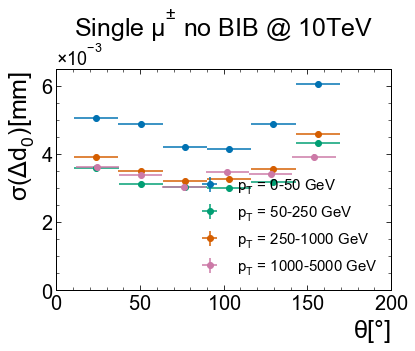

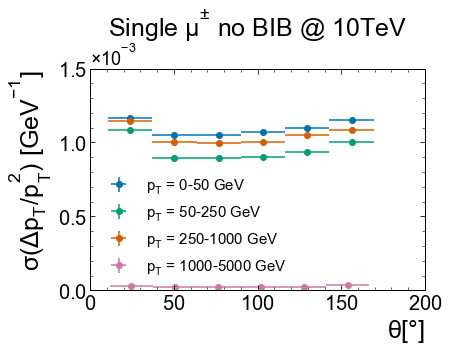

C:\Users\leoro\AppData\Local\Temp\ipykernel_47252\1571177567.py:54: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(double_gaussian, bin_centers, counts, p0=p0)


Single Gaussian fit failed for Slice 3 for pt 0. Fitting double Gaussian instead.
Single Gaussian fit failed for Slice 0 for pt 1. Fitting double Gaussian instead.
Single Gaussian fit failed for Slice 1 for pt 1. Fitting double Gaussian instead.
Single Gaussian fit failed for Slice 1 for pt 2. Fitting double Gaussian instead.
Single Gaussian fit failed for Slice 2 for pt 2. Fitting double Gaussian instead.
Single Gaussian fit failed for Slice 3 for pt 2. Fitting double Gaussian instead.
Could not fit Gaussian for Slice 4 for pt 2.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Single Gaussian fit failed for Slice 0 for pt 3. Fitting double Gaussian instead.
Single Gaussian fit failed for Slice 1 for pt 3. Fitting double Gaussian instead.
Could not fit Gaussian for Slice 3 for pt 3.
Single Gaussian fit failed for Slice 4 for pt 3. Fitting double Gaussian instead.


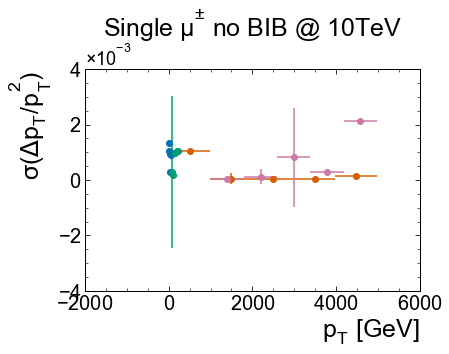

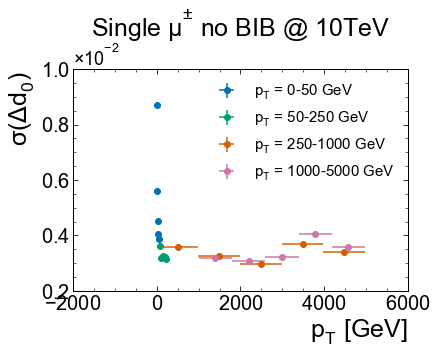

In [14]:
theta_all = [LC_theta_match[np.ravel(LC_pt_match)<=50], LC_theta_match[(np.ravel(LC_pt_match)>50) & (np.ravel(LC_pt_match)<=250)], LC_theta_match[np.ravel(LC_pt_match)>250 & (np.ravel(LC_pt_match)<=1000)], fold_data(ak.flatten(LC_theta_match[np.ravel(LC_pt_match)>1000]), bib = False)]
d0_all = [LC_d0[np.ravel(LC_pt_match)<=50], LC_d0[(np.ravel(LC_pt_match)>50) & (np.ravel(LC_pt_match)<=250)], LC_d0[np.ravel(LC_pt_match)>250 & (np.ravel(LC_pt_match)<=1000)], fold_data(ak.flatten(LC_d0[np.ravel(LC_pt_match)>1000]), bib = False)]
pt_res_all = [LC_pt_res[np.ravel(LC_pt_match)<=50], LC_pt_res[(np.ravel(LC_pt_match)>50) & (np.ravel(LC_pt_match)<=250)], LC_pt_res[np.ravel(LC_pt_match)>250 & (np.ravel(LC_pt_match)<=1000)], fold_data(ak.flatten(LC_pt_res[np.ravel(LC_pt_match)>1000]), bib = False)]
pt_track_all = [LC_track_pt[np.ravel(LC_pt_match)<=50], LC_track_pt[(np.ravel(LC_pt_match)>50) & (np.ravel(LC_pt_match)<=250)], LC_track_pt[np.ravel(LC_pt_match)>250 & (np.ravel(LC_pt_match)<=1000)], fold_data(ak.flatten(LC_track_pt[np.ravel(LC_pt_match)>1000]), bib = False)]
pt_match_all =  [LC_pt_match[np.ravel(LC_pt_match)<=50], LC_pt_match[(np.ravel(LC_pt_match)>50) & (np.ravel(LC_pt_match)<=250)], LC_pt_match[np.ravel(LC_pt_match)>250 & (np.ravel(LC_pt_match)<=1000)], fold_data(ak.flatten(LC_pt_match[np.ravel(LC_pt_match)>1000]), bib = False)]
nhits_all =  [LC_nhits[np.ravel(LC_pt_match)<=50], LC_nhits[(np.ravel(LC_pt_match)>50) & (np.ravel(LC_pt_match)<=250)], LC_nhits[np.ravel(LC_pt_match)>250 & (np.ravel(LC_pt_match)<=1000)], fold_data(ak.flatten(LC_nhits[np.ravel(LC_pt_match)>1000]), bib = False)]

#print(theta_all,d0_all)
theta_all_masked = []
d0_all_masked = []
pt_res_all_masked = []
pt_match_all_masked = []
for i in range(len(theta_all)):
    x = theta_all[i]
    y = d0_all[i]
    w = pt_match_all[i]
    z = pt_res_all[i] /w
    v = pt_track_all[i]
    u = nhits_all[i]
    # Create a boolean mask for the condition
    theta_cut = (0 <= x) & (x < 180)
    pt_res_cut = np.abs(z) > 0
    pt_cut = v > 1
    d0_cut = y <= 0.1
    nhits_cut = u > 4
    # Apply the mask to filter the arrays
    mask = theta_cut & pt_res_cut & pt_cut & d0_cut & nhits_cut
    x_masked = x[mask]
    y_masked = y[mask]
    z_masked = z[mask]
    w_masked = w[mask]
    theta_all_masked.append(x_masked)
    d0_all_masked.append(y_masked)
    pt_res_all_masked.append(z_masked)
    pt_match_all_masked.append(w_masked)
# theta_all = ak.concatenate([theta_0_50, theta_50_250, theta_match],axis = 0)
numpoints = 6
array1 = np.linspace(-0.5,0.5,300)    # pt_0_50_bins
array2 = np.linspace(-0.5,0.5,300)  # pt_50_250_bins
array3 = np.linspace(-0.5,0.5,300) # pt_250_1000_bins
array4 = np.linspace(-0.005, 0.005, 250)  # pt_1000_5000_bins
pt_2_bins = [array1, array2, array3, array4]
d0_ylim = (0,0.0065)
pt_ylim = (0,0.0015)
plotrms_multi(theta_all_masked,d0_all_masked, numbins = numpoints, ylim = d0_ylim,labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$\theta[\degree]$', ylabel = r'$\sigma(\Delta d_0)$[mm] ', title = r'Single $\mu^{\pm}$ no BIB @ 10TeV', savepdf=True, savename='d0_res_vs_theta.pdf')
plotrms_multi(theta_all_masked,pt_res_all_masked, numbins = numpoints, bins = pt_2_bins, log = False, ylim = pt_ylim, labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$\theta[\degree]$', ylabel = r'$\sigma(\Delta p_T/p_T^2)$ $[GeV^{-1}]$', title = r'Single $\mu^{\pm}$ no BIB @ 10TeV', savepdf=True, savename='pt_res_vs_theta.pdf')
plotrms_multi(pt_match_all_masked,pt_res_all_masked, numbins = 5, labels = ['_','_','_', '_'], xlabel = r'$p_T$ [GeV]', ylabel = r'$\sigma(\Delta p_T/p_T^2)$ ', title = r'Single $\mu^{\pm}$ no BIB @ 10TeV')
plotrms_multi(pt_match_all_masked,d0_all_masked, numbins = 5, labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$p_T$ [GeV]', ylabel = r'$\sigma(\Delta d_0)$ ', title = r'Single $\mu^{\pm}$ no BIB @ 10TeV')

### BIB

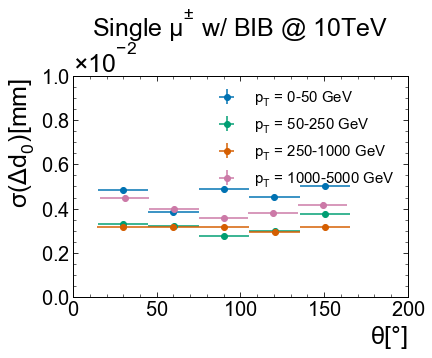

C:\Users\leoro\AppData\Local\Temp\ipykernel_47252\1571177567.py:89: RuntimeWarning: invalid value encountered in sqrt
  rms = np.sqrt(weighted_variance)


Single Gaussian fit failed for Slice 2 for pt 3. Fitting double Gaussian instead.


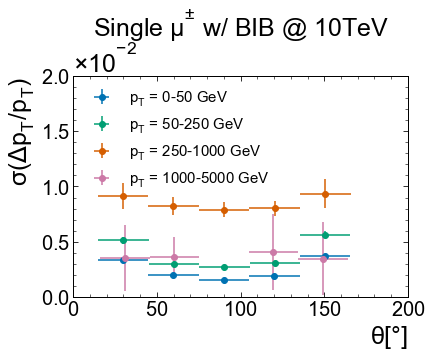

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


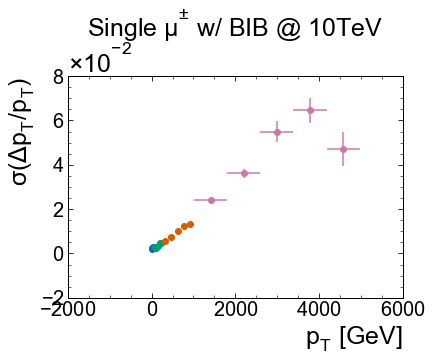

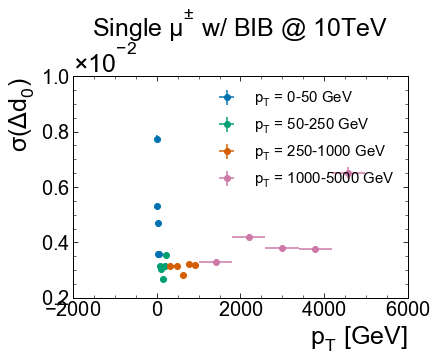

: 

In [67]:
conditions = [0, 50, 250, 1000]

# AFTER REMOVING HARD_RAD ARTIFACT BUT LOOKS WEIRD
# bib_theta_all = [bib_track_theta[(np.ravel(bib_all['LC_pt_match']) <= conditions[i]) & (np.ravel(bib_all['LC_pt_match']) > conditions[i - 1])] for i in range(1, len(conditions))]
# bib_d0_all = [bib_all['LC_d0'][(np.ravel(bib_all['LC_pt_match']) <= conditions[i]) & (np.ravel(bib_all['LC_pt_match']) > conditions[i - 1])] for i in range(1, len(conditions))]
# bib_pt_res_all = [bib_all['LC_pt_res'][(np.ravel(bib_all['LC_pt_match']) <= conditions[i]) & (np.ravel(bib_all['LC_pt_match']) > conditions[i - 1])] for i in range(1, len(conditions))]
# bib_track_pt_all = [bib_all['LC_track_pt'][(np.ravel(bib_all['LC_pt_match']) <= conditions[i]) & (np.ravel(bib_all['LC_pt_match']) > conditions[i - 1])] for i in range(1, len(conditions))]
# bib_pt_match_all = [bib_all['LC_pt_match'][(np.ravel(bib_all['LC_pt_match']) <= conditions[i]) & (np.ravel(bib_all['LC_pt_match']) > conditions[i - 1])] for i in range(1, len(conditions))]
# bib_nhits_all = [bib_all['LC_nhits'][(np.ravel(bib_all['LC_pt_match']) <= conditions[i]) & (np.ravel(bib_all['LC_pt_match']) > conditions[i - 1])] for i in range(1, len(conditions))]

# BEFORE REMOVING HARD_RAD ARTIFACT
bib_theta_all = [bib_0_50_theta, bib_50_250_theta, bib_250_1000_theta,  np.degrees(fold_data(ak.flatten((bib_5TeV['LC_track_theta'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]))))]
bib_d0_all = [bib_0_50['LC_d0'], bib_50_250['LC_d0'], bib_250_1000['LC_d0'],  fold_data(ak.flatten(bib_5TeV['LC_d0'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]))]
bib_pt_res_all = [bib_0_50['LC_pt_res'], bib_50_250['LC_pt_res'], bib_250_1000['LC_pt_res'], fold_data(ak.flatten(bib_5TeV['LC_pt_res'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]))]
bib_track_pt_all = [bib_0_50['LC_track_pt'], bib_50_250['LC_track_pt'], bib_250_1000['LC_track_pt'], fold_data(ak.flatten(bib_5TeV['LC_track_pt'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]))]
bib_pt_match_all = [bib_0_50['LC_pt_match'], bib_50_250['LC_pt_match'], bib_250_1000['LC_pt_match'], fold_data(ak.flatten(bib_5TeV['LC_pt_match'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]))]
bib_nhits_all = [bib_0_50['LC_nhits'], bib_50_250['LC_nhits'], bib_250_1000['LC_nhits'], fold_data(ak.flatten(bib_5TeV['LC_nhits'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]))]

#print(bib_theta_all,bib_d0_all)
bib_theta_all_masked = []
bib_d0_all_masked = []
bib_pt_res_all_masked = []
bib_pt_match_all_masked = []
for i in range(len(bib_theta_all)):
    x = bib_theta_all[i]
    y = bib_d0_all[i]
    w = bib_pt_match_all[i]
    z = bib_pt_res_all[i] # /w
    v = bib_track_pt_all[i]
    u = bib_nhits_all[i]
    # Create a boolean mask for the condition
    theta_cut = (0 <= x) & (x < 180)
    pt_res_cut = np.abs(z) > 0
    pt_cut = v > 1
    d0_cut = y <= 0.1
    nhits_cut = u > 4
    # Apply the mask to filter the arrays
    mask = theta_cut & pt_res_cut & pt_cut & d0_cut & nhits_cut
    x_masked = x[mask]
    y_masked = y[mask]
    z_masked = z[mask]
    w_masked = w[mask]
    bib_theta_all_masked.append(x_masked)
    bib_d0_all_masked.append(y_masked)
    bib_pt_res_all_masked.append(z_masked)
    bib_pt_match_all_masked.append(w_masked)
# bib_theta_all = ak.concatenate([theta_0_50, theta_50_250, theta_match],axis = 0)
numpoints = 5
array1 = np.linspace(-0.01, 0.01, 200)    # pt_0_50_bins
array2 = np.linspace(-0.005, 0.005, 200)  # pt_50_250_bins
array3 = np.linspace(-0.003, 0.003, 200) # pt_250_1000_bins
array4 = np.linspace(-0.001, 0.001, 200)  # pt_1000_5000_bins
pt_2_bins = [array1, array2, array3, array4]
pt_bins = [array1*10, array2*10, array3*10, array4*5]
d0_ylim = (0,0.01)
pt_ylim = (0,0.02) # better for /pt^2?
plotrms_multi(bib_theta_all_masked,bib_d0_all_masked, numbins = numpoints, ylim = d0_ylim, labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$\theta[\degree]$', ylabel = r'$\sigma(\Delta d_0)$[mm] ', title = r'Single $\mu^{\pm}$ w/ BIB @ 10TeV', savepdf=False, savename='bib_d0_res_vs_theta.pdf')
# plotrms_multi(bib_theta_all_masked,bib_pt_res_all_masked, numbins = numpoints, bins = pt_2_bins, ylim = None, labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$\theta[\degree]$', ylabel = r'$\sigma(\Delta p_T/p_T^2)$$[GeV^{-1}]$ ', title = r'Single $\mu^{\pm}$ w/ BIB @ 10TeV', savepdf=False, savename='bib_pt_res_vs_theta.pdf')
plotrms_multi(bib_theta_all_masked,bib_pt_res_all_masked, numbins = numpoints, bins = pt_bins, ylim = pt_ylim, labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$\theta[\degree]$', ylabel = r'$\sigma(\Delta p_T/p_T)$ ', title = r'Single $\mu^{\pm}$ w/ BIB @ 10TeV', savepdf=False, savename='bib_pt_res_vs_theta.pdf')
plotrms_multi(bib_pt_match_all_masked,bib_pt_res_all_masked, numbins = 5, labels = ['_','_','_','_'], xlabel = r'$p_T$ [GeV]', ylabel = r'$\sigma(\Delta p_T/p_T)$ ', title = r'Single $\mu^{\pm}$ w/ BIB @ 10TeV')
plotrms_multi(bib_pt_match_all_masked,bib_d0_all_masked, numbins = 5, labels = [r'$p_T$ = 0-50 GeV', r'$p_T$ = 50-250 GeV', r'$p_T$ = 250-1000 GeV', r'$p_T$ = 1000-5000 GeV'], xlabel = r'$p_T$ [GeV]', ylabel = r'$\sigma(\Delta d_0)$ ', title = r'Single $\mu^{\pm}$ w/ BIB @ 10TeV')

In [16]:
print(len(ak.flatten(pt_all_5TeV['LC_pt_match'][ak.flatten(pt_all_5TeV['LC_pt_match']>1000)])))
print(len(ak.flatten(bib_all_5TeV['LC_pt_match'][ak.flatten(bib_all_5TeV['LC_pt_match']<50)])))
print(len(ak.flatten(bib_5TeV['LC_pt_match'][ak.flatten(bib_5TeV['LC_pt_match']>1000)])))
print(bib_5TeV['LC_track_theta'][ak.flatten(bib_5TeV['LC_pt_match']>1000)])
print(len((fold_data(ak.flatten(pt_all_5TeV['LC_pt_match']), bib = False)[fold_data(ak.flatten(pt_all_5TeV['LC_pt_match']>1000), bib = False)])))
print((ak.flatten(fold_data(pt_all_5TeV['LC_pt_match'], bib = False)[fold_data(pt_all_5TeV['LC_pt_match']>1000, bib = False)])))
print(((fold_data(pt_all_5TeV['LC_pt_match'], bib = False)[fold_data(pt_all_5TeV['LC_pt_match']>1000, bib = False)])))

1590
887
706
[[2.51], [1.91], [0.908], [1.74], [0.862], ..., [2.6], [1.24], [1.14], [0.768]]
1590
[2.61e+03, 4.32e+03, 4.65e+03, 2.25e+03, ..., 1.94e+03, 3.27e+03, 2.68e+03]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]


In [17]:
print(len(ak.flatten(bib_5TeV['LC_pt_match'][(bib_5TeV['LC_pt_match']>1000)])))
print(len(ak.flatten(fold_data(bib_5TeV['LC_pt_match'], bib = True)[fold_data(bib_5TeV['LC_pt_match']>1000, bib = True)])))
print((ak.flatten(fold_data(bib_5TeV['LC_pt_match'], bib = True)[fold_data(bib_5TeV['LC_pt_match']>1000, bib = True)])))
print(((fold_data(bib_5TeV['LC_pt_match'], bib = True)[fold_data(bib_5TeV['LC_pt_match']>1000, bib = True)])))
print((ak.flatten(bib_5TeV['LC_pt_match'][(bib_5TeV['LC_pt_match']>1000)])))


706
1083
[2.5e+03, 4.19e+03, 3.7e+03, 3.56e+03, ..., 2.2e+03, 3.21e+03, 1.45e+03]
[[2.5e+03], [4.19e+03], [3.7e+03], ..., [2.2e+03], [3.21e+03], [1.45e+03]]
[2.5e+03, 4.19e+03, 3.7e+03, 3.56e+03, ..., 3.94e+03, 1.39e+03, 1.82e+03]


### Check individual Gaussians 

Theta: 0.0 <= theta < 45.0
# of data points (total, pt > 1000): 142 0
Slice 0: 250 to 1000
Mean from Fit: -4.850878460243806e-06
Sigma from Fit: 2.379409545983259e-05
------------------------------------


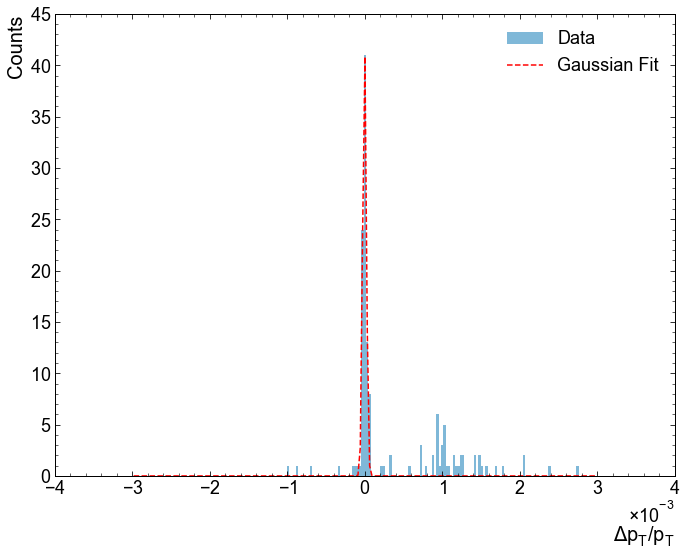

Theta: 45.0 <= theta < 90.0
# of data points (total, pt > 1000): 265 0
Slice 0: 250 to 1000
Mean from Fit: -2.2821411316913156e-06
Sigma from Fit: -1.814471455053226e-05
------------------------------------


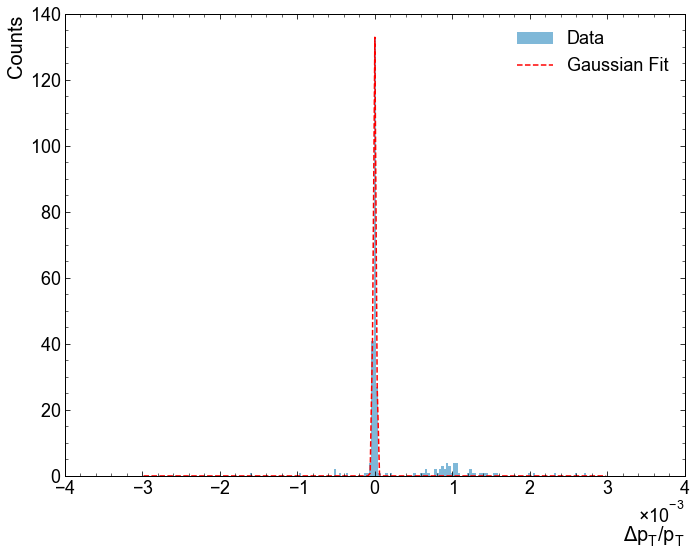

Theta: 90.0 <= theta < 135.0
# of data points (total, pt > 1000): 281 0
Slice 0: 250 to 1000
Mean from Fit: -2.204635628802656e-06
Sigma from Fit: -1.6851566846425015e-05
------------------------------------


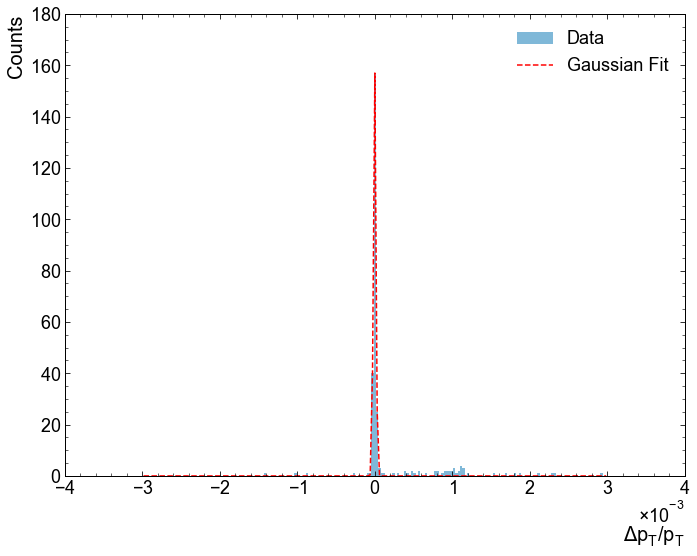

Theta: 135.0 <= theta < 180.0
# of data points (total, pt > 1000): 129 0
Slice 0: 250 to 1000
Mean from Fit: 1.8533628394103177e-06
Sigma from Fit: -2.051319940222731e-05
------------------------------------


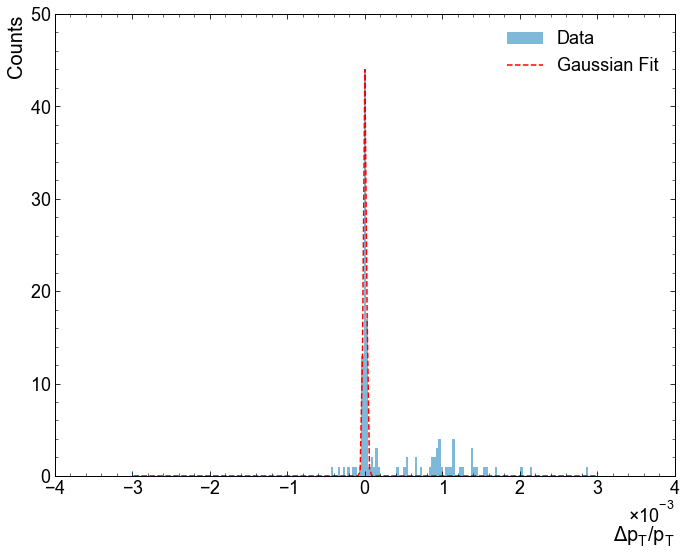

In [18]:
d0_bins = np.linspace(-0.3, 0.3, 100) # Seems to work fine using either linspace or just a number
pt_bins = array3 #np.linspace(-0.0003,0.0003, 100) # Use for LC_pt_res/LC_pt_match; Unless there is a very hard cut on the LC_pt_res (< ~1), use linspace between -1,1, but even then not great in endcaps
# pt_bins = np.linspace(-0.5,0.5, 100) # Use for LC_pt_res 
eta_bins = np.linspace(-2.7, 2.7, 100)
chi2ndf_bins = np.linspace(0, 2, 100)
nhits_bins = np.linspace(0, 20, 100)
x_bins_50_250 = np.array([50,250])
x_bins_250_1000 = np.array([250,1000])
d0_title = r'$\Delta d_0$'
pt_title = r'$\Delta p_T$'

theta_bins = 4
which_data = bib_250_1000 # Don't forget to change x_bins too!
# which_theta = np.degrees(fold_data(bib_250_1000['LC_track_theta'], bib = True)) # THIS HAS TO BE THE SAME AS which_data, also check for degrees vs radians!!!
which_theta = np.degrees((bib_250_1000['LC_track_theta']))
for i in range(theta_bins):
    print(r'Theta:', (180/theta_bins)*i, r'<= theta <', (180/theta_bins)*(i+1))
    # theta_bin = ((180/theta_bins)*i <= which_theta) & (which_theta < (180/theta_bins)*(i+1)) & [np.abs(LC_pt_resolution[0]) < 1 for LC_pt_resolution in fold_data(which_data['LC_pt_res'], bib = True)]
    theta_bin = ((180/theta_bins)*i <= which_theta) & (which_theta < (180/theta_bins)*(i+1)) & [np.abs(LC_pt_resolution[0]) < 1 for LC_pt_resolution in (which_data['LC_pt_res'])]
    # print(which_data['LC_pt_res'][theta_cut])
    count = 0
    for bin in theta_bin:
        if bin[0] == True:
            count +=1
    # print("# of data points (total, pt > 1000):", count, len(ak.flatten(fold_data(which_data['LC_pt_match'], bib = True)[theta_bin[fold_data(which_data['LC_pt_match']>1000, bib = True)]]))) # Not sure how 'count' works but it does so don't worry
    print("# of data points (total, pt > 1000):", count, len(ak.flatten((which_data['LC_pt_match'])[theta_bin[(which_data['LC_pt_match']>1000)]]))) # Not sure how 'count' works but it does so don't worry

    # First one has dpT, second one has dpT/pT
    # plotrms_slice(which_data['LC_pt_match'][theta_bin], (which_data['LC_pt_res']*which_data['LC_pt_match'])[theta_bin], x_bins = x_bins_250_1000, bins=pt_bins, title=pt_title, rv = False, sigma5 = False)
    #plotrms_slice(fold_data(which_data['LC_pt_match'], bib = True)[theta_bin], fold_data((which_data['LC_pt_res']/which_data['LC_pt_match']), bib = True)[theta_bin], x_bins = [250,1000], bins=pt_bins, xlim = None, title=pt_title+r'/$p_T$', rv = False, sigma5 = False)
    plotrms_slice((which_data['LC_pt_match'])[theta_bin], ((which_data['LC_pt_res']/which_data['LC_pt_match']))[theta_bin], x_bins = [250,1000], bins=pt_bins, xlim = None, title=pt_title+r'/$p_T$', rv = False, sigma5 = False)
    # plotrms_slice(which_data['LC_pt_match'][theta_bin], which_data['LC_d0'][theta_bin], x_bins = [1000,5000], bins=pt_bins, xlim = None, title=d0_title, rv = False, sigma5 = False)
    # if i == 5:
    #     break
# sigma,mean = plotrms_slice(which_data['LC_pt_match'], which_data['LC_pt_res'], x_bins = x_bins_250_1000, bins=pT_bins, title=pt_title, rv = False, sigma5 = False)

### Comparing Bulk vs Tails 

In [19]:

# spread = 5*np.abs(sigma)
# print(np.mean(pt_res), np.std(pt_res))
# pt_bulk = np.array([-1*spread+mean <= x[0] < spread+mean for x in pt_res]) 
# pt_tails = np.array([x[0] < -1*spread+mean or x[0] >= spread+mean for x in pt_res])
# d0_bulk = np.array([-1*spread+mean <= x[0] < spread+mean for x in d0_res_match])
# d0_tails = np.array([x[0] < -1*spread+mean or x[0] >= spread+mean for x in d0_res_match])

In [20]:
# legends= ["Bulk", "Tail"]
# c = 0
# for x in [pt_match,eta_match,chi2/ndf, nhits]:
#     arrays = [x[pt_bulk], x[pt_tails]]
#     bins = np.linspace(np.min(x), np.max(x), 100)
#     if c == 0:
#         label = ';$p_{T}$'
#     elif c == 1:
#         label = r';$\eta$'
#     elif c == 2:
#         label = r';$\chi^2$/ndf'
#     elif c == 3:
#         label = r';$n_{\rm hits}$'
#     c += 1
#     compare1DHistograms(arrays, bins = bins, leg = legends, label = label)

### Plot 2D Hists showing resolution against $p_T$/$\eta$ and then the RMS of them against $\eta$

18641 18641


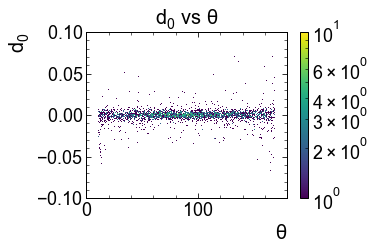

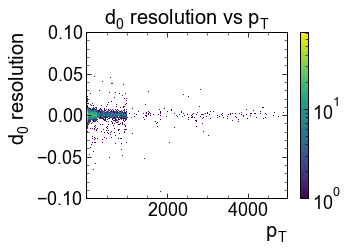

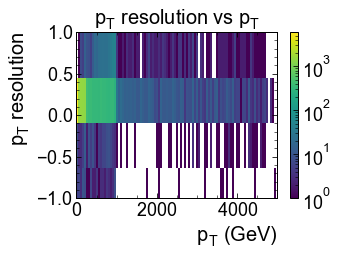

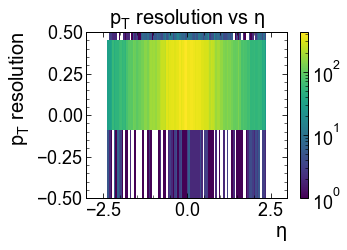

In [21]:
# # Histogram for mcp_eta
# plt.figure(figsize=(6, 3))

# plt.subplot(1, 2, 1)
# plt.hist((mcp_eta), bins=50, color='green')
# plt.xlabel('MCP $\\eta$')
# plt.ylabel('Count')
# plt.title('MCP $\\eta$ Distribution')

# # Histogram for mcp_phi
# plt.subplot(1, 2, 2)
# plt.hist((mcp_phi), bins=50, color='red')
# plt.xlabel('MCP $\\phi$')
# plt.ylabel('Count')
# plt.title('MCP $\\phi$ Distribution')

# # Adjust subplot spacing
# plt.tight_layout()

pt_xlim = [0,5000]
rms_bins = 10
print(len(theta_match),len(d0_res_match))
plot2DHistogram(theta_match, d0_res_match, bins=(300,1000), label=r"$d_0$ vs $\theta$; $\theta$;$d_0$", xlim = (0,180), ylim = (-0.1,0.1))
# plotrms(theta_match, d0_res_match, bins=rms_bins, label=r"$\sigma(d_0)$ vs $\theta$; $\theta$; $\sigma(d_0)$ (mm)")
# plotrms(bib_all_5TeV['LC_pt_match'], bib_all_5TeV['LC_pt_res'], bins=rms_bins, label=r"BIB $\sigma(p_T)$ vs $p_T$; $p_T$; $\sigma(p_T)$ (GeV)", xlim = pt_xlim)
plot2DHistogram(pt_match, d0_res_match, bins=(300,1000), label=r"$d_0$ resolution vs $p_T$; $p_T$;$d_0$ resolution", ylim = (-0.1,0.1))#, xlim = (0,1000), ylim = (-0.1,0.1))
# plotrms(pt_match, d0_res_match, bins=rms_bins, label=r"$\sigma(d_0)$ vs $p_T$; $p_T$ (GeV); $\sigma(d_0)$ (mm)", xlim = pt_xlim)
# plot2DHistogram(eta_match, z0_res_match, bins=(100,1000), label=r"$z_0$ resolution vs $\eta$; $\eta$;$z_0$ resolution", xlim = (-3,3), ylim = (-0.1,0.1))
# # plotrms(eta_match, z0_res_match, bins=rms_bins, label=r"$\sigma(z_0)$ vs $\eta$; $\eta$; $\sigma(z_0)$")
# plot2DHistogram(pt_match, z0_res_match, bins=(100,1000), label=r"$z_0$ resolution vs $p_T$; $p_T$;$z_0$ resolution", xlim = pt_xlim, ylim = (-0.1,0.1))
# # plotrms(pt_match, z0_res_match, bins=rms_bins, label=r"$\sigma(z_0)$ vs $p_T$; $p_T$; $\sigma(z_0)$", xlim = pt_xlim)
plot2DHistogram(pt_match, pt_res, bins=(100,15000), label=r"$p_T$ resolution vs $p_T$; $p_T$ (GeV);$p_T$ resolution", xlim = pt_xlim, ylim = (-1,1))
# plotrms(pt_match, pt_res, bins=rms_bins, label=r"$\sigma(p_T)$ vs $p_T$; $p_T$; $\sigma(p_T)$ (GeV)", xlim = pt_xlim)
plot2DHistogram(eta_match, pt_res, bins=(100,15000), label=r"$p_T$ resolution vs $\eta$; $\eta$;$p_T$ resolution", xlim = (-3,3), ylim = (-0.5,0.5))
# plotrms(theta_match, pt_res, bins=rms_bins, label=r"$\sigma(p_T)$ vs $\theta$; $\theta$; $\sigma(p_T)$ (GeV)")

In [22]:
# plotrms(bib_5TeV['LC_pt_match'][ak.flatten(bib_5TeV['LC_pt_match']>1000)], bib_5TeV['LC_d0'][ak.flatten(bib_5TeV['LC_pt_match']>1000)], bins=5, label=r"BIB $\sigma(d_0)$ vs $p_T$; $p_T$; $\sigma(d_0)$ (GeV)", xlim = (1000,5000))
# plotrms(np.degrees(bib_5TeV['LC_track_theta'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]), bib_5TeV['LC_d0'][ak.flatten(bib_5TeV['LC_pt_match']>1000)], bins=5, label=r"BIB $\sigma(d_0)$ vs $\theta$; $\theta$; $\sigma(d_0)$ (GeV)")
# plotrms(np.degrees(bib_5TeV['LC_track_theta'][ak.flatten(bib_5TeV['LC_pt_match']>1000)]), bib_5TeV['LC_pt_res'][ak.flatten(bib_5TeV['LC_pt_match']>1000)], bins=6, label=r"BIB $\sigma(p_T)$ vs $\eta$; $\eta$; $\sigma(p_T)$ (GeV)")

### Residual Studies

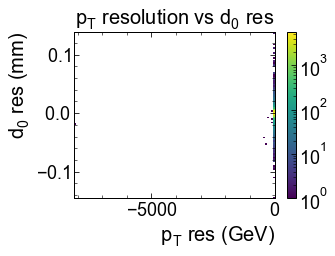

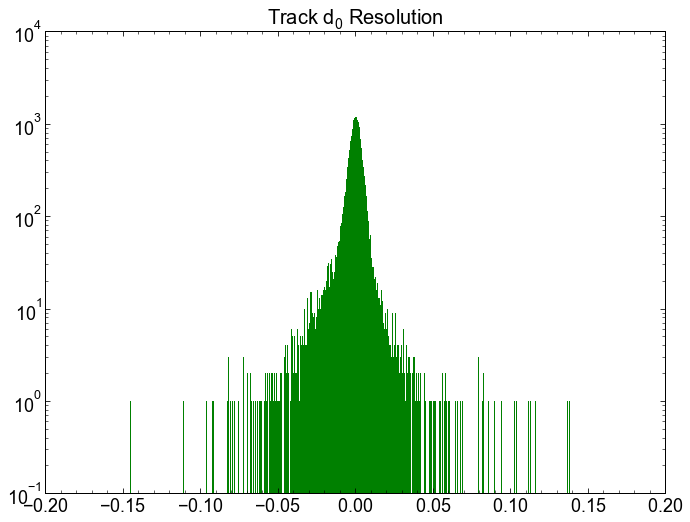

In [23]:
plot2DHistogram(pt_res, d0_res_match, bins=(100,100), label=r"$p_T$ resolution vs $d_0$ res; $p_T$ res (GeV);$d_0$ res (mm)")
plt.hist((np.ravel(d0_res_match)), bins=500, color='green')
plt.yscale('log')
#plt.xlim(-1,1)
#plt.ylim(0,200)
plt.title('Track $d_0$ Resolution')
plt.show()


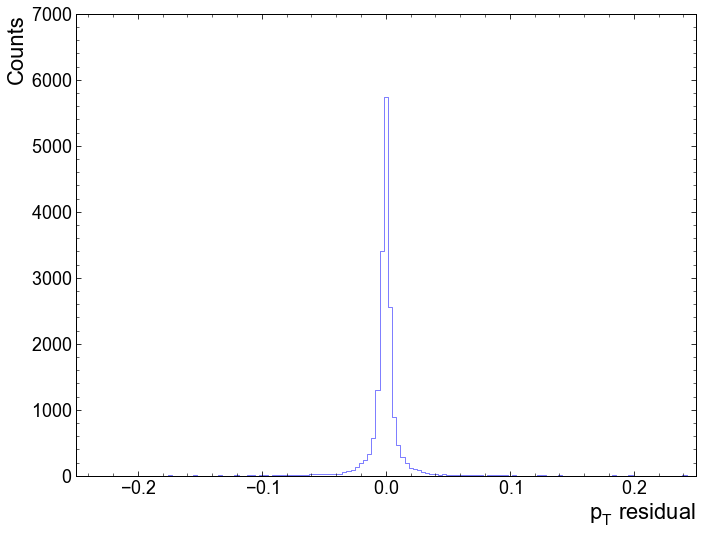

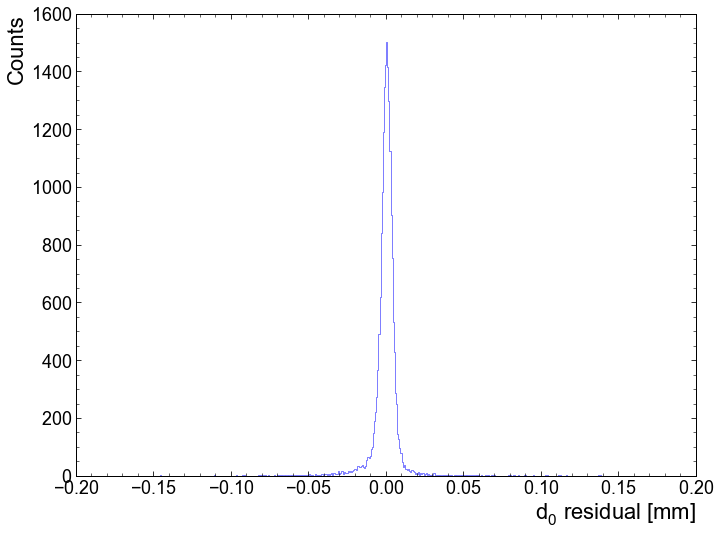

In [24]:
plt.figure()

plt.hist((np.ravel(pt_res[np.abs(pt_res) < 1])), bins=np.linspace(-0.5,0.5,300), histtype='step', label = "", color = 'blue')
#plt.yscale('log')
plt.xlim(-0.25,0.25)
#plt.ylim(0,200)
#plt.title(r'$p_T$ Residual for pt_250_1000 data with no quality cut')
plt.xlabel(r'$p_T$ residual', fontsize = 22, loc = 'right')
plt.ylabel('Counts', fontsize = 22, loc = 'top')
#plt.yscale('log')
plt.show()

plt.hist((np.ravel(d0_res)), bins=400, histtype='step', color = 'blue')
#plt.xlim(-1,1)
#plt.ylim(0,200)
#plt.title(r'$d_0$ Residual for pt_250_1000 data')
plt.xlabel(r'$d_0$ residual [mm]', fontsize = 22, loc = 'right')
plt.ylabel('Counts', fontsize = 22, loc = 'top')
#plt.yscale('log')
plt.show()


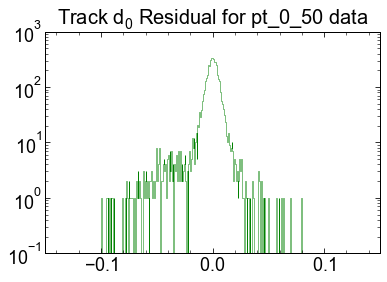

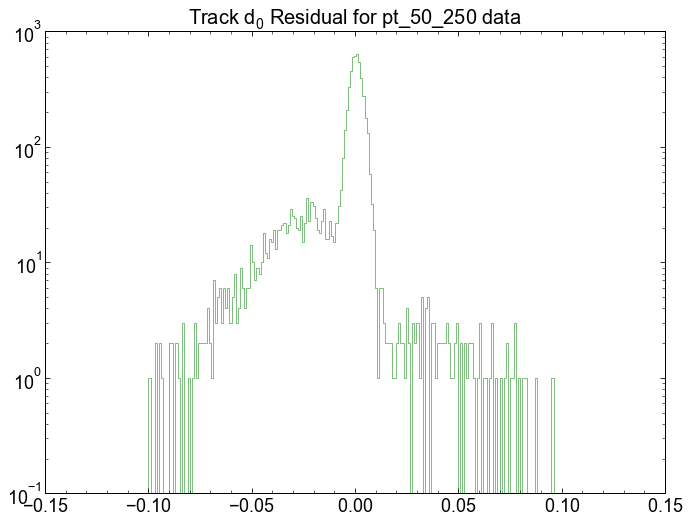

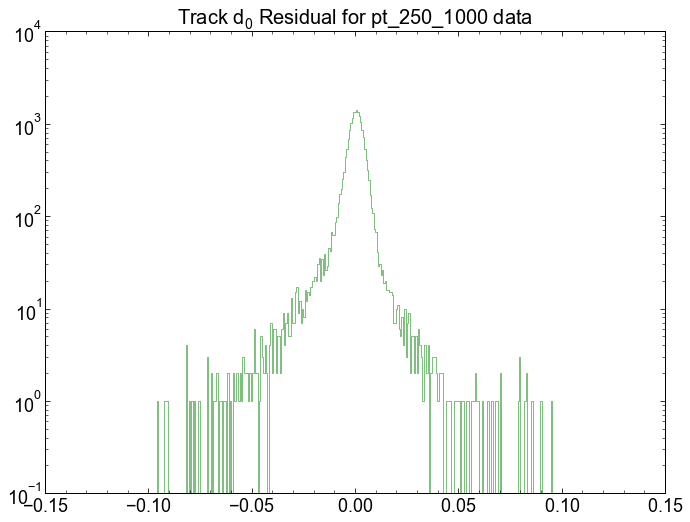

In [25]:
from importlib import reload
plt=reload(plt)
#plot2DHistogram(legacy['pt_match'], legacy['d0_res_match'],bins=(100,15000), label=r"$d_0$ Residual vs $d_0$; $d_0$ (GeV);$d_0$ Residual", xlim = [250,1000], ylim = (-2,2))
plt.figure(figsize=(6, 4))
d0_res_match_50_250 = pt_50_250['d0_res_match']

plt.hist((np.ravel(pt_0_50['d0_res_match'])), bins=np.linspace(-0.1,0.1,300), histtype = 'step', color='green')
plt.yscale('log')
#plt.xlim(-0.1,0.1)
#plt.ylim(0,200)
plt.title(r'Track $d_0$ Residual for pt_0_50 data')
plt.show()

plt.hist((np.ravel(d0_res_match_50_250)), bins=np.linspace(-0.1,0.1,200), histtype = 'step', color='green')
plt.yscale('log')
#plt.xlim(-0.1,0.1)
#plt.ylim(0,200)
plt.title(r'Track $d_0$ Residual for pt_50_250 data')
plt.show()

plt.hist((np.ravel(d0_res_match)), bins=np.linspace(-0.1,0.1,300), histtype = 'step', color='green')
plt.yscale('log')
#plt.xlim(-0.1,0.1)
#plt.ylim(0,200)
plt.title(r'Track $d_0$ Residual for pt_250_1000 data')
plt.show()

### Misc. Studies

<Figure size 432x288 with 0 Axes>

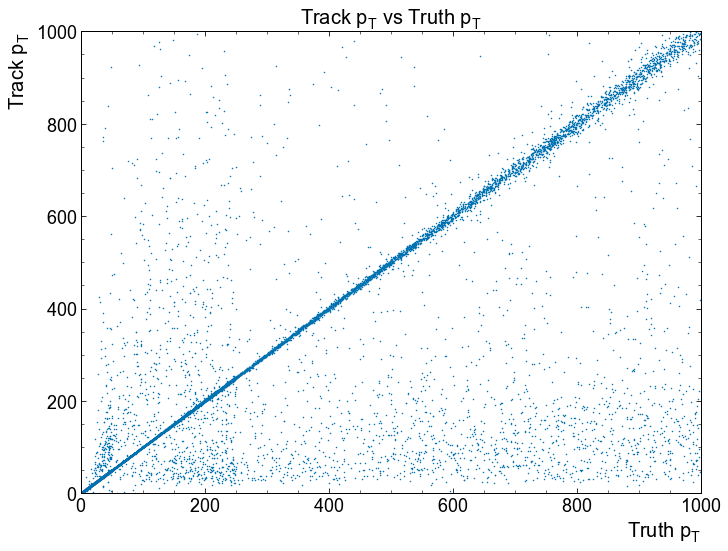

In [26]:
#from importlib import reload
#plt=reload(plt)
total_truth_pt = ak.concatenate([pt_0_50['mcp_mu_pt'], pt_50_250['mcp_mu_pt'], pt_250_1000['mcp_mu_pt']], axis=0)
total_track_pt = ak.concatenate([pt_0_50['pt_match'], pt_50_250['pt_match'], pt_250_1000['pt_match']], axis=0)  # this is also truth pt but only for muons that have a matched track associated with them
total_track_eta = ak.concatenate([pt_0_50['eta_match'], pt_50_250['eta_match'], pt_250_1000['eta_match']], axis=0)
total_truth_eta = ak.concatenate([pt_0_50['mcp_mu_eta'], pt_50_250['mcp_mu_eta'], pt_250_1000['mcp_mu_eta']], axis=0)
total_truth_phi = ak.concatenate([pt_0_50['mcp_mu_phi'], pt_50_250['mcp_mu_phi'], pt_250_1000['mcp_mu_phi']], axis=0)
total_track_phi = ak.concatenate([pt_0_50['phi_match'], pt_50_250['phi_match'], pt_250_1000['phi_match']], axis=0)
total_nhits = (ak.concatenate([pt_0_50['nhits'], pt_50_250['nhits'], pt_250_1000['nhits']], axis=0))
total_pixel_nhits = (ak.concatenate([pt_0_50['pixel_nhits'], pt_50_250['pixel_nhits'], pt_250_1000['pixel_nhits']], axis=0))
ttt = ak.concatenate([pt_0_50['track_pt'], pt_50_250['track_pt'], pt_250_1000['track_pt']], axis=0)  # just using for truth pt vs track pt below
total_pt_res = ak.concatenate([pt_0_50['track_pt'], pt_50_250['track_pt'], pt_250_1000['track_pt']], axis=0)
total_chi2 = ak.concatenate([pt_0_50['chi2'], pt_50_250['chi2'], pt_250_1000['chi2']], axis=0)
total_ndf = ak.concatenate([pt_0_50['ndf'], pt_50_250['ndf'], pt_250_1000['ndf']], axis=0)

# total_fake_pt = ak.concatenate([pt_0_50['fake_pt'], pt_50_250['fake_pt'], pt_250_1000['fake_pt']], axis = 0)
# total_fake_eta = ak.concatenate([pt_0_50['fake_eta'], pt_50_250['fake_eta'], pt_250_1000['fake_eta']], axis = 0)
# total_fake_phi = ak.concatenate([pt_0_50['fake_phi'], pt_50_250['fake_phi'], pt_250_1000['fake_phi']], axis = 0)
# total_fake_nhits = np.ravel(ak.concatenate([pt_0_50['fake_nhits'], pt_50_250['fake_nhits'], pt_250_1000['fake_nhits']], axis=0))
# total_fake_pixel_nhits = np.ravel(ak.concatenate([pt_0_50['fake_pixel_nhits'], pt_50_250['fake_pixel_nhits'], pt_250_1000['fake_pixel_nhits']], axis=0))
# total_fake_chi2 = np.ravel(ak.concatenate([pt_0_50['fake_chi2'], pt_50_250['fake_chi2'], pt_250_1000['fake_chi2']], axis=0))
# total_fake_ndf = np.ravel(ak.concatenate([pt_0_50['fake_ndf'], pt_50_250['fake_ndf'], pt_250_1000['fake_ndf']], axis=0))

bib_truth_pt = bib_all['mcp_mu_pt'] #ak.concatenate([bib_0_50['mcp_mu_pt'], bib_50_250['mcp_mu_pt'], bib_250_1000['mcp_mu_pt']], axis=0)
bib_track_pt = bib_all['LC_pt_match'] #ak.concatenate([bib_0_50['LC_pt_match'], bib_50_250['LC_pt_match'], bib_250_1000['LC_pt_match']], axis=0)  # this is also truth pt but only for muons that have a matched track associated with them
bib_track_eta = bib_all['LC_eta_match'] #ak.concatenate([bib_0_50['LC_eta_match'], bib_50_250['LC_eta_match'], bib_250_1000['LC_eta_match']], axis=0)
# bib_track_theta = ak.concatenate([bib_0_50_theta, bib_50_250_theta, bib_250_1000_theta], axis = 0)
bib_truth_eta = bib_all['mcp_mu_eta'] #ak.concatenate([bib_0_50['mcp_mu_eta'], bib_50_250['mcp_mu_eta'], bib_250_1000['mcp_mu_eta']], axis=0)
# bib_truth_theta = ak.concatenate([bib_0_50_truth_theta, bib_50_250_truth_theta, bib_250_1000_truth_theta], axis = 0)
bib_truth_phi = bib_all['mcp_mu_phi'] #ak.concatenate([bib_0_50['mcp_mu_phi'], bib_50_250['mcp_mu_phi'], bib_250_1000['mcp_mu_phi']], axis=0)
bib_track_phi = bib_all['LC_phi_match'] #ak.concatenate([bib_0_50['LC_phi_match'], bib_50_250['LC_phi_match'], bib_250_1000['LC_phi_match']], axis=0)
bib_nhits = bib_all['LC_nhits'] #(ak.concatenate([bib_0_50['LC_nhits'], bib_50_250['LC_nhits'], bib_250_1000['LC_nhits']], axis=0))
bib_chi2 = bib_all['LC_chi2'] #(ak.concatenate([bib_0_50['LC_chi2'], bib_50_250['LC_chi2'], bib_250_1000['LC_chi2']], axis=0))
bib_ndf = bib_all['LC_ndf'] #(ak.concatenate([bib_0_50['LC_ndf'], bib_50_250['LC_ndf'], bib_250_1000['LC_ndf']], axis=0))
bib_pixel_nhits = bib_all['LC_pixel_nhits'] #(ak.concatenate([bib_0_50['LC_pixel_nhits'], bib_50_250['LC_pixel_nhits'], bib_250_1000['LC_pixel_nhits']], axis=0))
bib_pt_res = bib_all['LC_pt_res'] #ak.concatenate([bib_0_50['LC_pt_res'], bib_50_250['LC_pt_res'], bib_250_1000['LC_pt_res']], axis=0)
bib_d0 = bib_all['LC_d0'] #ak.concatenate([bib_0_50['LC_d0'], bib_50_250['LC_d0'], bib_250_1000['LC_d0']], axis=0)

bib_fake_pt = bib_all['fake_pt'] #ak.concatenate([bib_0_50['fake_pt'], bib_50_250['fake_pt'], bib_250_1000['fake_pt']], axis = 0)
bib_fake_eta = bib_all['fake_eta'] #ak.concatenate([bib_0_50['fake_eta'], bib_50_250['fake_eta'], bib_250_1000['fake_eta']], axis = 0)
bib_fake_phi = bib_all['fake_phi'] #ak.concatenate([bib_0_50['fake_phi'], bib_50_250['fake_phi'], bib_250_1000['fake_phi']], axis = 0)
bib_fake_nhits = bib_all['fake_nhits'] #(ak.concatenate([bib_0_50['fake_nhits'], bib_50_250['fake_nhits'], bib_250_1000['fake_nhits']], axis=0))
bib_fake_pixel_nhits = bib_all['fake_pixel_nhits'] #(ak.concatenate([bib_0_50['fake_pixel_nhits'], bib_50_250['fake_pixel_nhits'], bib_250_1000['fake_pixel_nhits']], axis=0))
bib_fake_chi2 = bib_all['fake_chi2'] #(ak.concatenate([bib_0_50['fake_chi2'], bib_50_250['fake_chi2'], bib_250_1000['fake_chi2']], axis=0))
bib_fake_ndf = bib_all['fake_ndf'] #(ak.concatenate([bib_0_50['fake_ndf'], bib_50_250['fake_ndf'], bib_250_1000['fake_ndf']], axis=0))
bib_fake_d0 = bib_all['fake_d0'] #ak.concatenate([bib_0_50['fake_d0'], bib_50_250['fake_d0'], bib_250_1000['fake_d0']], axis=0)

# ALL (BIB) TRACKS = MATCHED + FAKE
bib_all_eta = ak.concatenate((bib_track_eta, bib_fake_eta), axis=0)
bib_all_phi = ak.concatenate((bib_track_phi, bib_fake_phi), axis=0)
bib_all_nhits = ak.concatenate((bib_nhits, bib_fake_nhits), axis=0)
bib_all_chi2 = ak.concatenate((bib_chi2, bib_fake_chi2), axis=0)
bib_all_ndf = ak.concatenate((bib_ndf, bib_fake_ndf), axis=0)
bib_all_d0 = ak.concatenate((bib_d0, bib_fake_d0), axis=0)


plt.figure(figsize=(6,4))
plt.subplots(1,1)
plt.scatter(np.ravel(total_track_pt), np.ravel(ttt), s=1)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.title("Track $p_T$ vs Truth $p_T$")
plt.xlabel("Truth $p_T$", loc = 'right')
plt.ylabel("Track $p_T$", loc = 'top')
plt.show()

[30.43429059639544, 38.47116095729652, 46.941531938632174, 62.74017112104173, 79.12270088025443, 79.13936065688934, 80.74457048572737, 82.23976216986016, 87.29249781322498, 89.47334954753573, 94.533493630026, 94.88047468580612, 100.41955914644916, 100.54858322426588, 101.08095207989211, 102.47293399004788, 105.03481901111074, 113.89830866436353, 114.0877093065533, 118.08142299508026, 120.21736510551573, 125.50029834124489, 125.87955941086013, 128.59643739308598, 129.66455830149835, 131.36381491171616, 135.64341892840818, 136.07331038948857, 141.07161817583687, 142.02981881294554, 147.16248142488718, 150.7679868318343, 151.08588693316253, 164.61065877941178, 171.42543082120255, 181.13298393888823, 182.6547988353187, 187.0321698353216, 190.56266278408617, 194.81484861053033, 196.76900674418115, 200.18890953201688, 201.7508672766123, 202.5949123220749, 206.89707864088277, 209.5485724977983, 211.9601640765732, 217.80223286546465, 229.46508406382017, 229.5651353179772, 229.60746576097105, 2

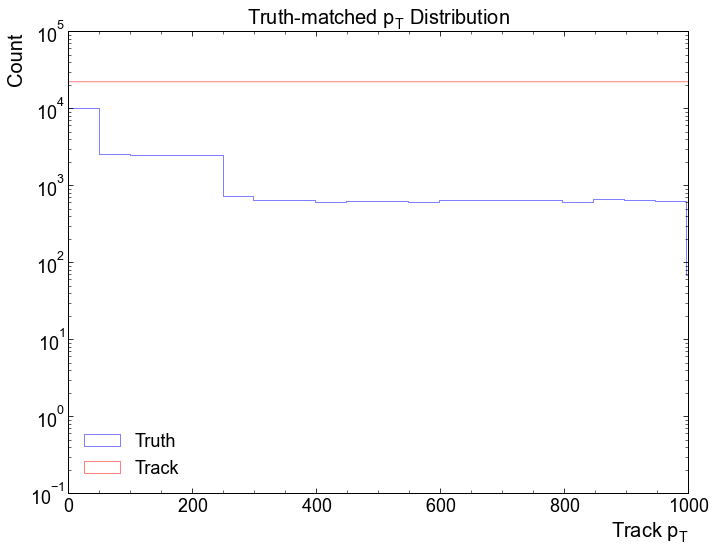

In [27]:
print(sorted(ak.flatten(LC_track_pt)[:1000]))
print(len(LC_track_pt))
plt.hist(ak.flatten(mcp_mu_pt), bins=100, color='blue', histtype = 'step', label = 'Truth')
plt.hist(ak.flatten(LC_track_pt)[:23572], bins = 10000, color = 'red', histtype = 'step', label = 'Track')
plt.xlim(0,1000)
#plt.ylim(0, 2700)
plt.yscale('log')
plt.xlabel('Track $p_T$', loc = 'right')
plt.ylabel('Count', loc = 'top')
plt.title('Truth-matched $p_T$ Distribution')
plt.legend()

### 10 TeV Paper Stuff

In [28]:
print((ak.flatten(bib_fake_chi2)/ak.flatten(bib_fake_ndf)))
print(np.max(ak.flatten(pt_all['LC_track_pt'])))
print(len(fake_chi2))
#total_track_pt = total_track_pt.tolist()
print(type(total_track_pt))
print(total_track_pt)
#random.shuffle(total_track_pt)
print(np.ravel(total_track_pt)[:2614])

print(len(ak.flatten(pt_all['LC_track_pt'])[ak.flatten(pt_all['LC_track_pt']) > 1000])/len(ak.flatten(pt_all['LC_track_pt'])))
print(len(ak.flatten(bib_fake_d0)))
print(len(ak.flatten(bib_d0)))


[2.81, 1.82, 0.0242, 0.783, 2.17, 0.651, ..., 1.33, 0.398, 1.89, 0.0132, 0.499]
756307.0307491155
635
<class 'awkward.highlevel.Array'>
[[43], [5.85], [36.6], [40], [44.4], ..., [433], [422], [969], [906], [963]]
[43, 5.85, 36.6, 40, 44.4, 30.5, 13.5, ..., 36.5, 15.5, 22.4, 37.4, 44.5, 47.4]
0.016428192898781134
4048341
2545


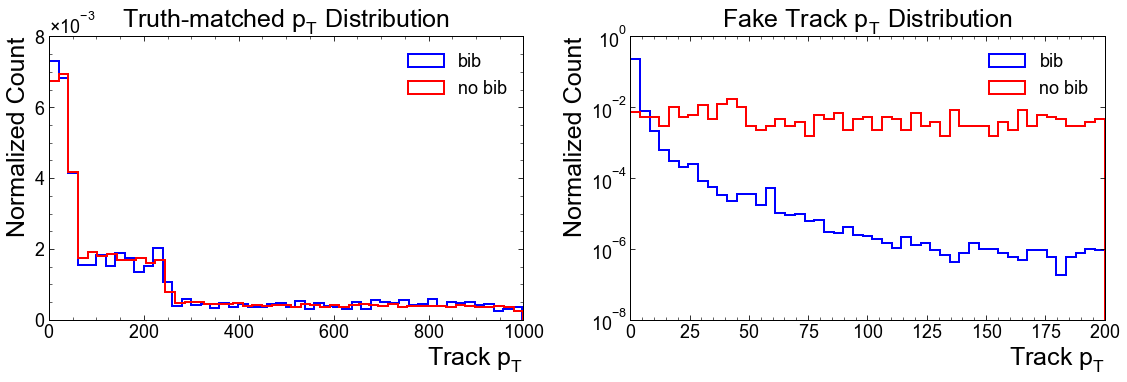

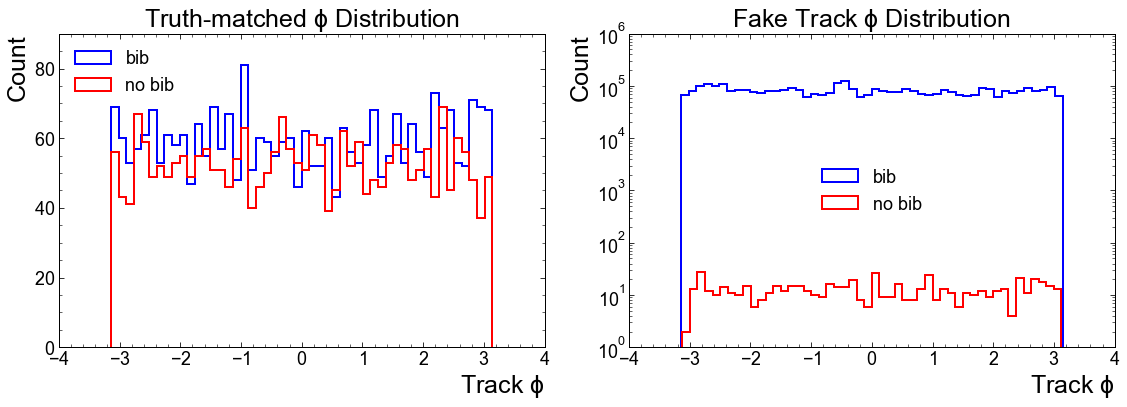

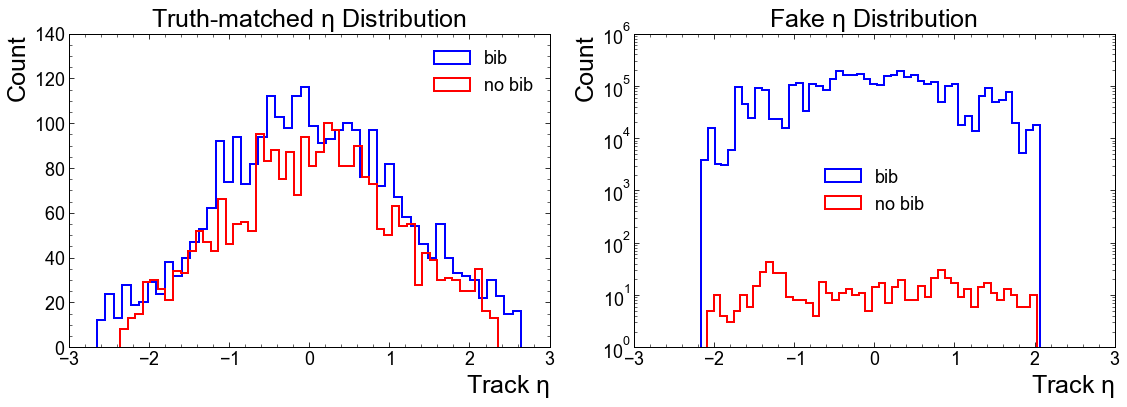

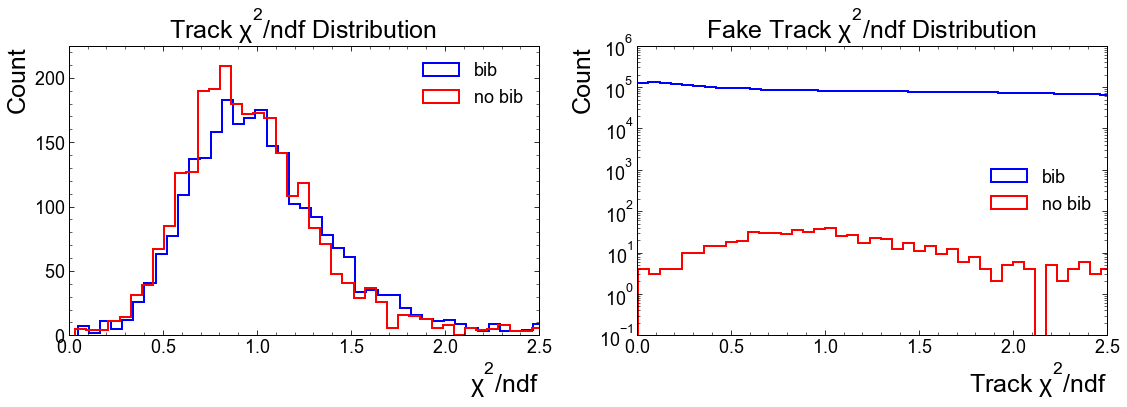

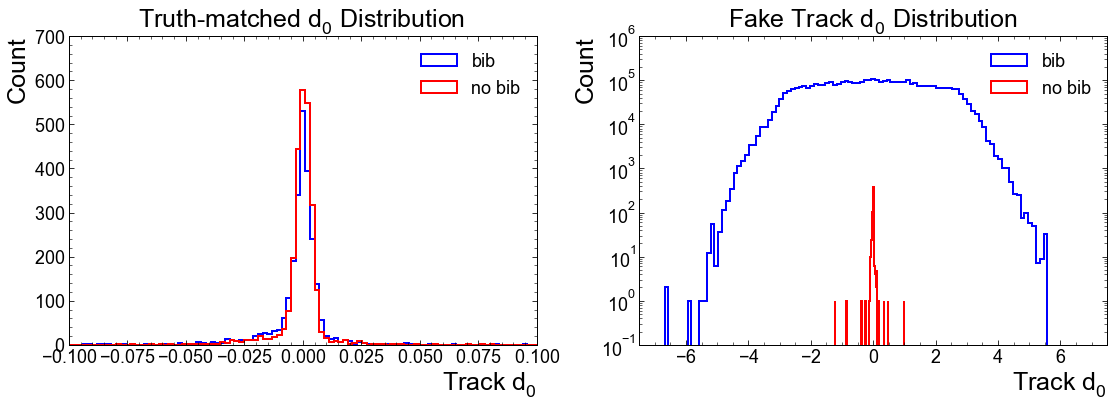

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [29]:
# Create histograms
plt.figure(figsize=(16, 6))

# Histogram for track pt
plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_track_pt), bins=50, density=True, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist(ak.flatten(pt_all['LC_track_pt'])[:], bins=np.linspace(0, 1000, 50), density=True, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlim(0, 1000)
plt.xlabel('Track $p_T$', fontsize = 25, loc = 'right')
plt.ylabel('Normalized Count', fontsize = 25, loc = 'top')
plt.title('Truth-matched $p_T$ Distribution', fontsize = 25)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ak.flatten(bib_fake_pt), bins=np.linspace(0, 200, 50), density=True, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist(ak.flatten(pt_all['fake_pt']), bins=np.linspace(0, 200, 50), density=True, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlim(0, 200)
plt.xlabel('Track $p_T$', fontsize = 25, loc = 'right')
plt.ylabel('Normalized Count', fontsize = 25, loc = 'top')
plt.yscale('log')
plt.title('Fake Track $p_T$ Distribution', fontsize = 25)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))

# Histogram for track phi
plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_truth_phi), bins=50, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist(ak.flatten(pt_all['LC_phi_match'])[:2614], bins=50, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlabel(r'Track $\phi$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.title(r'Truth-matched $\phi$ Distribution', fontsize = 25)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ak.flatten(bib_fake_phi), bins=50, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist(ak.flatten(pt_all['fake_phi']), bins=50, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlabel(r'Track $\phi$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.yscale('log')
plt.title(r'Fake Track $\phi$ Distribution ', fontsize = 25)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))

# Histogram for track eta
plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_truth_eta), bins=50, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist(ak.flatten(pt_all['LC_track_eta'])[:2614], bins=50, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlabel(r'Track $\eta$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.title(r'Truth-matched $\eta$ Distribution', fontsize = 25)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ak.flatten(bib_fake_eta), bins=50, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist(ak.flatten(pt_all['fake_eta']), bins=50, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlabel(r'Track $\eta$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.yscale('log')
plt.title(r'Fake $\eta$ Distribution ', fontsize = 25)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))

# Histogram for track ndf
plt.subplot(1, 2, 1)
plt.hist((bib_chi2) / (bib_ndf), bins=50, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist((pt_all['LC_chi2'])[:2614] / (pt_all['LC_ndf'])[:2614], bins=50, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlim(0, 2.5)
plt.xlabel(r'$\chi^2/ndf$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.title(r'Track $\chi^2/ndf$ Distribution ', fontsize = 25)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ak.flatten(bib_fake_chi2) / ak.flatten(bib_fake_ndf), bins=50, linewidth = 2, histtype='step', color='blue', label='bib')
plt.hist((ak.flatten(pt_all['fake_chi2'])) / ak.flatten(pt_all['fake_ndf']), bins=50, linewidth = 2, histtype='step', color='red', label='no bib')
plt.xlim(0, 2.5)
plt.xlabel(r'Track $\chi^2/ndf$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.yscale('log')
plt.title(r'Fake Track $\chi^2/ndf$ Distribution ', fontsize = 25)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))

# Histogram for track d0
plt.subplot(1, 2, 1)
plt.hist((bib_d0), bins=np.linspace(-0.1,0.1,100), linewidth = 2, histtype = 'step', color='blue', label = 'bib')
plt.hist(ak.flatten(pt_all['LC_d0'])[:2614], bins=np.linspace(-0.1,0.1,100), linewidth = 2, histtype = 'step', color='red', label = 'no bib')
plt.xlabel('Track $d_0$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.title(r'Truth-matched $d_0$ Distribution ', fontsize = 25)
plt.xlim(-0.1, 0.1)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ak.flatten(bib_fake_d0), bins=100, linewidth = 2, histtype = 'step', color='blue', label='bib')
plt.hist((ak.flatten(pt_all['fake_d0'])), bins=100, linewidth = 2, histtype='step', color='red', label='no bib')
#plt.xlim(-0.5,0.5)
plt.xlabel('Track $d_0$', fontsize = 25, loc = 'right')
plt.ylabel('Count', fontsize = 25, loc = 'top')
plt.yscale('log')
plt.title('Fake Track $d_0$ Distribution ', fontsize = 25)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))

# bin_range = (np.min(fake_nhits), np.max(pt_all['LC_nhits']))

# # Histogram for track d0
# plt.subplot(1, 2, 1)
# plt.hist((bib_nhits), bins=np.arange(bin_range[0] - 0.25, bin_range[1] + 1.5, 0.5), linewidth = 2, histtype = 'step', color='blue', label = 'bib',  align='mid')
# plt.hist(ak.flatten(pt_all['LC_nhits'])[:2614], bins=np.arange(bin_range[0] - 0.25, bin_range[1] + 1.5, 0.5), linewidth = 2, histtype = 'step', color='red', label = 'no bib',  align='mid')
# plt.xlabel('Track Nhits', fontsize = 25, loc = 'right')
# plt.ylabel('Count', fontsize = 25, loc = 'top')
# plt.ylim(0.9,1e3)
# plt.yscale('log')
# plt.title(r'Truth-matched Nhits Distribution ', fontsize = 25)
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.hist(ak.flatten(bib_fake_nhits), bins=np.arange(bin_range[0] - 0.25, bin_range[1] + 1.5, 0.5), linewidth = 2, histtype = 'step', color='blue', label='bib',  align='mid')
# plt.hist((ak.flatten(pt_all['fake_nhits'])), bins=np.arange(bin_range[0] - 0.25, bin_range[1] + 1.5, 0.5), linewidth = 2, histtype='step', color='red', label='no bib',  align='mid')
# #plt.xlim(-0.5,0.5)
# plt.xlabel('Track Nhits', fontsize = 25, loc = 'right')
# plt.ylabel('Count', fontsize = 25, loc = 'top')
# plt.yscale('log')
# plt.title('Fake Track Nhits Distribution ', fontsize = 25)
# plt.legend(fontsize = 15)

# plt.tight_layout()
# plt.show()

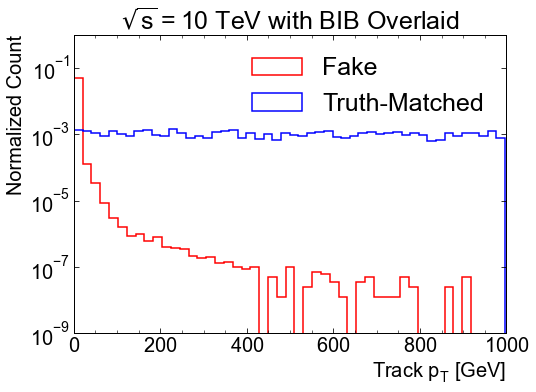

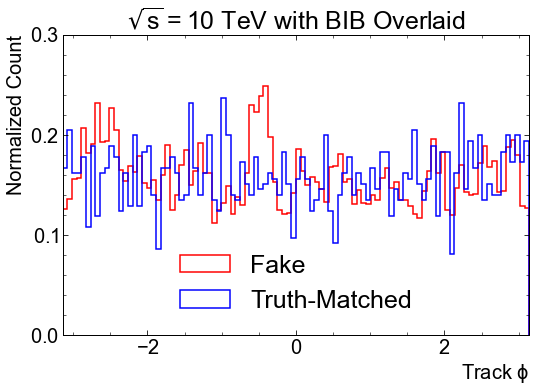

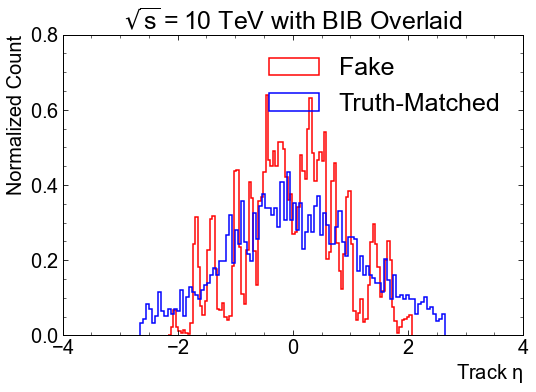

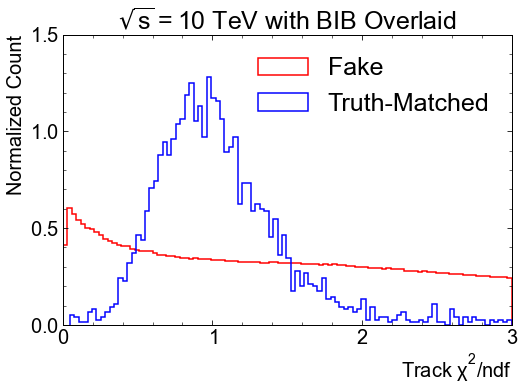

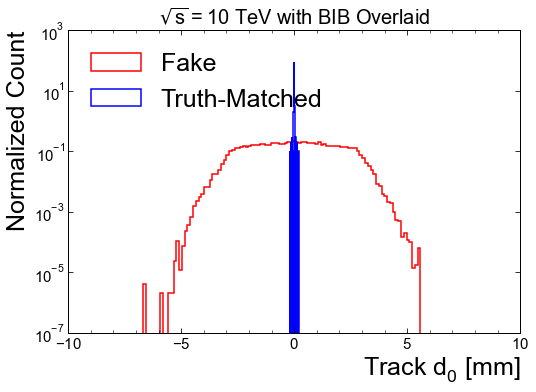

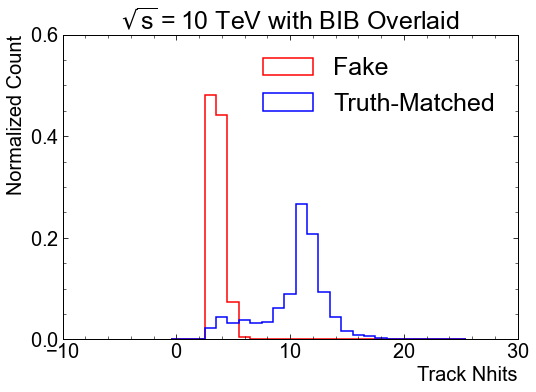

In [30]:
fontsize = 25
plt.rcParams['font.size'] = fontsize

# Create histograms
plt.figure(figsize=(8, 6))

# Histogram for track pt
# plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_fake_pt), bins=np.linspace(0,1000,50), linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
plt.hist((np.random.uniform(0, 1000, 1000)), bins=50, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched')
plt.xlim(0, 1000)
plt.xlabel('Track $p_T$ [GeV]', loc = 'right')
plt.ylabel('Normalized Count', loc = 'top')
plt.yscale('log')
plt.title(r'$\sqrt{s} = 10$ TeV with BIB Overlaid', fontsize = fontsize)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('bib_pt_dist.pdf')
plt.show()

# plt.figsize(8,6)

# # plt.subplot(1, 2, 2)
# plt.hist(ak.flatten(pt_all['LC_track_pt'])[:], bins=np.linspace(0, 1000, 50), linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched ')
# plt.hist(ak.flatten(pt_all['fake_pt']), bins=np.linspace(0, 1000, 50), linewidth = 1.5, histtype='step', density = True, color='red', label='Fake ')
# plt.xlim(0, 1000)
# plt.xlabel('Track $p_T$ [GeV]', loc = 'right')
# plt.ylabel('Normalized Count', loc = 'top')
# plt.yscale('linear')
# plt.title('Track $p_T$ Distribution - No BIB')
# plt.legend()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 6))

# Histogram for track phi
# plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_fake_phi), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
plt.hist(ak.flatten(bib_truth_phi), bins=100, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched')
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'Track $\phi$', loc = 'right')
plt.ylabel('Normalized Count', loc = 'top')
plt.yscale('linear')
plt.title(r'$\sqrt{s} = 10$ TeV with BIB Overlaid', fontsize = fontsize)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('bib_phi_dist.pdf')
plt.show()

# plt.figsize(8,6)

# # plt.subplot(1, 2, 2)
# plt.hist(ak.flatten(total_truth_phi)[:], bins=100, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched ')
# plt.hist(ak.flatten(pt_all['fake_phi']), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake ')
# plt.xlabel(r'Track $\phi$', loc = 'right')
# plt.ylabel('Normalized Count', loc = 'top')
# plt.yscale('linear')
# plt.title(r'Track $\phi$ Distribution - No BIB')
# plt.legend()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 6))

# Histogram for track eta
# plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_fake_eta), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
plt.hist(ak.flatten(bib_truth_eta), bins=100, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched')
plt.xlabel(r'Track $\eta$', loc = 'right')
plt.ylabel('Normalized Count', loc = 'top')
plt.yscale('linear')
plt.title(r'$\sqrt{s} = 10$ TeV with BIB Overlaid', fontsize = fontsize)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('bib_eta_dist.pdf')
plt.show()

# plt.figsize(8,6)

# # plt.subplot(1, 2, 2)
# plt.hist(ak.flatten(total_truth_eta)[:], bins=100, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched')
# plt.hist(ak.flatten(pt_all['fake_eta']), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
# plt.xlabel(r'Track $\eta$', loc = 'right')
# plt.ylabel('Normalized Count', loc = 'top')
# plt.yscale('linear')
# plt.title(r'Track $\eta$ Distribution - No BIB')
# plt.legend()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8,6))

# Histogram for track ndf
# plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_fake_chi2) / ak.flatten(bib_fake_ndf), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
plt.hist((bib_chi2) / (bib_ndf), bins=100, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched')
plt.xlim(0, 3)
plt.xlabel(r'Track $\chi^2/ndf$', loc = 'right')
plt.ylabel('Normalized Count', loc = 'top')
plt.yscale('linear')
plt.title(r'$\sqrt{s} = 10$ TeV with BIB Overlaid', fontsize = fontsize)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('bib_chi2_ndf_dist.pdf')
plt.show()

# plt.figsize(8,6)

# # plt.subplot(1, 2, 2)
# plt.hist((ak.flatten(pt_all['LC_chi2']))[:] / ak.flatten(pt_all['LC_ndf'])[:], bins=100, linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched')
# plt.hist((ak.flatten(pt_all['fake_chi2'])) / ak.flatten(pt_all['fake_ndf']), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
# plt.xlim(0, 3)
# #plt.ylim(0.1,1e6)
# plt.xlabel(r'$\chi^2/ndf$', loc = 'right')
# plt.ylabel('Normalized Count', loc = 'top')
# plt.yscale('linear')
# plt.title(r'Track $\chi^2/ndf$ Distribution - No BIB')
# plt.legend()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8,6))

plt.hist(ak.flatten(bib_fake_d0), bins=100, linewidth = 1.5, histtype = 'step', density = True, color='red', label='Fake')
plt.hist(ak.flatten(bib_d0), bins=np.linspace(-0.2,0.2,100), linewidth = 1.5, histtype = 'step', density = True, color='blue', label = 'Truth-Matched')
#plt.xlim(-0.5,0.5)
plt.xlabel(r'Track $d_0$ [mm]', loc = 'right', fontsize = 25)
plt.ylabel('Normalized Count', loc = 'top', fontsize = 25)
plt.yscale('log')
plt.title(r'$\sqrt{s} = 10$ TeV with BIB Overlaid')
plt.legend(loc='upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.savefig('bib_d0_dist.pdf')
plt.show()

# plt.figure(figsize=(8, 6))

# # plt.subplot(1, 2, 2)
# plt.hist(ak.flatten(pt_all['d0_res'])[:], bins=np.linspace(-0.1,0.1,100), linewidth = 1.5, histtype = 'step', density = True, color='blue', label = 'Truth-Matched')
# plt.hist((ak.flatten(pt_all['fake_d0'])), bins=100, linewidth = 1.5, histtype='step', density = True, color='red', label='Fake')
# plt.xlabel('Track $d_0$ [mm]', loc = 'right')
# plt.ylabel('Normalized Count', loc = 'top')
# plt.yscale('linear')
# #plt.xlim(-0.1, 0.1)
# plt.title('Track $d_0$ Distribution - No BIB')
# plt.legend()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 6))

bin_range = (0, 25)

# Histogram for track Nhits
# plt.subplot(1, 2, 1)
plt.hist(ak.flatten(bib_fake_nhits), bins=np.arange(bin_range[0] - 0.5, bin_range[1] + 1.5), linewidth = 1.5, histtype='step', density = True, color='red', label='Fake', align='mid')
plt.hist(ak.flatten(bib_nhits), bins=np.arange(bin_range[0] - 0.5, bin_range[1] + 1.5), linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched', align='mid')
plt.xlabel('Track Nhits', loc = 'right')
plt.ylabel('Normalized Count', loc = 'top')
plt.yscale('linear')
plt.title(r'$\sqrt{s} = 10$ TeV with BIB Overlaid', fontsize = fontsize)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('bib_nhits_dist.pdf')
plt.show()

# plt.figsize(8,6)

# # plt.subplot(1, 2, 2)
# plt.hist(ak.flatten(pt_all['LC_nhits'])[:], bins=np.arange(bin_range[0] - 0.5, bin_range[1] + 1.5), linewidth = 1.5, histtype='step', density = True, color='blue', label='Truth-Matched', align='mid')
# plt.hist(ak.flatten(pt_all['fake_nhits']), bins=np.arange(bin_range[0] - 0.5, bin_range[1] + 1.5), linewidth = 1.5, histtype='step', density = True, color='red', label='Fake', align='mid')
# plt.xlabel('Track Nhits', loc = 'right')
# plt.ylabel('Normalized Count', loc = 'top')
# plt.yscale('linear')
# plt.title('Track Nhits Distribution - No BIB')
# plt.legend()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
# plt.tight_layout()
# plt.show()


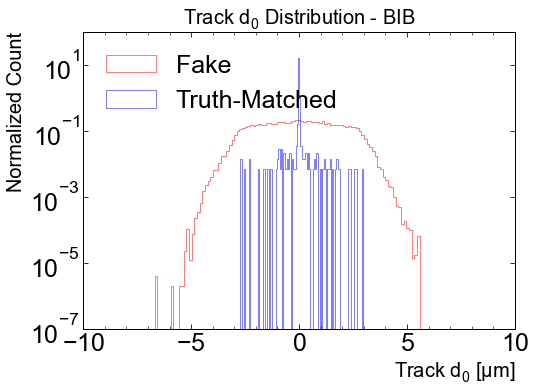

In [31]:
plt.figure(figsize=(8,6))

plt.hist(ak.flatten(bib_fake_d0), bins=100, histtype = 'step', density = True, color='red', label='Fake')
plt.hist(ak.flatten(bib_d0), bins=(100), histtype = 'step', density = True, color='blue', label = 'Truth-Matched')
#plt.xlim(-0.5,0.5)
plt.xlabel(r'Track $d_0$ [$\mu$m]', loc = 'right')
plt.ylabel('Normalized Count', loc = 'top')
plt.yscale('log')
plt.title(r'Track $d_0$ Distribution - BIB')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Cleaning Effectiveness

In [32]:
x = 1
print(len(ak.flatten(bib_fake_pt)[ak.flatten(bib_fake_pt)<x])/len(ak.flatten(bib_fake_pt)))
print(len(ak.flatten(bib_track_pt)[ak.flatten(bib_track_pt)<x])/len(ak.flatten(bib_track_pt)))
y = 0.1
print(len(ak.flatten(bib_fake_d0)[np.abs(ak.flatten(bib_fake_d0))>y])/len(ak.flatten(bib_fake_d0)))
print(len(ak.flatten(bib_d0)[np.abs(ak.flatten(bib_d0))>y])/len(ak.flatten(bib_d0)))
z = 5
print(len(ak.flatten(bib_fake_nhits)[np.abs(ak.flatten(bib_fake_nhits))<z])/len(ak.flatten(bib_fake_nhits)))
print(len(ak.flatten(bib_nhits)[np.abs(ak.flatten(bib_nhits))<z])/len(ak.flatten(bib_nhits)))
print("% of fakes that survive cleaning:", len(ak.flatten(bib_fake_nhits)[(np.abs(ak.flatten(bib_fake_nhits))>=z) & (np.abs(ak.flatten(bib_fake_d0))<=y) & (ak.flatten(bib_fake_pt)>=x)])/len(ak.flatten(bib_fake_nhits)))
print("Efficiency of (BIB) matched-tracks w/o cleaning:", len(ak.flatten(bib_track_pt))/len(ak.flatten(bib_truth_pt)))
print("Efficiency of (BIB) matched-tracks w/ cleaning:", len(ak.flatten(bib_track_pt)[(np.abs(ak.flatten(bib_nhits))>=z) & (np.abs(ak.flatten(bib_d0))<=y) & (ak.flatten(bib_track_pt)>=x)])/len(ak.flatten(bib_truth_pt)))

0.5725441606821164
0.00275049115913556
0.9574191008119128
0.034970530451866405
0.9225858197222022
0.06483300589390963
% of fakes that survive cleaning: 0.00035817140897962893
Efficiency of (BIB) matched-tracks w/o cleaning: 0.8609607577807848
Efficiency of (BIB) matched-tracks w/ cleaning: 0.7966847090663058


1 paragraph: Show basic track distributions, for tracks matched to truth collision particles and tracks which are not matched (combinatoric fakes). eg. pT, eta, and number of hits on track, $\chi^2/n_{\mathrm{dof}}$. 

1 paragraph: Use above figures to motivate basic track cleaning requirements. Show reconstruction efficiency, for all tracks, and efficiency after cleaning. Show efficiency as a function of pT (for barrel only? or for different eta ranges?) and theta (for different pT slices?), 

1 paragraph : Then show basic tracking resolutions, in particular
pT and d0. Mention qualitative impact on flavor tagging.

Without BIB, there is much less noise in the detector and so the reconstruction algorithms have an easier time reconstructing tracks. BIB also leads to many fake tracks being reconstructed, however, these fake tracks are almost all (92$\%$) $<3$ GeV $p_T$, almost all (96$\%$) $>0.1$mm $d_0$, and almost all (92$\%$) $<5$ nhits, which serves as motivation to make a 3 GeV $p_T$ cut, a $0.1$mm $d_0$ cut, and a 5 nhits cut moving forwards, as we only lose $6.4\%$ truth-matched data in total, losing $5.6\%$ reconstruction efficiency total. 

### Nhits Studies

<Figure size 432x288 with 0 Axes>

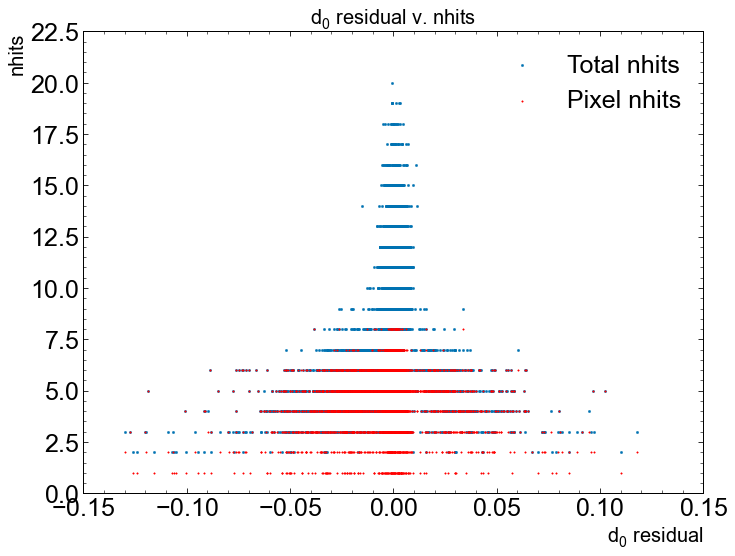

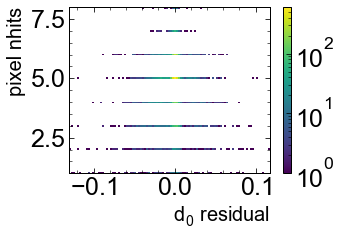

In [33]:
plt.figure(figsize=(6,4))
plt.subplots(1,1)
plt.scatter(pt_250_1000['d0_res_match'], pt_250_1000['nhits'],label = 'Total nhits', s=5)
plt.scatter(pt_250_1000['d0_res_match'], pt_250_1000['pixel_nhits'],label = 'Pixel nhits', c = 'red', s=2)
#plt.xlim(50,250)
#plt.ylim(50,250)
plt.xlabel("$d_0$ residual", loc = 'right')
plt.ylabel("nhits", loc = 'top')
plt.title("$d_0$ residual v. nhits")
plt.legend()
plt.show()

plot2DHistogram(pt_250_1000['d0_res_match'], pt_250_1000['pixel_nhits'], bins=(100,100), label=r"; $d_0$ residual;pixel nhits")


<Figure size 432x288 with 0 Axes>

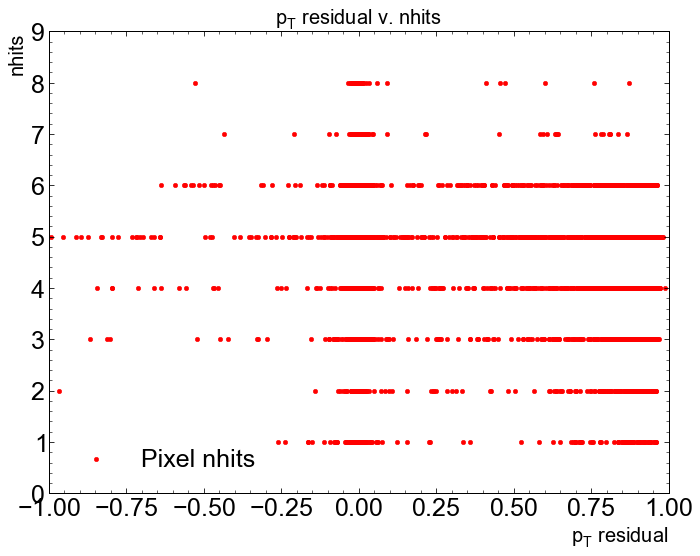

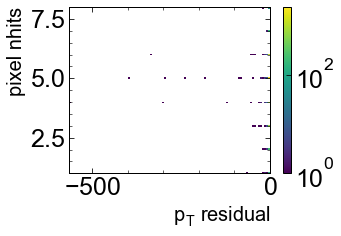

In [34]:
plt.figure(figsize=(6,4))
plt.subplots(1,1)
#plt.scatter(pt_250_1000['pt_res'], pt_250_1000['nhits'],label = 'Total nhits', s=50)
plt.scatter(pt_250_1000['pt_res'], pt_250_1000['pixel_nhits'],label = 'Pixel nhits', c = 'red', s=20)
plt.xlim(-1,1)
#plt.ylim(50,250)
plt.title("$p_T$ residual v. nhits")
plt.xlabel("$p_T$ residual", loc = 'right')
plt.ylabel("nhits", loc = 'top')
plt.legend()
plt.show()

plot2DHistogram(pt_250_1000['pt_res'][np.abs(np.ravel(pt_250_1000['pt_res'])) < 1000], pt_250_1000['pixel_nhits'][np.abs(np.ravel(pt_250_1000['pt_res'])) < 1000], bins=(100,100), label=r"; $p_T$ residual;pixel nhits")

<Figure size 432x288 with 0 Axes>

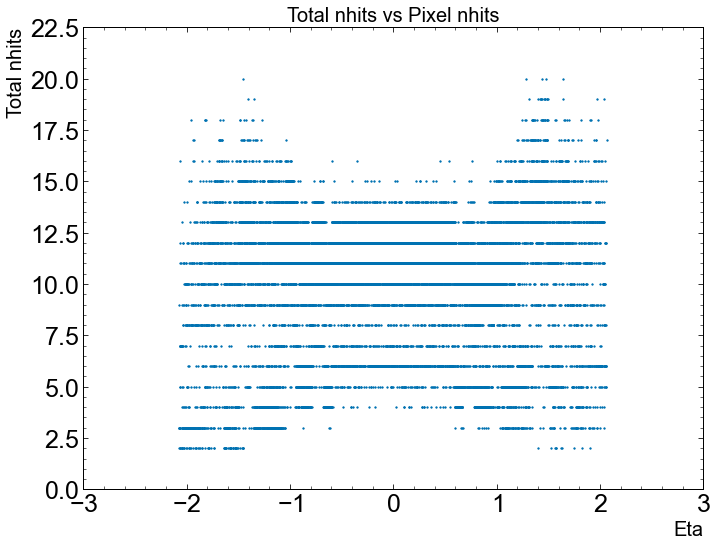

In [35]:
plt.figure(figsize=(6,4))
plt.subplots(1,1)
plt.scatter(np.ravel(total_track_eta), np.ravel(total_nhits), s=3)
#plt.xlim(0,1000)
#plt.ylim(0,1000)
plt.title("Total nhits vs Pixel nhits")
plt.ylabel("Total nhits", loc = 'top')
plt.xlabel("Eta", loc = 'right')
plt.show()

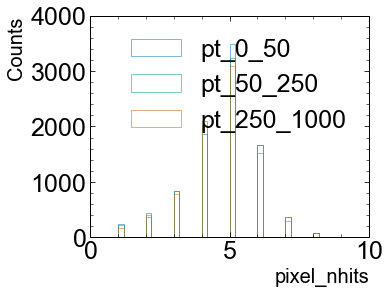

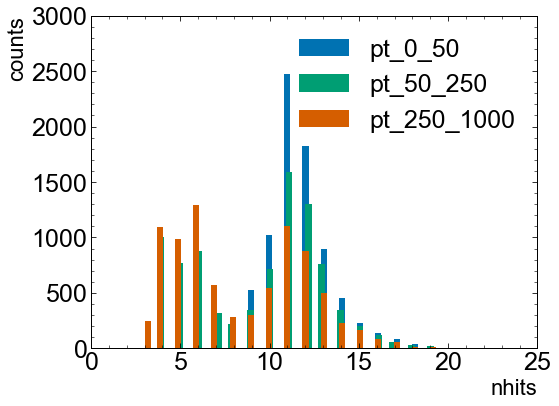

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


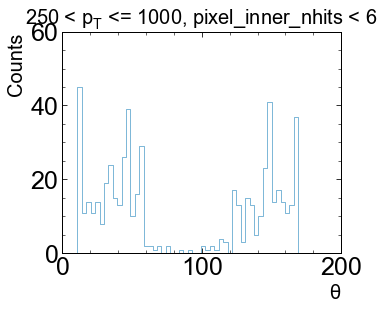

In [36]:
compare1DHistograms([np.ravel(merged['LC_pixel_nhits'][np.ravel(merged['LC_pt_match']) <= 50]),
                    np.ravel(merged['LC_pixel_nhits'][(np.ravel(merged['LC_pt_match']) > 50) & (np.ravel(merged['LC_pt_match']) <= 250)]),
                    np.ravel(merged['LC_pixel_nhits'][np.ravel(merged['LC_pt_match'] > 250)])],
                   bins=40, label=";pixel_nhits;Counts",
                   leg=["pt_0_50", "pt_50_250", "pt_250_1000"])
plt.figure(figsize=(8,6))
plt.hist(np.ravel(merged['LC_nhits'][np.ravel(merged['LC_pt_match']) <= 50]), bins = 50, label = "pt_0_50")
plt.hist(np.ravel(merged['LC_nhits'][(np.ravel(merged['LC_pt_match']) > 50) & (merged['LC_pt_match'] <= 250)]), bins = 50, label = "pt_50_250")
plt.hist(np.ravel(merged['LC_nhits'][np.ravel(merged['LC_pt_match'] > 250)]), bins = 50, label = "pt_250_1000")
#plt.hist(np.ravel(merged['fake_nhits']), bins = 50, label = "Fake")
plt.legend()
plt.xlabel("nhits", fontsize = 22, loc = 'right')
plt.ylabel("counts", fontsize = 22, loc = 'top')
plt.show()

compare1DHistograms([np.ravel(LC_theta_match[np.ravel(LC_pt_match > 250) & np.ravel(LC_nhits < 6)])],
                   bins=50, label=r"250 < $p_T$ <= 1000, pixel_inner_nhits < 6 ;$\theta$;Counts",)


#plot2DHistogram(total_track_eta, total_pixel_inner_nhits, bins=(100,100), label=r"pixel pixel_inner_nhits v. $\eta$; $\eta$;pixel_inner_nhits")



29913
29913


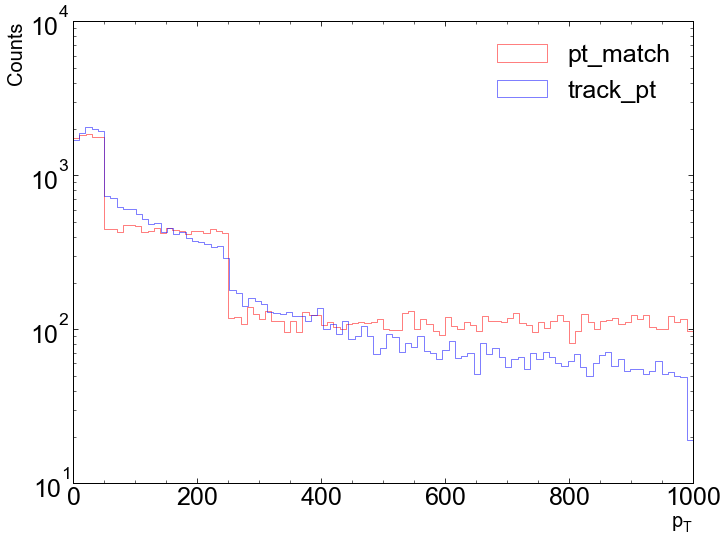

In [37]:
print(len(LC_pt_match))
print(len(LC_track_pt))

plt.hist(merged['LC_pt_match'], bins = 100, label = 'pt_match', color = 'red', histtype = 'step')
plt.hist(merged['LC_track_pt'], bins = np.linspace(0,1000,100), label = 'track_pt', color = 'blue', histtype = 'step')
plt.xlim(0,1000)
plt.xlabel(r"$p_T$", loc = 'right')
plt.ylabel("Counts", loc = 'top')
#plt.title("LCRelations $\Delta$ R")
plt.yscale('log')
plt.legend()

### Efficiency Studies

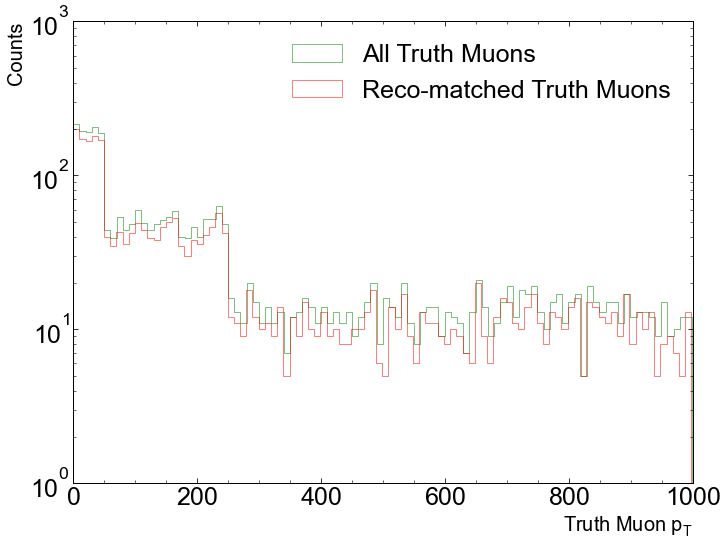

In [38]:
plt.figure()

plt.hist(np.ravel(bib_truth_pt), bins=100, color='green', label = 'All Truth Muons', histtype = 'step')
plt.hist((np.ravel(bib_track_pt)), bins=100, color='red', label = 'Reco-matched Truth Muons', alpha = 1, histtype = 'step')
plt.yscale('log')
plt.xlim(0,1000)
#plt.ylim(1,1000)
#plt.title(r'$p_T$ Residual for pt_250_1000 data with no quality cut')
plt.ylabel('Counts', loc = 'top')
plt.xlabel(r'Truth Muon $p_T$', loc = 'right')
plt.legend(loc = 'upper right')
plt.show()

2956
2545
1569
32


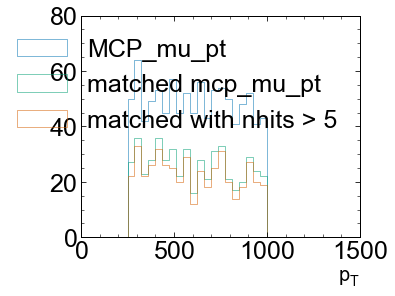

In [39]:
print(len(bib_truth_pt))#[np.ravel(bib_pt_res)<100000]))
print(len(bib_track_pt[np.ravel(bib_pt_res)<1]))
print(len(bib_track_pt[np.ravel(bib_pt_res)<0.001]))

print(len([True for x in np.ravel(bib_250_1000['nhits']) if x < 5]))
compare1DHistograms([bib_250_1000['mcp_mu_pt'], bib_250_1000['pt_match'],bib_250_1000['pt_match'][np.ravel(bib_250_1000['nhits'])>5]], bins = 20, label = ";$p_T$;", leg = ["MCP_mu_pt","matched mcp_mu_pt","matched with nhits > 5"])

In [40]:
print("% of bib_250_1000; 50_250; 0_50 w/ nhits")
for i in range(2,15):
    print("<", i, ":", len([True for x in np.ravel(bib_250_1000['nhits']) if x < i])*100/len(bib_250_1000['nhits']), ";", len([True for x in np.ravel(bib_50_250['nhits']) if x < i])*100/len(bib_50_250['nhits']), ";", len([True for x in np.ravel(bib_0_50['nhits']) if x < i])*100/len(bib_0_50['nhits']), "%")


% of bib_250_1000; 50_250; 0_50 w/ nhits
< 2 : 0.0 ; 0.0 ; 0.0 %
< 3 : 0.0 ; 0.0 ; 0.0 %
< 4 : 0.7604562737642585 ; 0.7067137809187279 ; 0.34305317324185247 %
< 5 : 6.083650190114068 ; 3.0035335689045937 ; 1.0291595197255574 %
< 6 : 11.977186311787072 ; 6.890459363957597 ; 1.8867924528301887 %
< 7 : 19.20152091254753 ; 10.070671378091873 ; 2.229845626072041 %
< 8 : 24.524714828897338 ; 12.897526501766784 ; 2.9159519725557463 %
< 9 : 27.566539923954373 ; 14.487632508833922 ; 6.861063464837049 %
< 10 : 33.07984790874525 ; 19.964664310954063 ; 12.864493996569468 %
< 11 : 40.874524714828894 ; 28.79858657243816 ; 24.528301886792452 %
< 12 : 67.30038022813689 ; 62.19081272084806 ; 58.490566037735846 %
< 13 : 88.02281368821293 ; 84.09893992932862 ; 81.81818181818181 %
< 14 : 94.48669201520913 ; 91.87279151943463 ; 91.59519725557462 %


In [41]:
print("% of noBIB_250_1000; 50_250; 0_50 w/ nhits")
for i in range(2,15):
    print("<", i, ":", len([True for x in np.ravel(pt_250_1000['nhits']) if x < i])*100/len(pt_250_1000['nhits']), ";", len([True for x in np.ravel(pt_50_250['nhits']) if x < i])*100/len(pt_50_250['nhits']), ";", len([True for x in np.ravel(pt_0_50['nhits']) if x < i])*100/len(pt_0_50['nhits']), "%")


% of noBIB_250_1000; 50_250; 0_50 w/ nhits
< 2 : 0.0 ; 0.0 ; 0.0 %
< 3 : 0.6620146716765074 ; 0.5825908156271419 ; 0.11796427367711493 %
< 4 : 4.061549472177491 ; 3.050034270047978 ; 0.6740815638692281 %
< 5 : 10.395419574163535 ; 8.156271418779987 ; 2.0222446916076846 %
< 6 : 17.58811952048667 ; 12.799862919808088 ; 3.016514998314796 %
< 7 : 27.088924673465737 ; 17.20356408498972 ; 3.8928210313447926 %
< 8 : 31.758811952048667 ; 19.002741603838246 ; 4.937647455342097 %
< 9 : 34.585793522991594 ; 21.213159698423578 ; 7.735085945399393 %
< 10 : 40.025049203793166 ; 26.49074708704592 ; 13.667003707448602 %
< 11 : 47.68294864913222 ; 35.31528444139822 ; 25.244354566902594 %
< 12 : 70.63875469672571 ; 63.69088416723783 ; 58.32490731378497 %
< 13 : 87.88692073716228 ; 83.68745716244003 ; 80.72126727334008 %
< 14 : 94.52495974235104 ; 92.7004797806717 ; 91.70879676440849 %


In [42]:
def plot_efficiency(track_data, truth_data, num_bins=50, min_value=None, max_value=None, nhits_min=0, xlabel=None, title=None, ylim=None, bib = False, nhits_label = False):# **kwargs):
    # num_bins = kwargs.get('num_bins', 50)
    # min_value = kwargs.get('min_value', min(flat_track_data))
    # max_value = kwargs.get('max_value', max(flat_track_data))
    # nhits_min = kwargs.get('nhits_min', 5)
    # xlabel = kwargs.get('xlabel', None)
    # title = kwargs.get('title', None)
    # ylim = kwargs.get('ylim', None)
    flat_track_data = np.ravel(track_data)
    flat_truth_data = np.ravel(truth_data)
    nhits = merged['LC_nhits'][::1]
    if bib:
        nhits = bib_nhits
    
    if isinstance(nhits_min, (int, float)):
        nhits_min = [nhits_min]  # Convert a single value to a list

    if min_value is None:
        min_value = np.min(flat_truth_data)

    if max_value is None:
        max_value = np.max(flat_truth_data)

    plt.figure(figsize=(8, 6))
    efficiency_bins = np.linspace(min_value, max_value, num_bins)

    alpha = 1.0
    size = 7
    for nhit in nhits_min:
        bin_width = efficiency_bins[1] - efficiency_bins[0]
        efficiencies = []
        errors = []
        bin_centers = []
        for i in range(len(efficiency_bins) - 1):
            bin_min = efficiency_bins[i]
            bin_max = efficiency_bins[i + 1]
            track_data_in_bin = flat_track_data[(flat_track_data >= bin_min) & (flat_track_data < bin_max) & (np.ravel(nhits) > nhit)]
            truth_data_in_bin = flat_truth_data[(flat_truth_data >= bin_min) & (flat_truth_data < bin_max)]
            if len(track_data_in_bin) != 0:
                efficiency = len(track_data_in_bin) / len(truth_data_in_bin)
                error = efficiency * np.sqrt((1 - efficiency) / len(track_data_in_bin))
            else:
                efficiency = 0
                error = 0
            efficiencies.append(efficiency)
            errors.append(error)
            bin_centers.append((bin_min + bin_max) / 2)
        bin_centers = (efficiency_bins[:-1] + efficiency_bins[1:]) / 2
        if nhits_label:
            label = f'Min nhits = {nhit}'
        else:
            label = None
        plt.errorbar(bin_centers, efficiencies, yerr=errors, xerr=bin_width/2, fmt='o', label=label, markersize=size, alpha = alpha)
        size -= 2
        alpha -= 0.2

    plt.xlim(min_value, max_value)
    plt.ylim(0,1)
    if ylim is not None:
        plt.ylim(ylim)
    if xlabel is not None:
        plt.xlabel(xlabel, loc = 'right')
    if bib:
        plt.ylabel('Reconstruction Efficiency (w/ BIB)', loc = 'top')    
    else:
        plt.ylabel('Reconstruction Efficiency', loc = 'top')
    if title is not None:
        plt.title(title)
    if nhits_label:
        plt.legend(loc = 'lower left')
    plt.show()

In [43]:
def compare_efficiency(track_data_list, truth_data_list, nhits_list, num_bins=20, min_value=None, max_value=None, nhits_min=0, xlabel=None, title=None, ylim=None, bib=False, nhits_label=False, labels="", savepdf = False, savename = ''):
    if isinstance(nhits_min, (int, float)):
        nhits_min = [nhits_min]

    if min_value is None:
        min_value = np.min([np.min(np.ravel(truth_data)) for truth_data in truth_data_list])

    if max_value is None:
        max_value = np.max([np.max(np.ravel(truth_data)) for truth_data in truth_data_list])

    plt.figure(figsize=(8, 6))
    efficiency_bins = np.linspace(min_value, max_value, num_bins+1)

    alpha = 1.0
    size = 10

    for nhit in zip(nhits_min):
        bin_width = efficiency_bins[1] - efficiency_bins[0]
        for i, (track_data, truth_data, nhits) in enumerate(zip(track_data_list, truth_data_list, nhits_list)):
            efficiencies = []
            errors = []
            bin_centers = []
            for j in range(len(efficiency_bins) - 1):
                bin_min = efficiency_bins[j]
                bin_max = efficiency_bins[j + 1]
                track_data_in_bin = np.ravel(track_data)[(np.ravel(track_data) >= bin_min) & (np.ravel(track_data) < bin_max) & (np.ravel(nhits) > nhit)]
                truth_data_in_bin = np.ravel(truth_data)[(np.ravel(truth_data) >= bin_min) & (np.ravel(truth_data) < bin_max)]
                if len(track_data_in_bin) != 0:
                    efficiency = len(track_data_in_bin) / len(truth_data_in_bin)
                    error = efficiency * np.sqrt((1 - efficiency) / len(track_data_in_bin))
                else:
                    efficiency = 0
                    error = 0
                efficiencies.append(efficiency)
                errors.append(error)
                bin_centers.append((bin_min + bin_max) / 2)
            bin_centers = (efficiency_bins[:-1] + efficiency_bins[1:]) / 2
            label = labels[i]
            if bib:
                b_lab = 'w/ BIB'
                label = label + b_lab
            if nhits_label:
                n_lab = f', min nhits = {nhit}'
                label = label + n_lab
            plt.errorbar(bin_centers, efficiencies, yerr=errors, xerr=bin_width/2, fmt='o', label=label, markersize=size, alpha=alpha)
            size -= 2
        alpha -= 0.2

    plt.xlim(min_value, max_value)
    plt.ylim(0, 1)
    if ylim is not None:
        plt.ylim(ylim)
    if xlabel is not None:
        plt.xlabel(xlabel, loc='right', fontsize = 25)
    plt.legend(loc='lower left', fontsize = 20)
    plt.ylabel('Reconstruction Efficiency', loc='top', fontsize = 25)
    if title is not None:
        plt.title(title, fontsize = 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if savepdf:
        plt.savefig(savename, format='pdf')
        
    plt.show()


In [44]:
print(len(LC_pt_match[np.ravel(LC_nhits) > 9])/len(mcp_mu_pt) - len(LC_pt_match[np.ravel(LC_nhits) > 0])/len(mcp_mu_pt))

total_truth_pt_b = total_truth_pt[np.abs((np.ravel(total_truth_eta))) <= 0.5]
total_track_pt_b = total_track_pt[np.abs((np.ravel(total_track_eta))) <= 0.5]
pt_b_nhits = total_nhits[np.abs((np.ravel(total_track_eta))) <= 0.5]

total_truth_pt_e = total_truth_pt[np.abs((np.ravel(total_truth_eta))) > 0.5]
total_track_pt_e = total_track_pt[np.abs((np.ravel(total_track_eta))) > 0.5]
pt_e_nhits = total_nhits[np.abs((np.ravel(total_track_eta))) > 0.5]

print(np.min(bib_track_theta))

-0.16297529125592103
14.475116366980062


Cell for checking the unmatched MCPs and making sure every matched track has an MCP

In [45]:
value_indices_dict = {tuple(value): [] for value in set(map(tuple, LC_pt_match))}

for j, value_j in enumerate(mcp_mu_pt):
    key_j = tuple(value_j)
    if key_j in value_indices_dict:
        value_indices_dict[key_j].append(j)

matching_indices = [(i, j) for i, value_i in enumerate(map(tuple, LC_pt_match)) for j in value_indices_dict.get(value_i, [])]

# Set of all indices in mcp_mu_pt
all_indices_mcp_mu_pt = set(range(len(mcp_mu_pt)))

# List of indices in mcp_mu_pt with no corresponding value in LC_pt_match
unmatched_mcp = list(all_indices_mcp_mu_pt - {j for i, j in matching_indices})
unmatched_LC = list(set(range(len(LC_pt_match))) - {i for i, j in matching_indices})

print(matching_indices)
print(sorted(unmatched_mcp))

unmatched_values_mcp = [tuple(mcp_mu_pt[j]) for j in unmatched_mcp]
unmatched_values_LC = [tuple(LC_pt_match[i]) for i in unmatched_LC]

# Find common values in unmatched indices
common_unmatched_values = set(map(tuple, unmatched_values_mcp)) & set(unmatched_values_LC)
print(common_unmatched_values)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 44), (43, 45), (44, 46), (45, 47), (46, 48), (47, 49), (48, 50), (49, 51), (50, 52), (51, 53), (52, 54), (53, 55), (54, 56), (55, 58), (56, 59), (57, 60), (58, 61), (59, 62), (60, 63), (61, 64), (62, 65), (63, 66), (64, 67), (65, 68), (66, 69), (67, 70), (68, 71), (69, 72), (70, 73), (71, 74), (72, 75), (73, 76), (74, 77), (75, 78), (76, 79), (77, 80), (78, 81), (79, 82), (80, 83), (81, 85), (82, 86), (83, 87), (84, 88), (85, 89), (86, 90), (87, 91), (88, 92), (89, 93), (90, 94), (91, 95), (92, 96), (93, 97), (94, 98), (95, 100), (96, 101), (97, 102), (98, 103), (99, 104), (100, 105), (

In [46]:
print("Fraction of tracks w/ dr>0.005:", len(LC_dr[np.abs(np.ravel(LC_dr))>0.005])/len(LC_dr))
print(np.max(LC_track_eta))
print(LC_eta_match)
print(mcp_mu_eta)
print(len(mcp_mu_theta))
print(len(LC_track_theta))

Fraction of tracks w/ dr>0.005: 0.0007020359041219537
2.3763632274520647
[[1.84], [-0.507], [-1.27], [0.483], ..., [-0.898], [1.57], [-0.229], [1]]
[[1.84], [-0.507], [-1.27], [0.483], ..., [1.57], [-0.229], [1], [-2.38]]
31244
29913


### No BIB (See below for BIB)

19107 10806 29913 19204 12040 31244
Overall efficiency: 0.9573998207655869
Barrel Efficiency: 0.994948968964799
Endcap Efficiency: 0.8975083056478406
Lost Efficiency after cleaning: 0.01613109717065675


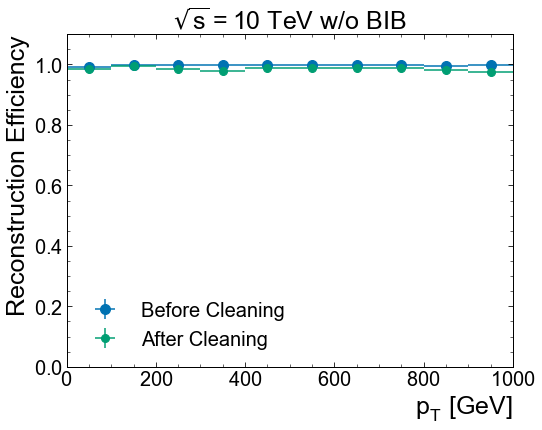

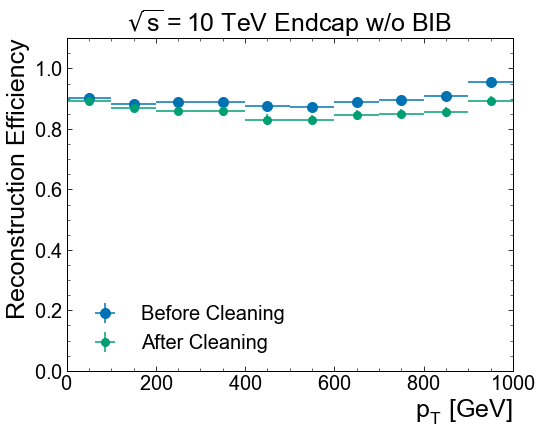

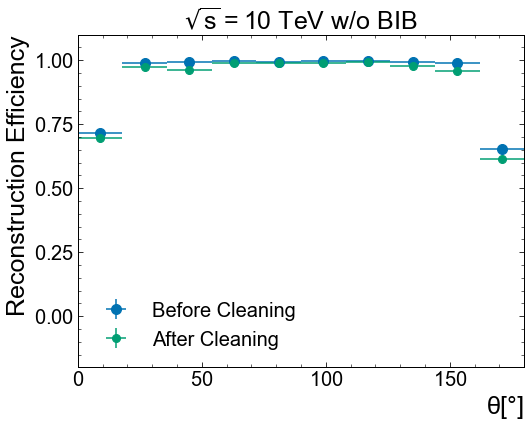

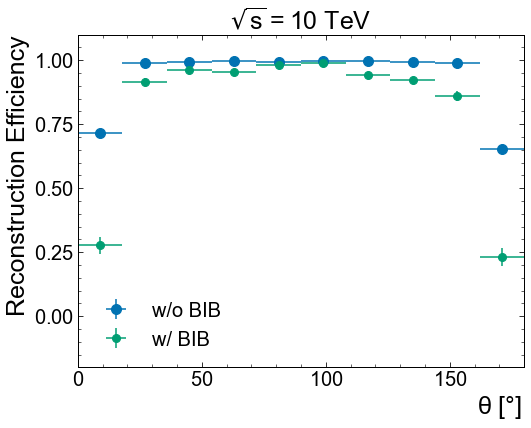

In [47]:
track_clean = (ak.flatten(LC_track_pt)>=1) & (ak.flatten(LC_d0)<= 0.1) & (ak.flatten(LC_nhits)>4)
transition_region = 1
track_barrel = (np.abs(ak.flatten(LC_eta_match))<transition_region)
truth_barrel = (np.abs(ak.flatten(mcp_mu_eta))<transition_region)
track_endcap = (np.abs(ak.flatten(LC_eta_match))>=transition_region)
truth_endcap = (np.abs(ak.flatten(mcp_mu_eta))>=transition_region)
print(len((LC_pt_match[track_barrel])), len((LC_pt_match[track_endcap])), len(LC_pt_match), len(mcp_mu_pt[truth_barrel]), len((mcp_mu_pt[truth_endcap])), len(mcp_mu_pt))
print("Overall efficiency:", len((LC_pt_match))/len((mcp_mu_pt)))
print("Barrel Efficiency:", len((LC_pt_match[track_barrel]))/len((mcp_mu_pt[truth_barrel])))
print("Endcap Efficiency:", len((LC_pt_match[track_endcap]))/len((mcp_mu_pt[truth_endcap])))
print("Lost Efficiency after cleaning:", len((LC_pt_match))/len((mcp_mu_pt)) - len((LC_pt_match)[track_clean])/len((mcp_mu_pt)))
compare_efficiency([LC_pt_match[track_barrel],LC_pt_match[track_clean & track_barrel]], [mcp_mu_pt [truth_barrel],mcp_mu_pt[truth_barrel]], [LC_nhits[track_barrel], LC_nhits[track_clean & track_barrel]],num_bins=10, min_value=0, max_value=1000, nhits_min=[0], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"], title = r'$\sqrt{s} = 10$ TeV w/o BIB', savepdf = True, savename = 'eff_vs_pt_barrel.pdf')
compare_efficiency([LC_pt_match[track_endcap],LC_pt_match[track_clean & track_endcap]], [mcp_mu_pt [truth_endcap],mcp_mu_pt[truth_endcap]], [LC_nhits[track_endcap], LC_nhits[track_clean & track_endcap]],num_bins=10, min_value=0, max_value=1000, nhits_min=[0], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"], title = r'$\sqrt{s} = 10$ TeV Endcap w/o BIB', savepdf = True, savename = 'eff_vs_pt_endcap.pdf')
#compare_efficiency([ak.concatenate((LC_pt_match,fake_pt), axis = 0),(ak.concatenate((LC_pt_match,fake_pt), axis = 0))[(ak.concatenate((LC_pt_match,fake_pt), axis = 0)>2) & (ak.concatenate((d0,fake_d0), axis = 0)<= 0.1) & (ak.concatenate((nhits,fake_nhits), axis = 0)>4)]], [mcp_mu_pt,mcp_mu_pt], [ak.concatenate((nhits,fake_nhits), axis = 0), ak.concatenate((nhits,fake_nhits), axis = 0)[(ak.concatenate((LC_pt_match,fake_pt), axis = 0)>2) & (ak.concatenate((d0,fake_d0), axis = 0)<= 0.1) & (ak.concatenate((nhits,fake_nhits), axis = 0)>4)]],num_bins=10, min_value=0, max_value=1000, nhits_min=[0], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"])
compare_efficiency([LC_track_theta,LC_track_theta[track_clean]], [mcp_mu_theta,mcp_mu_theta], [LC_nhits, LC_nhits[track_clean]],num_bins=10, min_value=0, max_value=180, nhits_min=[0], xlabel=r'$\theta [\degree]$', bib = False, nhits_label = False, ylim = (-0.2,1.1), labels = ["Before Cleaning", "After Cleaning"], title = r'$\sqrt{s} = 10$ TeV w/o BIB', savepdf = True, savename = 'eff_vs_theta.pdf')
compare_efficiency([LC_track_theta,bib_track_theta], [mcp_mu_theta,bib_truth_theta], [LC_nhits, bib_nhits],num_bins=10, min_value=0, max_value=180, nhits_min=[0], xlabel=r'$\theta$ [$\degree$] ', bib = False, nhits_label = False, ylim = (-0.2,1.1), labels = ["w/o BIB", "w/ BIB"], title = r'$\sqrt{s} = 10$ TeV')

### BIB 

1715 830 2545 1780 1176 2956
Total bib efficiency: 0.8609607577807848
Barrel efficiency: 0.9634831460674157
Endcap efficiency: 0.70578231292517
Efficiency lost from cleaning: 0.06123139377537212


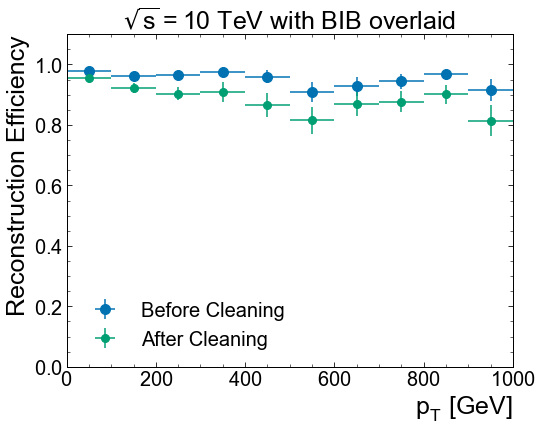

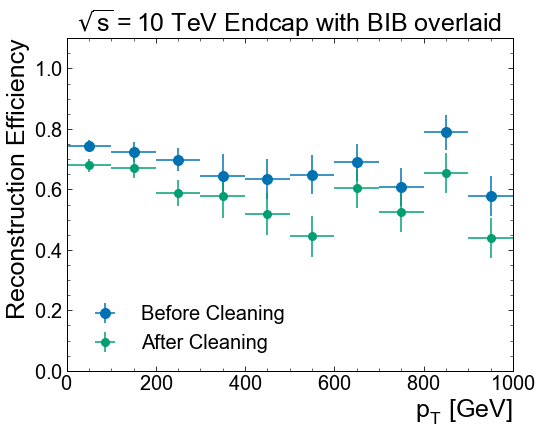

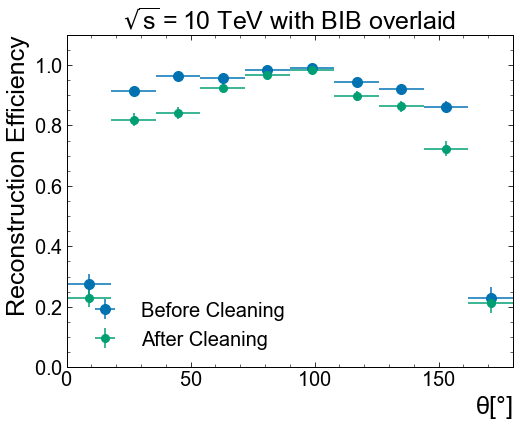

In [48]:
bib_track_clean = (ak.flatten(bib_track_pt)>=1) & (ak.flatten(bib_d0)<= 0.1) & (ak.flatten(bib_nhits)>4)
transition_region = 1
bib_track_barrel = (np.abs(ak.flatten(bib_track_eta))<transition_region)
bib_truth_barrel = (np.abs(ak.flatten(bib_truth_eta))<transition_region)
bib_track_endcap = (np.abs(ak.flatten(bib_track_eta))>=transition_region)
bib_truth_endcap = (np.abs(ak.flatten(bib_truth_eta))>=transition_region)
print(len(bib_track_pt[bib_track_barrel]), len(bib_track_pt[bib_track_endcap]), len(bib_track_pt), len(bib_truth_pt[bib_truth_barrel]), len(bib_truth_pt[bib_truth_endcap]), len(bib_truth_pt))
print("Total bib efficiency:", len((bib_track_pt))/len((bib_truth_pt)))
print("Barrel efficiency:", len((bib_track_pt[bib_track_barrel]))/len((bib_truth_pt[bib_truth_barrel])))
print("Endcap efficiency:", len((bib_track_pt[bib_track_endcap]))/len((bib_truth_pt[bib_truth_endcap])))
print("Efficiency lost from cleaning:", len((bib_track_pt))/len((bib_truth_pt)) - len((bib_track_pt)[bib_track_clean])/len((bib_truth_pt)))
compare_efficiency([bib_track_pt[bib_track_barrel],bib_track_pt[bib_track_clean & bib_track_barrel]], [bib_truth_pt [bib_truth_barrel],bib_truth_pt[bib_truth_barrel]], [bib_nhits[bib_track_barrel], bib_nhits[bib_track_clean & bib_track_barrel]],num_bins=10, min_value=0, max_value=1000, nhits_min=[0], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"], title = r'$\sqrt{s} = 10$ TeV with BIB overlaid', savepdf = True, savename = 'bib_eff_vs_pt_barrel.pdf')
compare_efficiency([bib_track_pt[bib_track_endcap],bib_track_pt[bib_track_clean & bib_track_endcap]], [bib_truth_pt [bib_truth_endcap],bib_truth_pt[bib_truth_endcap]], [bib_nhits[bib_track_endcap], bib_nhits[bib_track_clean & bib_track_endcap]],num_bins=10, min_value=0, max_value=1000, nhits_min=[0], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"], title = r'$\sqrt{s} = 10$ TeV Endcap with BIB overlaid', savepdf = True, savename = 'bib_eff_vs_pt_endcap.pdf')
#compare_efficiency([ak.concatenate((bib_track_pt,bib_fake_pt), axis = 0),(ak.concatenate((bib_track_pt,bib_fake_pt), axis = 0))[(ak.concatenate((bib_track_pt,bib_fake_pt), axis = 0)>2) & (ak.concatenate((bib_d0,bib_fake_d0), axis = 0)<= 0.1) & (ak.concatenate((bib_nhits,bib_fake_nhits), axis = 0)>4)]], [bib_truth_pt,bib_truth_pt], [ak.concatenate((bib_nhits,bib_fake_nhits), axis = 0), ak.concatenate((bib_nhits,bib_fake_nhits), axis = 0)[(ak.concatenate((bib_track_pt,bib_fake_pt), axis = 0)>2) & (ak.concatenate((bib_d0,bib_fake_d0), axis = 0)<= 0.1) & (ak.concatenate((bib_nhits,bib_fake_nhits), axis = 0)>4)]],num_bins=10, min_value=0, max_value=1000, nhits_min=[0], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"])
compare_efficiency([bib_track_theta,bib_track_theta[bib_track_clean]], [bib_truth_theta,bib_truth_theta], [bib_nhits, bib_nhits[bib_track_clean]],num_bins=10, min_value=0, max_value=180, nhits_min=[0], xlabel=r'$\theta [\degree]$', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["Before Cleaning", "After Cleaning"], title = r'$\sqrt{s} = 10$ TeV with BIB overlaid', savepdf = True, savename = 'bib_eff_vs_theta.pdf')

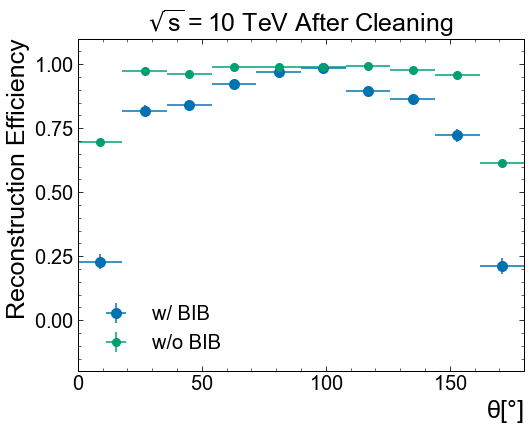

In [49]:
compare_efficiency([bib_track_theta[bib_track_clean],LC_track_theta[track_clean]], [bib_truth_theta,mcp_mu_theta], [bib_nhits[bib_track_clean], LC_nhits[track_clean]],num_bins=10, min_value=0, max_value=180, nhits_min=[0], xlabel=r'$\theta [\degree]$', bib = False, nhits_label = False, ylim = (-0.2,1.1), labels = ["w/ BIB", "w/o BIB"], title = r'$\sqrt{s} = 10$ TeV After Cleaning')


Reconstruction efficiency in the Barrel region ($|\eta| < 1$) is much higher than in the Endcap region (96.3$\%$ - 70.5$\%$ for BIB, and 99.6$\%$ - 89.7$\%$ for non-BIB) as expected due to the granularity and coverage of the tracker, which is optimized for the barrel region - The barrel region is closer to the beam line and has a more symmetric and uniform magnetic field, which facilitates the measurement of particle trajectories and momenta, while the endcap region has a more complex geometry and a less uniform magnetic field. There is also lots more material for particles to pass through in the endcaps (cabling and such), and so scattering and absorption can occur. 

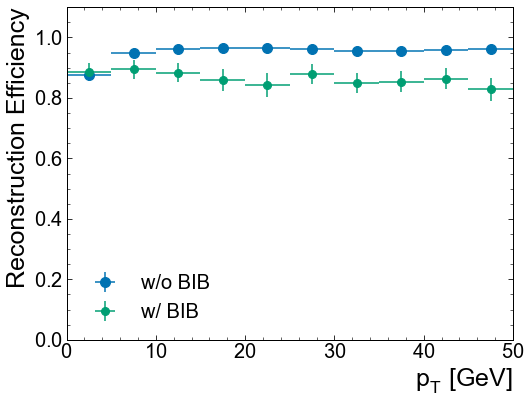

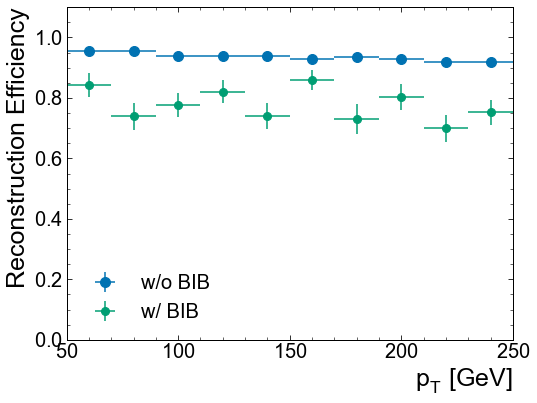

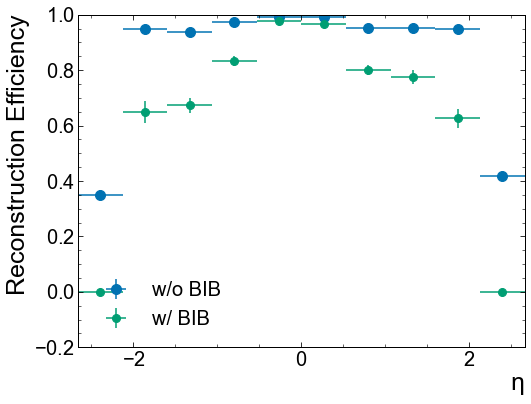

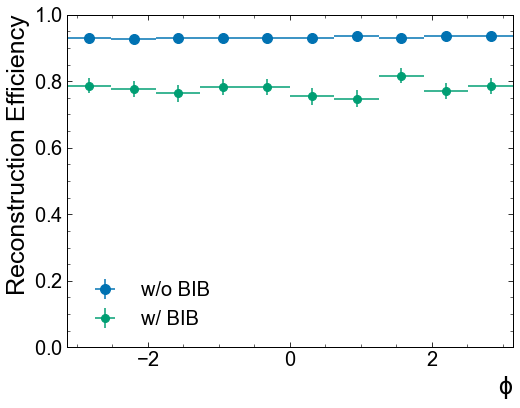

In [50]:
compare_efficiency([LC_pt_match,bib_track_pt], [mcp_mu_pt,bib_truth_pt], [LC_nhits, bib_nhits],num_bins=10, min_value=0, max_value=50, nhits_min=[5], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["w/o BIB", "w/ BIB"])
compare_efficiency([LC_pt_match,bib_track_pt], [mcp_mu_pt,bib_truth_pt], [LC_nhits, bib_nhits],num_bins=10, min_value=50, max_value=250, nhits_min=[5], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (-0,1.1), labels = ["w/o BIB", "w/ BIB"])
compare_efficiency([LC_eta_match,bib_track_eta], [mcp_mu_eta,bib_truth_eta], [LC_nhits, bib_nhits],num_bins=10, min_value=None, max_value=None, nhits_min=[5], xlabel=r'$\eta$', ylim = (-0.2,1), labels = ["w/o BIB", "w/ BIB"])#[r"|$\eta$| > 0.5", r"|$\eta$| < 0.5"])
compare_efficiency([LC_phi_match,bib_track_phi], [mcp_mu_phi,bib_truth_phi], [LC_nhits, bib_nhits],num_bins=10, min_value=None, max_value=None, nhits_min=[5], xlabel=r'$\phi$', ylim = (-0,1), labels = ["w/o BIB", "w/ BIB"])#[r"|$\eta$| > 0.5", r"|$\eta$| < 0.5"])
# plot_efficiency(bib_track_pt, bib_truth_pt, num_bins=10, min_value=None, max_value=None, nhits_min=[5,10], xlabel=r'$p_T$', bib = True, nhits_label=True, ylim = (0,1))
# plot_efficiency(LC_pt_match[::1], mcp_mu_pt[::1],num_bins=20, min_value=None, max_value=None, nhits_min=[5], xlabel=r'$p_T$ [GeV]', bib = False, nhits_label = False, ylim = (0,1), title = "")
# plot_efficiency(bib_track_eta[::1], bib_truth_eta[::1],num_bins=20, min_value=None, max_value=None, nhits_min=[5], xlabel=r'$\eta$', bib = True, nhits_label = False, ylim = (-0.2,1), title = "")
# plot_efficiency(bib_track_phi[::1], bib_truth_phi[::1],num_bins=20, min_value=None, max_value=None, nhits_min=[5], xlabel=r'$\phi$', bib = True, nhits_label = False, ylim = (-0.2,1), title = "")

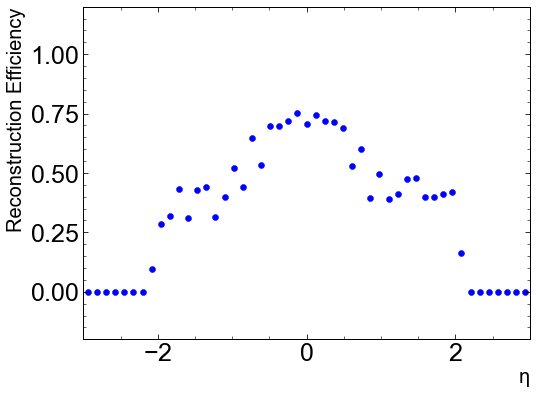

In [51]:
num_bins = 50
nhits_min = 5

min_eta = -3
max_eta = 3
efficiency_eta_bins = np.linspace(min_eta, max_eta, num_bins)

#write a test for the code in this cell?
# Calculate the efficiency for each pT bin.
efficiencies = []
truth_sum = 0
track_sum = 0
for i in range(len(efficiency_eta_bins) - 1):
    bin_min = efficiency_eta_bins[i]
    bin_max = efficiency_eta_bins[i + 1]
    #print("Eta range:", bin_min, bin_max)
    truth_generated_in_bin = np.ravel(total_truth_eta)[(np.ravel(total_truth_eta) >= bin_min) & (np.ravel(total_truth_eta) < bin_max)]
    #print((truth_generated_in_bin))
    truth_matched_in_bin = np.ravel(total_track_eta)[(np.ravel(total_track_eta) >= bin_min) & (np.ravel(total_track_eta) < bin_max) & (np.ravel(total_nhits) > nhits_min)] #& (np.ravel(total_pixel_nhits) > 3)]
    #print((truth_matched_in_bin))
    if len(truth_generated_in_bin) != 0:
        efficiency = len(truth_matched_in_bin) / len(truth_generated_in_bin)
    else:
        efficiency = 0
    #print(efficiency)
    efficiencies.append(efficiency)
    truth_sum += len(truth_generated_in_bin)
    track_sum += len(truth_matched_in_bin)
#print(truth_sum,track_sum)

# Convert the pT bin centers to a numpy array for plotting.
eta_bin_centers = (efficiency_eta_bins[:-1] + efficiency_eta_bins[1:]) / 2

# Create a scatter plot for the efficiency as a function of pT.
plt.figure(figsize=(8, 6))
plt.scatter(eta_bin_centers, efficiencies, marker='o', c='b')
plt.xlim(min_eta,max_eta)
plt.ylim(-0.2,1.2)
plt.xlabel(r'$\eta$', loc = 'right')
plt.ylabel('Reconstruction Efficiency', loc = 'top')
#plt.legend(loc='upper right')
plt.show()

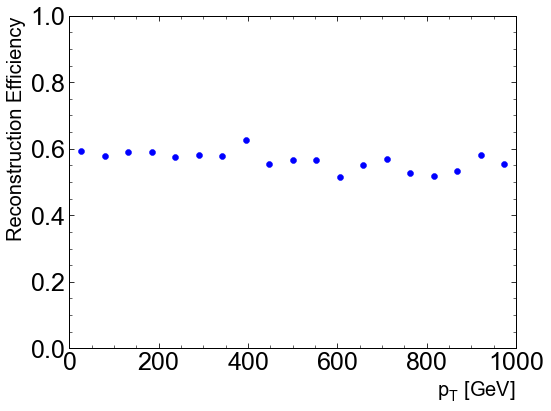

In [52]:
change_numbins = True
if change_numbins:
    num_bins = 20
    nhits_min = 0
min_pT = 0
max_pT = 1000
efficiency_pT_bins = np.linspace(min_pT, max_pT, num_bins)  # Define appropriate values for min_pT, max_pT, and num_bins.

efficiencies = []
truth_sum = 0
track_sum = 0
for i in range(len(efficiency_pT_bins) - 1):
    bin_min = efficiency_pT_bins[i]
    bin_max = efficiency_pT_bins[i + 1]
    truth_generated_in_bin = np.ravel(ak.concatenate([pt_0_50['mcp_mu_pt'], pt_50_250['mcp_mu_pt'], pt_250_1000['mcp_mu_pt']], axis=0))[(np.ravel(ak.concatenate([pt_0_50['mcp_mu_pt'], pt_50_250['mcp_mu_pt'], pt_250_1000['mcp_mu_pt']], axis=0)) >= bin_min) & (np.ravel(ak.concatenate([pt_0_50['mcp_mu_pt'], pt_50_250['mcp_mu_pt'], pt_250_1000['mcp_mu_pt']], axis=0)) < bin_max)]
    #print(len(truth_generated_in_bin))
    truth_matched_in_bin = np.ravel(ak.concatenate([pt_0_50['pt_match'], pt_50_250['pt_match'], pt_250_1000['pt_match']], axis=0))[(np.ravel(ak.concatenate([pt_0_50['pt_match'], pt_50_250['pt_match'], pt_250_1000['pt_match']], axis=0)) >= bin_min) & (np.ravel(ak.concatenate([pt_0_50['pt_match'], pt_50_250['pt_match'], pt_250_1000['pt_match']], axis=0)) < bin_max) & (np.ravel(ak.concatenate([pt_0_50['nhits'], pt_50_250['nhits'], pt_250_1000['nhits']], axis=0)) > nhits_min)]
    #print(len(truth_matched_in_bin))
    if len(truth_generated_in_bin) != 0:
        efficiency = len(truth_matched_in_bin) / len(truth_generated_in_bin)
    #print(efficiency)
    efficiencies.append(efficiency)
    truth_sum += len(truth_generated_in_bin)
    track_sum += len(truth_matched_in_bin)
#print(truth_sum,track_sum)

# Convert the pT bin centers to a numpy array for plotting.
pT_bin_centers = (efficiency_pT_bins[:-1] + efficiency_pT_bins[1:]) / 2

# Create a scatter plot for the efficiency as a function of pT.
plt.figure(figsize=(8, 6))
plt.scatter(pT_bin_centers, efficiencies, marker='o', c='b')
plt.xlim(min_pT,max_pT)
plt.ylim(0,1)
plt.xlabel(r'$p_T$ [GeV]', loc = 'right')
plt.ylabel('Reconstruction Efficiency', loc = 'top')
#plt.title('ak.concatenate([pt_0_50['pt_match'], pt_50_250['pt_match'], pt_250_1000['pt_match']], axis=0)')
#plt.legend(loc='upper right')
plt.show()

-3.141592653589793 -2.8108986900540254
[-3.07, -2.98, -3.06, -3.05, -2.86, ..., -3.13, -2.82, -3.03, -2.99, -2.93]
[-3.06, -2.86, -2.86, -3.02, -3.06, ..., -2.83, -2.82, -2.94, -2.88, -2.99]
0.5899814471243042
-2.8108986900540254 -2.4802047265182576
[-2.72, -2.79, -2.65, -2.56, -2.59, -2.64, ..., -2.6, -2.5, -2.52, -2.55, -2.55]
[-2.72, -2.79, -2.65, -2.79, -2.66, ..., -2.74, -2.71, -2.67, -2.52, -2.55]
0.5616966580976864
-2.4802047265182576 -2.14951076298249
[-2.47, -2.46, -2.39, -2.47, -2.43, ..., -2.37, -2.38, -2.34, -2.36, -2.38]
[-2.47, -2.46, -2.39, -2.43, -2.4, ..., -2.22, -2.21, -2.37, -2.34, -2.38]
0.5772151898734177
-2.14951076298249 -1.8188167994467224
[-2.08, -1.98, -1.96, -1.86, -2, -2.07, ..., -1.91, -1.97, -1.86, -2.11, -1.89]
[-2.08, -1.98, -2, -2.07, -2.12, -1.92, ..., -1.83, -1.84, -1.96, -1.91, -2.11]
0.5855018587360595
-1.8188167994467224 -1.4881228359109546
[-1.8, -1.64, -1.61, -1.72, -1.78, -1.66, ..., -1.49, -1.54, -1.7, -1.67, -1.51]
[-1.61, -1.72, -1.66, -1.6, 

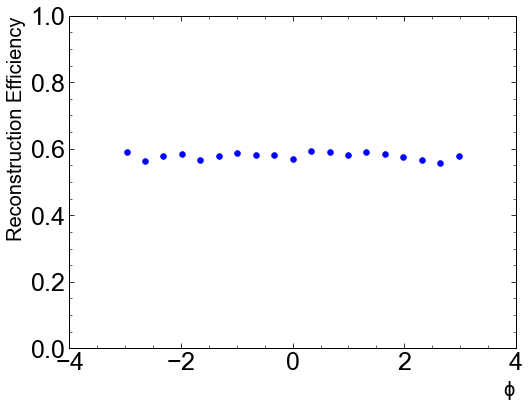

In [53]:
min_phi = -np.pi
max_phi = np.pi
efficiency_phi_bins = np.linspace(min_phi, max_phi, num_bins)

#write a test for the code in this cell?
# Calculate the efficiency for each pT bin.
efficiencies = []
truth_sum = 0
track_sum = 0
for i in range(len(efficiency_phi_bins) - 1):
    bin_min = efficiency_phi_bins[i]
    bin_max = efficiency_phi_bins[i + 1]
    print(bin_min, bin_max)
    truth_generated_in_bin = np.ravel(total_truth_phi)[(np.ravel(total_truth_phi) >= bin_min) & (np.ravel(total_truth_phi) < bin_max)]
    print((truth_generated_in_bin))
    truth_matched_in_bin = np.ravel(total_track_phi)[(np.ravel(total_track_phi) >= bin_min) & (np.ravel(total_track_phi) < bin_max) & (np.ravel(total_nhits) > nhits_min)]
    print((truth_matched_in_bin))
    if len(truth_generated_in_bin) != 0:
        efficiency = len(truth_matched_in_bin) / len(truth_generated_in_bin)
    print(efficiency)
    efficiencies.append(efficiency)
    truth_sum += len(truth_generated_in_bin)
    track_sum += len(truth_matched_in_bin)
print(truth_sum, track_sum)

# Convert the phi bin centers to a numpy array for plotting.
phi_bin_centers = (efficiency_phi_bins[:-1] + efficiency_phi_bins[1:]) / 2

# Create a scatter plot for the efficiency as a function of phi.
plt.figure(figsize=(8, 6))
plt.scatter(phi_bin_centers, efficiencies, marker='o', c='b')
#plt.xlim(-np, 4)
plt.ylim(0, 1)
plt.xlabel(r'$\phi$', loc = 'right')
plt.ylabel('Reconstruction Efficiency', loc = 'top')
#plt.legend(loc='upper right')
plt.show()

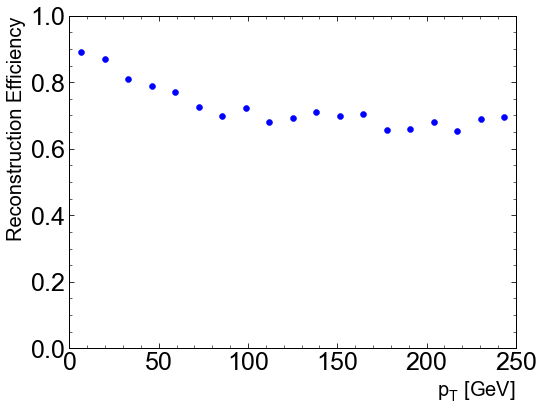

In [54]:
# Calculate the efficiency for each pT bin.
min_pT = 0
max_pT = 250
efficiency_pT_bins = np.linspace(min_pT, max_pT, num_bins)  # Define appropriate values for min_pT, max_pT, and num_bins.

efficiencies = []
truth_sum = 0
track_sum = 0
for i in range(len(efficiency_pT_bins) - 1):
    bin_min = efficiency_pT_bins[i]
    bin_max = efficiency_pT_bins[i + 1]
    truth_generated_in_bin = np.ravel(merged['mcp_mu_pt'])[(np.ravel(merged['mcp_mu_pt']) >= bin_min) & (np.ravel(merged['mcp_mu_pt']) < bin_max)]
    #print((truth_generated_in_bin))
    truth_matched_in_bin = np.ravel(merged['LC_pt_match'])[(np.ravel(merged['LC_pt_match']) >= bin_min) & (np.ravel(merged['LC_pt_match']) < bin_max) & (np.ravel(merged['LC_nhits']) > 5) & (np.ravel(merged['LC_pixel_nhits']) > 0)]
    #print(len(truth_matched_in_bin))
    if len(truth_generated_in_bin) != 0:
        efficiency = len(truth_matched_in_bin) / len(truth_generated_in_bin)
    #print(efficiency)
    efficiencies.append(efficiency)
    truth_sum += len(truth_generated_in_bin)
    track_sum += len(truth_matched_in_bin)
#print(truth_sum,track_sum)

# Convert the pT bin centers to a numpy array for plotting.
pT_bin_centers = (efficiency_pT_bins[:-1] + efficiency_pT_bins[1:]) / 2

# Create a scatter plot for the efficiency as a function of pT.
plt.figure(figsize=(8, 6))
plt.scatter(pT_bin_centers, efficiencies, marker='o', c='b')
plt.xlim(min_pT,max_pT)
plt.ylim(0,1)
plt.xlabel(r'$p_T$ [GeV]', loc = 'right')
plt.ylabel('Reconstruction Efficiency', loc = 'top')
#plt.title(r'$0 < p_T < 50$')
#plt.legend(loc='upper right')
plt.show()

### Fake Rate Studies

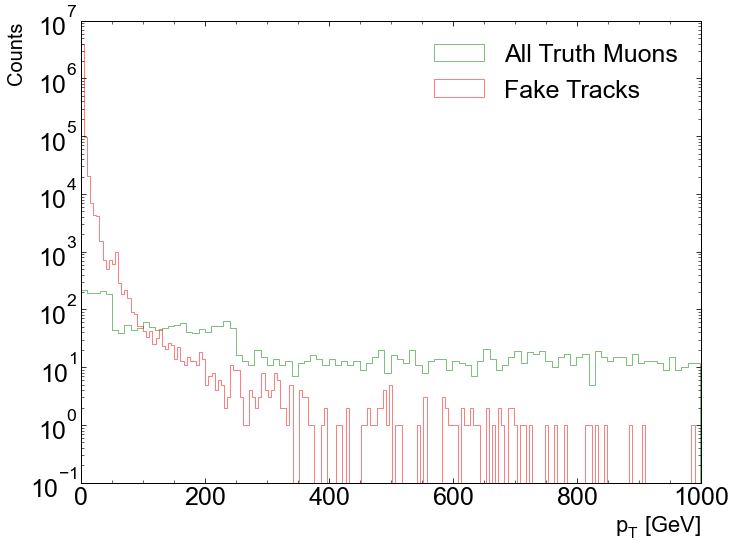

In [55]:
bib_fake_pt = np.concatenate([bib_0_50['fake_pt'], bib_50_250['fake_pt'], bib_250_1000['fake_pt']], axis = 0)
bib_fake_eta = np.concatenate([bib_0_50['fake_eta'], bib_50_250['fake_eta'], bib_250_1000['fake_eta']], axis = 0)
bib_fake_phi = np.concatenate([bib_0_50['fake_phi'], bib_50_250['fake_phi'], bib_250_1000['fake_phi']], axis = 0)
bib_fake_nhits = np.concatenate([bib_0_50['fake_nhits'], bib_50_250['fake_nhits'], bib_250_1000['fake_nhits']], axis = 0)

plt.figure()
plt.hist(np.ravel(bib_truth_pt), bins=100, color='green', label = 'All Truth Muons', histtype = 'step')
plt.hist((np.ravel(bib_fake_pt)), bins=np.linspace(0,1000,200), color='red', label = 'Fake Tracks', alpha = 1, histtype='step')
plt.yscale('log')
plt.xlim(0,1000)
#plt.ylim(1,1000)
#plt.title(r'$p_T$ Residual for pt_250_1000 data with no quality cut')
plt.ylabel('Counts', loc = 'top')
plt.xlabel(r'$p_T$ [GeV]', fontsize = 22, loc = 'right')
plt.legend(loc = 'upper right')
plt.show()

In [56]:
def plot_track_fraction(track_data, num_bins=20, min_value=None, max_value=None, xlabel=None, title=None, ylim=None):
    flat_track_data = np.ravel(track_data)
    print(flat_track_data)
   
    if min_value is None:
        min_value = np.min(flat_track_data)

    if max_value is None:
        max_value = np.max(flat_track_data)

    plt.figure(figsize=(8, 6))
    track_fraction_bins = np.linspace(min_value, max_value, num_bins)

    bin_width = track_fraction_bins[1] - track_fraction_bins[0]
    track_fractions = []
    errors = []
    for i in range(len(track_fraction_bins) - 1):
        bin_min = track_fraction_bins[i]
        bin_max = track_fraction_bins[i + 1]
        track_data_in_bin = flat_track_data[(flat_track_data >= bin_min) & (flat_track_data < bin_max)]
        #print(track_data_in_bin)
        #print(len(track_data_in_bin))
        num_events_in_bin = len(flat_track_data) # sum(1 for sublist in track_data if np.any((bin_min <= sublist) & (sublist < bin_max)))
        # print(num_events_in_bin)
        if len(track_data_in_bin) != 0:
            track_fraction = len(track_data_in_bin) / num_events_in_bin
            #error = track_fraction * np.sqrt((1 - track_fraction) / len(track_data_in_bin))
        else:
            track_fraction = 0
            #error = 0
        track_fractions.append(track_fraction)
        #errors.append(error)
    bin_centers = (track_fraction_bins[:-1] + track_fraction_bins[1:]) / 2
    # for i in range(len(track_fractions)-1):
    #     print(bin_centers[i], track_fractions[i])
    plt.bar(bin_centers, track_fractions, width = bin_width, align = 'center')

    plt.xlim(min_value, max_value)
    #plt.ylim(0, 1)
    if ylim is not None:
        plt.ylim(ylim)
    if xlabel is not None:
        plt.xlabel(xlabel, loc = 'right')
    plt.ylabel('Track Fraction', loc = 'top')
    if title is not None:
        plt.title(title)
    #plt.yscale('log')
    plt.show()



In [57]:
# Old, wrong
def plt_fake_rate(fake_data, num_bins=20, min_value=None, max_value=None, xlabel=None, title=None, ylim=None):
    flat_fake_data = np.ravel(fake_data)
    print(flat_fake_data)
   
    if min_value is None:
        min_value = np.min(flat_fake_data)

    if max_value is None:
        max_value = np.max(flat_fake_data)

    plt.figure(figsize=(8, 6))
    fake_rate_bins = np.linspace(min_value, max_value, num_bins)

    bin_width = fake_rate_bins[1] - fake_rate_bins[0]
    fake_rates = []
    errors = []
    for i in range(len(fake_rate_bins) - 1):
        bin_min = fake_rate_bins[i]
        bin_max = fake_rate_bins[i + 1]
        fake_data_in_bin = flat_fake_data[(flat_fake_data >= bin_min) & (flat_fake_data < bin_max)]
        #print(fake_data_in_bin)
        #print(len(fake_data_in_bin))
        num_events_in_bin = sum(1 for sublist in fake_data if np.any((bin_min <= sublist) & (sublist < bin_max)))
        # print(num_events_in_bin)
        if len(fake_data_in_bin) != 0:
            fake_rate = len(fake_data_in_bin) / num_events_in_bin
            #error = fake_rate * np.sqrt((1 - fake_rate) / len(fake_data_in_bin))
        else:
            fake_rate = 0
            #error = 0
        fake_rates.append(fake_rate)
        #errors.append(error)
    
    bin_centers = (fake_rate_bins[:-1] + fake_rate_bins[1:]) / 2
    plt.bar(bin_centers, fake_rates, width = bin_width)

    plt.xlim(min_value, max_value)
    #plt.ylim(0, 1)
    if ylim is not None:
        plt.ylim(ylim)
    if xlabel is not None:
        plt.xlabel(xlabel, loc = 'right')
    plt.ylabel('Fake Rate', loc = 'top')
    if title is not None:
        plt.title(title)
    #plt.yscale('log')
    plt.show()

# New, right
def plot_fake_rate(fake_data, num_bins=20, min_value=None, max_value=None, xlabel=None, title=None, ylim=None, logscale = False):
    flat_fake_data = np.ravel(fake_data)
    total_events = len(bib_truth_pt)

    if min_value is None:
        min_value = np.min(flat_fake_data)

    if max_value is None:
        max_value = np.max(flat_fake_data)

    plt.figure(figsize=(8, 6))
    fake_rate_bins = np.linspace(min_value, max_value, num_bins)
    weight = np.full(len(flat_fake_data), total_events)

    plt.hist(flat_fake_data, bins=fake_rate_bins, weights=weight, histtype='step')

    plt.xlim(min_value, max_value)
    if ylim is not None:
        plt.ylim(ylim)
    if xlabel is not None:
        plt.xlabel(xlabel, fontsize = 22, loc = 'right')
    plt.ylabel('Fake Rate', fontsize = 22, loc = 'top')
    if title is not None:
        plt.title(title)
    if logscale:
        plt.yscale('log')
    plt.show()

In [58]:
pt_cut = 1
nhits_cut = 0
# print(np.max(bib_fake_nhits))
data_range = np.max(bib_fake_nhits) - np.min(bib_fake_nhits)
num_bins = int(data_range) + 1
bin_edges = np.arange(np.min(bib_fake_nhits) - 0.25, np.max(bib_fake_nhits) + 0.25 + 1, 0.5)

# Create the histogram with the calculated bin edges
plt.hist(np.ravel(bib_fake_nhits), bins=bin_edges, histtype='step')
plt.xlabel('nhits', fontsize = 22, loc = 'right')
plt.ylabel('Counts', fontsize = 22, loc = 'top')
plt.xlim(0,data_range+4)#np.max(np.ravel(bib_fake_nhits)))
plt.yscale('log')
plt.ylim(10**(-1),10**7)
plt.show()


plt.hist(np.ravel(bib_50_250['fake_eta'][((bib_50_250['fake_pt'])>0) & ((bib_50_250['fake_nhits']) > 0)]), bins = 100, histtype = 'step')
plt.xlabel(r"$\eta$", loc = 'right')
plt.ylabel("Counts", loc = 'top')
#plt.yscale("log")
plt.xlim(-2,2)
plt.show()

plot_track_fraction((bib_50_250['fake_eta'])[((bib_50_250['fake_pt'])>0) & ((bib_50_250['fake_nhits']) > 0)], num_bins = 100, min_value = None, max_value = None, xlabel = r"$\eta$", title = "bib_50_250; $p_T$ > " + str(pt_cut) + "; nhits > " + str(nhits_cut))

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-32/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

1370051
74742.43477640227
0.4273865908237021
[0.621, 0.974, 1.5, 1.92, 59.9, 0.463, ..., 0.376, 0.721, 1.4, 2.14, 0.894]


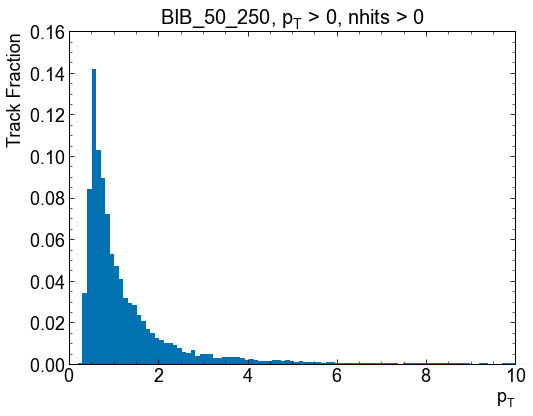

[4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, ..., 4, 3, 3, 3, 3, 4, 3, 3, 6, 4, 3, 4]


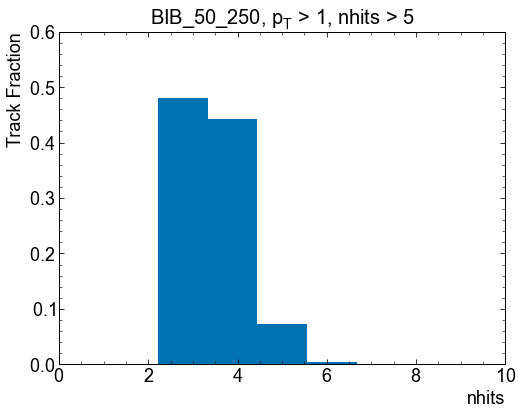

[-0.455, 1.4, 0.298, 0.211, 2.9, 0.155, ..., -0.00344, -0.301, 1.43, 3.08, 1.9]


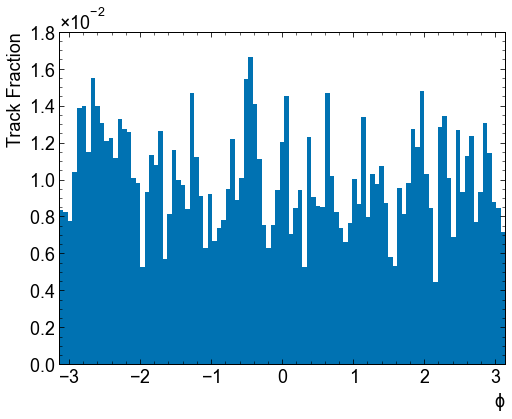

[-2.08, -2.07, -2.04, -2.01, -1.87, -1.77, ..., 1.9, 2, 2.02, 2.02, 2.04, 2.05]


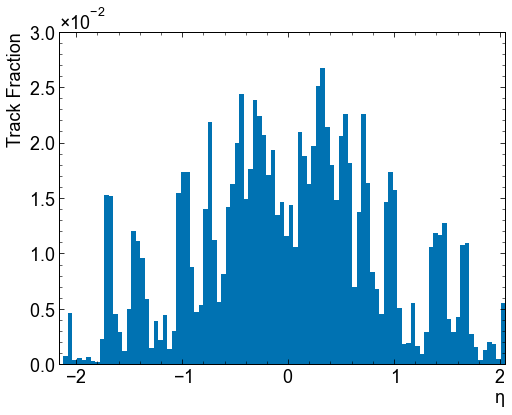

In [ ]:
print(len(np.ravel(bib_50_250['fake_pt'])))
print(np.max(np.ravel(bib_50_250['fake_pt'])))
print(len(np.ravel(bib_fake_pt)[(np.ravel(bib_fake_pt)>1) & (np.ravel(bib_fake_nhits) > 0)])/len(np.ravel(bib_fake_pt)))
# Error encountered when fake rate is 100%
plot_track_fraction((bib_50_250['fake_pt'])[((bib_50_250['fake_pt'])>0) & ((bib_50_250['fake_nhits']) > 0)], num_bins = 100, min_value = 0, max_value = 10, xlabel = "$p_T$", title = "BIB_50_250, $p_T$ > 0, nhits > 0")
plot_track_fraction((bib_50_250['fake_nhits'])[((bib_50_250['fake_pt'])>0) & ((bib_50_250['fake_nhits']) > 0)], num_bins = 10, min_value = 0, max_value = 10, xlabel = "nhits", title = "BIB_50_250, $p_T$ > 1, nhits > 5")
plot_track_fraction(bib_fake_phi[((bib_fake_pt)>pt_cut)], num_bins = 100, min_value = None, max_value = None, xlabel = r"$\phi$")#, title = "BIB Fake Rate w/ $p_T$ > " + str(pt_cut) + "cut")
plot_track_fraction(bib_fake_eta[(bib_fake_pt>pt_cut)], num_bins = 100, min_value = None, max_value = None, xlabel = r"$\eta$")#, title = "BIB Fake Rate w/ $p_T$ > " + str(pt_cut) + "cut")

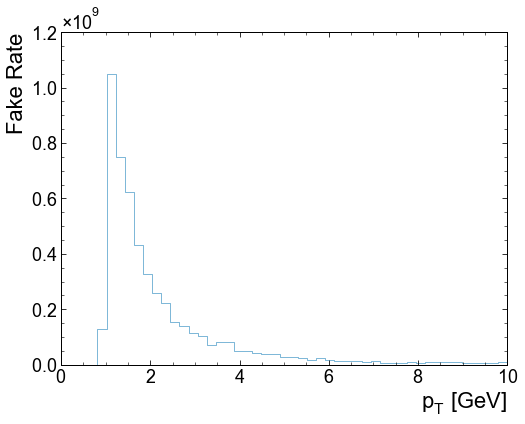

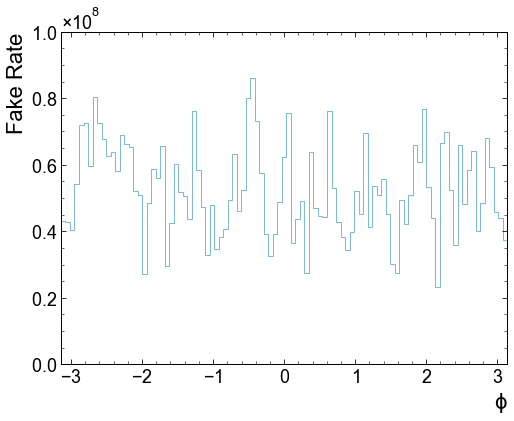

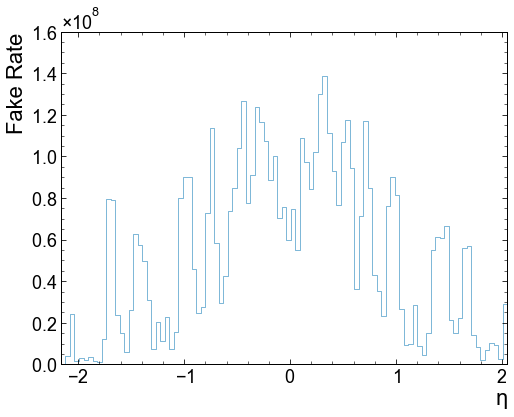

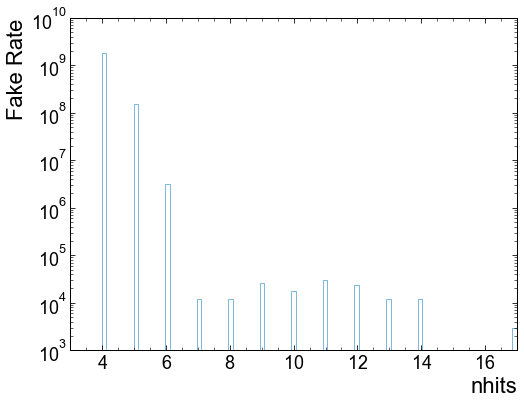

In [ ]:
pt_cut = 1
nhits_cut = 0
# & ((bib_50_250['fake_nhits']) > nhits_cut)
plot_fake_rate((bib_fake_pt)[((bib_fake_pt)>pt_cut) & ((bib_fake_nhits)> nhits_cut)], num_bins = 50, min_value = 0, max_value = 10, xlabel = "$p_T$ [GeV]")#, title = "BIB Fake Rate w/ $p_T$ > " + str(pt_cut) + "cut") #> " + str(nhits_cut))
plot_fake_rate(bib_fake_phi[((bib_fake_pt)>pt_cut)], num_bins = 100, min_value = None, max_value = None, xlabel = r"$\phi$")#, title = "BIB Fake Rate w/ $p_T$ > " + str(pt_cut) + "cut")
plot_fake_rate(bib_fake_eta[(bib_fake_pt>pt_cut)], num_bins = 100, min_value = None, max_value = None, xlabel = r"$\eta$")#, title = "BIB Fake Rate w/ $p_T$ > " + str(pt_cut) + "cut")
plot_fake_rate(bib_fake_nhits[(bib_fake_pt>pt_cut)], num_bins = 100, min_value = None, max_value = None, xlabel = r"nhits", logscale = True)#, title = "BIB Fake Rate w/ $p_T$ > " + str(pt_cut) + "cut")